### Table des matières

* [Introduction](#Introduction)
* [Lecture des données](#lecture)
* [Nettoyage du jeu de données](#nettoyage) 
     * [Vérification des valeurs nulls](#nulls)
     * [Retrait de colonnes, sélection des colonnes à garder](#retrait)
* [Matrice de corélation](#corr)
    * [Suppression des données fortement corrélés et répétitifs](#première)

* [Vérification de la distribution des données](#dist)
    * [Gestion des valeurs nulls et négatifs](#neg)
* [Vérification des doublons](#doub)
* [Suppression des variables très corrélés](#corel)
* [Gestion des valeurs manquantes](#nan)
* [Analyse exploratoire](#exp)
    * [Visulaisations des distributions données ](#bo)
* [Analyse bivariée et multivariée:](#bm)
* [Conclusion](#Conclusion)

### Introduction : <a class="anchor" id="Introduction"></a>

 - Pour atteindre son objectif de ville neutre en émissions de carbone en 2050, la ville de Seattle s’intéresse de près à la consommation et aux émissions des bâtiments non destinés à l’habitation.
 
- Des relevés minutieux ont été effectués par les agents de la ville en 2016. 

- Cependant, ces relevés sont coûteux à obtenir, et à partir de ceux déjà réalisés, nous voulons tenter de prédire les émissions de CO2 et la consommation totale d’énergie de bâtiments non destinés à l’habitation pour lesquels elles n’ont pas encore été mesurées.

### Lecture des données : <a class="anchor" id="lecture"></a>

In [33]:
# Import des librairies
import os
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Pour les warnings
import warnings
warnings.filterwarnings('ignore')
# Pour les statistiques
import scipy.stats as stats
import scipy.stats
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi 
import statsmodels.api as sm

In [38]:
energie = pd.read_csv(os.getcwd()+"/CSV/2016_Building_Energy_Benchmarking.csv")

In [4]:
#Modification des paramètres d'affichages des colonnes, lignes et largeurs des colonnes pour obtenir le plus d'information
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_colwidth', None)
pd.set_option('float_format',lambda x: "%.6f" % x)

In [39]:
energie.head()

OSEBuildingID  DataYear    BuildingType PrimaryPropertyType  \
0              1      2016  NonResidential               Hotel   
1              2      2016  NonResidential               Hotel   
2              3      2016  NonResidential               Hotel   
3              5      2016  NonResidential               Hotel   
4              8      2016  NonResidential               Hotel   

                  PropertyName          Address     City State      ZipCode  \
0         Mayflower park hotel    405 Olive way  Seattle    WA 98101.000000   
1              Paramount Hotel  724 Pine street  Seattle    WA 98101.000000   
2      5673-The Westin Seattle  1900 5th Avenue  Seattle    WA 98101.000000   
3                    HOTEL MAX   620 STEWART ST  Seattle    WA 98101.000000   
4  WARWICK SEATTLE HOTEL (ID8)    401 LENORA ST  Seattle    WA 98121.000000   

  TaxParcelIdentificationNumber  CouncilDistrictCode Neighborhood  Latitude  \
0                    0659000030                    7     DOWNTOWN 47.612200   
1                    0659000220                    7     DOWNTOWN 47.613170   
2                    0659000475                    7     DOWNTOWN 47.613930   
3                    0659000640                    7     DOWNTOWN 47.614120   
4                    0659000970                    7     DOWNTOWN 47.613750   

    Longitude  YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
0 -122.337990       1927           1.000000              12             88434   
1 -122.333930       1996           1.000000              11            103566   
2 -122.338100       1969           1.000000              41            956110   
3 -122.336640       1926           1.000000              10             61320   
4 -122.340470       1980           1.000000              18            175580   

   PropertyGFAParking  PropertyGFABuilding(s)      ListOfAllPropertyUseTypes  \
0                   0                   88434                          Hotel   
1               15064                   88502     Hotel, Parking, Restaurant   
2              196718                  759392                          Hotel   
3                   0                   61320                          Hotel   
4               62000                  113580  Hotel, Parking, Swimming Pool   

  LargestPropertyUseType  LargestPropertyUseTypeGFA  \
0                  Hotel               88434.000000   
1                  Hotel               83880.000000   
2                  Hotel              756493.000000   
3                  Hotel               61320.000000   
4                  Hotel              123445.000000   

  SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
0                          NaN                              NaN   
1                      Parking                     15064.000000   
2                          NaN                              NaN   
3                          NaN                              NaN   
4                      Parking                     68009.000000   

  ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
0                         NaN                             NaN   
1                  Restaurant                     4622.000000   
2                         NaN                             NaN   
3                         NaN                             NaN   
4               Swimming Pool                        0.000000   

  YearsENERGYSTARCertified  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
0                      NaN        60.000000         81.699997   
1                      NaN        61.000000         94.800003   
2                      NaN        43.000000         96.000000   
3                      NaN        56.000000        110.800003   
4                      NaN        75.000000        114.800003   

   SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  \
0           84.300003          182.500000            189.000000   
1           97.900002          176.100

In [123]:
description = pd.DataFrame(columns = ["Dimensions", "NB_lignes","NB_colonnes","Total remplissage","Description"],
                                 index = [ "energie"
                                          ])

description["Dimensions"] = [energie.shape]
description["NB_lignes"] =[energie.shape[0]]
description["NB_colonnes"] = [energie.shape[1]]
description["Total remplissage"] = [energie.count().sum()]
description["Description"]=["Il s'agit d'un ficher de consommation d'énergie relative à l'année 2016 de la ville de Seattle"]
description

Dimensions  NB_lignes  NB_colonnes  Total remplissage  \
energie  (3376, 46)       3376           46             135344   

                                                                                            Description  
energie  Il s'agit d'un ficher de consommation d'énergie relative à l'année 2016 de la ville de Seattle

### Nettoyage du jeu de données : <a class="anchor" id="nettoyage"></a>

- Analyse des variables

In [9]:
# Appel des fonctions
%run functions.py

In [8]:
colonne(energie)

La colonne  OSEBuildingID  : contient 3376 valeur unique
La colonne  DataYear  : contient 1 valeur unique
La colonne  BuildingType  : contient 8 valeur unique
La colonne  PrimaryPropertyType  : contient 24 valeur unique
La colonne  PropertyName  : contient 3362 valeur unique
La colonne  Address  : contient 3354 valeur unique
La colonne  City  : contient 1 valeur unique
La colonne  State  : contient 1 valeur unique
La colonne  ZipCode  : contient 55 valeur unique
La colonne  TaxParcelIdentificationNumber  : contient 3268 valeur unique
La colonne  CouncilDistrictCode  : contient 7 valeur unique
La colonne  Neighborhood  : contient 19 valeur unique
La colonne  Latitude  : contient 2876 valeur unique
La colonne  Longitude  : contient 2656 valeur unique
La colonne  YearBuilt  : contient 113 valeur unique
La colonne  NumberofBuildings  : contient 17 valeur unique
La colonne  NumberofFloors  : contient 50 valeur unique
La colonne  PropertyGFATotal  : contient 3195 valeur unique
La colonne  Pr

- Explication des variables: 

- Les variables concernant les surfaces (GFA = Gross floor area) :

PropertyGFAParking 
PropertyGFABuilding(s) 
ListOfAllPropertyUseTypes 
LargestPropertyUseType / LargestPropertyUseTypeGFA 
SecondLargestPropertyUseType / SecondLargestPropertyUseTypeGFA 
ThirdLargestPropertyUseType / ThirdLargestPropertyUseTypeGFA 

- Les variables Concernant l'énergie :

SiteEUI(kBtu/sf) / SiteEUIWN(kBtu/sf) 
SourceEUI(kBtu/sf) SourceEUIWN(kBtu/sf) 
SiteEnergyUse(kBtu) SiteEnergyUseWN(kBtu) SteamUse(kBtu) Electricity(kWh) Electricity(kBtu) NaturalGas(therms) NaturalGas(kBtu) 

kBTu : le B.T.U. (British Thermal Unit) est une unité de mesure d'énergie thermique. Le BTU, de symbole Btu, est utilisé dans les pays anglo-saxons et asiatiques et équivaut à 1055,06 Joule ou 252 calories.
1 BTU est l’énergie nécessaire pour chauffer ou refroidir une livre d’eau de 1 degré Fahrenheit au niveau de la mer.
Pour convertir une puissance en Btu une puissance en watt il suffit de diviser la puissance en Btu par 3414,5 pour obtenir la puissance en Kw.

therms : le therm est une unité d'énergie thermique anglo-saxone égale à 1 000 000 unités thermiques britanniques (BTU).

1 kWh = 0.034095106405145 thm
1 thm = 29.329722222222 kWh

- Explication détaillée des données : 

* **BuildingType** : type de bâtiment selon la classification de la ville de Seattle.
* **NumberofBuildings** : nombre de bâtiments à l'adresse indiquée.
* **NumberofFloors** : nombre d'étages
* **YearsENERGYSTARCertified** : liste des années où le bâtiment a été certifié EnergyStarScore 
* **ZipCode** : code postal
* **Address** : contient le numéro et la rue du bâtiment.
* **City**  : contient la ville. Valeur unique "Seattle".
* **Latitude** 
* **Longitude** 
* **Neighborhood** : quartier de la ville.
* **State** (object) : état. Contient seulement "WA": WASHINGTON. 
* **DataYear**: année du recensement du bâtiment (2016).

* **LargestPropertyUseType** : La plus grande utilisation d'une propriété (par exemple, bureau, magasin de détail) par GFA.
* **LargestPropertyUseTypeGFA** : GFA = Gross Floor Area: Superficie brute Représente peut-être la surface au sol du bâtiment
* **ListOfAllPropertyUseTypes**  : liste de tous les usage du bâtiment
* **PrimaryPropertyType** : L'utilisation principale d'une propriété (par exemple, bureau, magasin de détail). L'usage principal est défini comme une fonction qui représente plus de 50 % d'un bien. Il s'agit du champ Type de propriété - EPA calculée de Portfolio Manager.
* **PropertyGFABuilding(s)** : Espace au sol total en pieds carrés entre les surfaces extérieures des murs d'enceinte d'un bâtiment. Cela comprend toutes les zones à l'intérieur du ou des bâtiments, telles que l'espace des locataires, les espaces communs, les cages d'escalier, les sous-sols, le stockage, etc.
* **PropertyGFAParking** : Espace total en pieds carrés de tous les types de stationnement (entièrement fermé, partiellement fermé et ouvert).
* **PropertyGFATotal** :Surface de plancher brute totale du bâtiment et du stationnement.
* **PropertyName** : Nom de propriété officiel ou commun 
* **SecondLargestPropertyUseType**  : La deuxième plus grande utilisation d'une propriété (par exemple, bureau, magasin de détail) par GFA.
* **SecondLargestPropertyUseTypeGFA** : La surface de plancher brute (GFA) de la deuxième plus grande utilisation de la propriété
* **ThirdLargestPropertyUseType** : 3e usage le plus important du bâtiment.
* **ThirdLargestPropertyUseTypeGFA** : La surface de plancher brute (GFA) de la troisième plus grande utilisation de la propriété

* **SiteEUI(kBtu/sf)** : L'intensité de consommation d'énergie du site (IUE) est la consommation d'énergie du site d'une propriété divisée par sa surface de plancher brute. La consommation d'énergie du site est le montant annuel de toute l'énergie consommée par la propriété sur le site, tel qu'indiqué sur les factures de services publics. L'IE du site est mesurée en milliers d'unités thermiques britanniques (kBtu) par pied carré.
* **SiteEUIWN(kBtu/sf)** : L'intensité de consommation d'énergie du site (EUI) normalisée par les conditions météorologiques (WN) est l'énergie du site WN d'une propriété divisée par sa surface de plancher brute (en pieds carrés). L'énergie du site WN est la consommation d'énergie du site que la propriété aurait consommée dans des conditions météorologiques moyennes sur 30 ans. L'IUE du site WN est mesurée en milliers d'unités thermiques britanniques (kBtu) par pied carré.
* **SiteEnergyUse(kBtu)** : La quantité annuelle d'énergie consommée par la propriété à partir de toutes les sources d'énergie.
* **SiteEnergyUseWN(kBtu)** : La quantité annuelle d'énergie consommée par la propriété à partir de toutes les sources d'énergie, ajustée à ce que la propriété aurait consommé dans des conditions météorologiques moyennes sur 30 ans.
* **SourceEUI(kBtu/sf)** : L'intensité de consommation d'énergie à la source (IUE) est la consommation d'énergie à la source d'une propriété divisée par sa surface de plancher brute. La consommation d'énergie à la source est l'énergie annuelle utilisée pour faire fonctionner la propriété, y compris les pertes de production, de transmission et de distribution. Source EUI est mesurée en milliers d'unités thermiques britanniques (kBtu) par pied carré.
* **SourceEUIWN(kBtu/sf)** : L'intensité d'utilisation de l'énergie à la source (EUI) normalisée par les conditions météorologiques (WN) est l'énergie à la source WN d'une propriété divisée par sa surface de plancher brute. L'énergie à la source WN est l'utilisation de l'énergie à la source que la propriété aurait consommée dans des conditions météorologiques moyennes sur 30 ans. WN Source EUI est mesurée en milliers d'unités thermiques britanniques (kBtu) par pied carré.
* **SteamUse(kBtu)** : La quantité annuelle de vapeur de quartier consommée par la propriété sur place, mesurée en milliers d'unités thermiques britanniques (kBtu).
* **Electricity(kBtu)** La quantité annuelle d'électricité consommée par la propriété sur place, y compris l'électricité achetée sur le réseau et générée par des systèmes renouvelables sur place, mesurée en milliers d'unités thermiques britanniques (kBtu).
* **Electricity(kWh)** La quantité annuelle d'électricité consommée par la propriété sur place, y compris l'électricité achetée sur le réseau et générée par des systèmes renouvelables sur place, mesurée en kWh.
* **NaturalGas(kBtu)**: La quantité annuelle de gaz naturel fourni par les services publics consommée par la propriété, mesurée en milliers d'unités thermiques britanniques (kBtu).
* **NaturalGas(therms)** La quantité annuelle de gaz naturel fourni par les services publics consommée par la propriété, mesurée en therms.
* **TotalGHGEmissions** (float) : émissions totales de gaz à effet de serre y compris le dioxyde de carbone, le méthane et les gaz d'oxyde nitreux libérés dans l'atmosphère à la suite de la consommation d'énergie de la propriété.
* **GHGEmissionsIntensity** : Émissions totales de gaz à effet de serre divisées par la surface de plancher brute de la propriété, mesurée en kilogrammes d'équivalent en dioxyde de carbone par pied carré. Ce calcul utilise un facteur d'émissions de GES du portefeuille de ressources de production de Seattle City Light
* **ENERGYSTARScore** (float) :  EPA a calculé une note de 1 à 100 qui évalue la performance énergétique globale d'une propriété, sur la base de données nationales pour contrôler les différences entre le climat, les utilisations des bâtiments et les opérations. Un score de 50 représente la médiane nationale.



* **TaxParcelIdentificationNumber** : Code PIN du departement 
* **DefaultData** (True/Flase) : La propriété a utilisé des données par défaut pour au moins une caractéristique de la propriété..
* **Comments** : contient que des nan. 
* **ComplianceStatus** : conformité du bâtiment(Si une propriété a satisfait aux exigences d'analyse comparative énergétique pour l'année de déclaration en cours). 
* **OSEBuildingID** : identifiant unique des bâtiments de la ville.
* **Outlier** (object) : Si une propriété a une valeur aberrante élevée ou basse (high/low).

### Vérification des valeurs nulls: <a class="anchor" id="nulls"></a>

- Fonctions de vérification des nan

- Fonction de corrélation

 Vérification des nan

In [10]:
print("Le nombre total de nan dans le dataframe est :", missing_data(energie))

Le nombre total de nan dans le dataframe est : 19952


In [15]:
print("Le nombre de nan total dans le df en pourcentage: ",format_pourcentage(missing_percent(energie)))

Le nombre de nan total dans le df en pourcentage:  12.8477%


In [20]:
missing_values(energie)

Variable   nan       %nan
43                          Outlier  3344   99.0521%
27         YearsENERGYSTARCertified  3257   96.4751%
25      ThirdLargestPropertyUseType  2780   82.3460%
26   ThirdLargestPropertyUseTypeGFA  2780   82.3460%
23     SecondLargestPropertyUseType  1697   50.2666%
24  SecondLargestPropertyUseTypeGFA  1697   50.2666%
28                  ENERGYSTARScore   843   24.9704%
41                         Comments  3376  100.0000%
22        LargestPropertyUseTypeGFA    20    0.5924%
21           LargestPropertyUseType    20    0.5924%
8                           ZipCode    16    0.4739%
20        ListOfAllPropertyUseTypes     9    0.2666%
32             SourceEUIWN(kBtu/sf)     9    0.2666%
31               SourceEUI(kBtu/sf)     9    0.2666%
36                 Electricity(kWh)     9    0.2666%
37                Electricity(kBtu)     9    0.2666%
38               NaturalGas(therms)     9    0.2666%
39                 NaturalGas(kBtu)     9    0.2666%
44                TotalGHGEmissions     9    0.2666%
35                   SteamUse(kBtu)     9    0.2666%
45            GHGEmissionsIntensity     9    0.2666%
15                NumberofBuildings     8    0.2370%
29                 SiteEUI(kBtu/sf)     7    0.2073%
30               SiteEUIWN(kBtu/sf)     6    0.1777%
34            SiteEnergyUseWN(kBtu)     6    0.1777%
33              SiteEnergyUse(kBtu)     5    0.1481%
9     TaxParcelIdentificationNumber     0    0.0000%
2                      BuildingType     0    0.0000%
3               PrimaryPropertyType     0    0.0000%
42                 ComplianceStatus     0    0.0000%
4                      PropertyName     0    0.0000%
40                      DefaultData     0    0.0000%
5                           Address     0    0.0000%
6                              City     0    0.0000%
7                             State     0    0.0000%
19           PropertyGFABuilding(s)     0    0.0000%
10              CouncilDistrictCode     0    0.0000%
18               PropertyGFAParking     0    0.0000%
11                     Neighborhood     0    0.0000%
12                         Latitude     0    0.0000%
13                        Longitude     0    0.0000%
14                        YearBuilt     0    0.0000%
16                   NumberofFloors     0    0.0000%
17                 PropertyGFATotal     0    0.0000%
1                          DataYear     0    0.0000%
0                     OSEBuildingID     0    0.0000%

- Un dataframe plutot bien rempli pour les données d'energie, beaucoup de données manquantes pour ces variables : Outlier,YearsENERGYSTARCertified,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,SecondLargestPropertyUseType

Pourcentage de NAN pour chaque variable du dataframe 

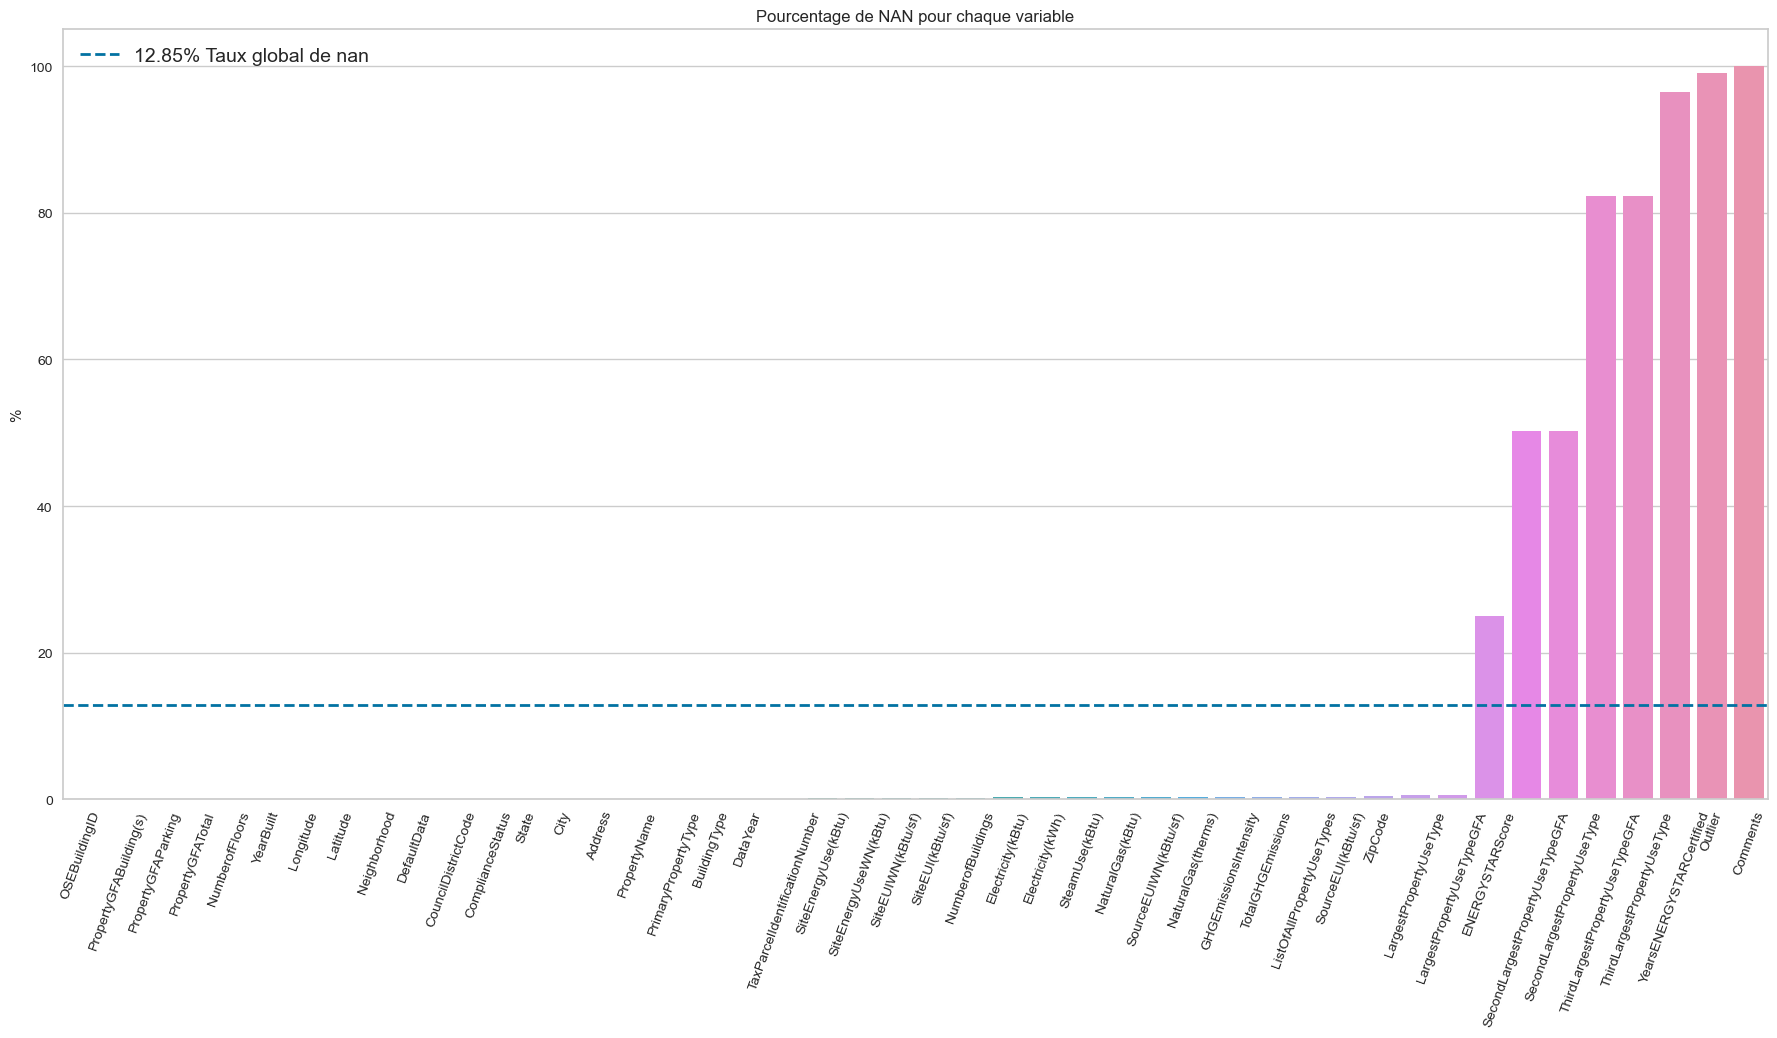

In [40]:
plot_nan(energie)

- NAN par lignes

In [672]:
missing_rows(energie)

nan %
2670 54.347826
758  54.347826
1792 54.347826
2474 54.347826
578  54.347826
...        ...
2530  4.347826
3341  4.347826
720   4.347826
323   4.347826
293   4.347826

[3376 rows x 1 columns]

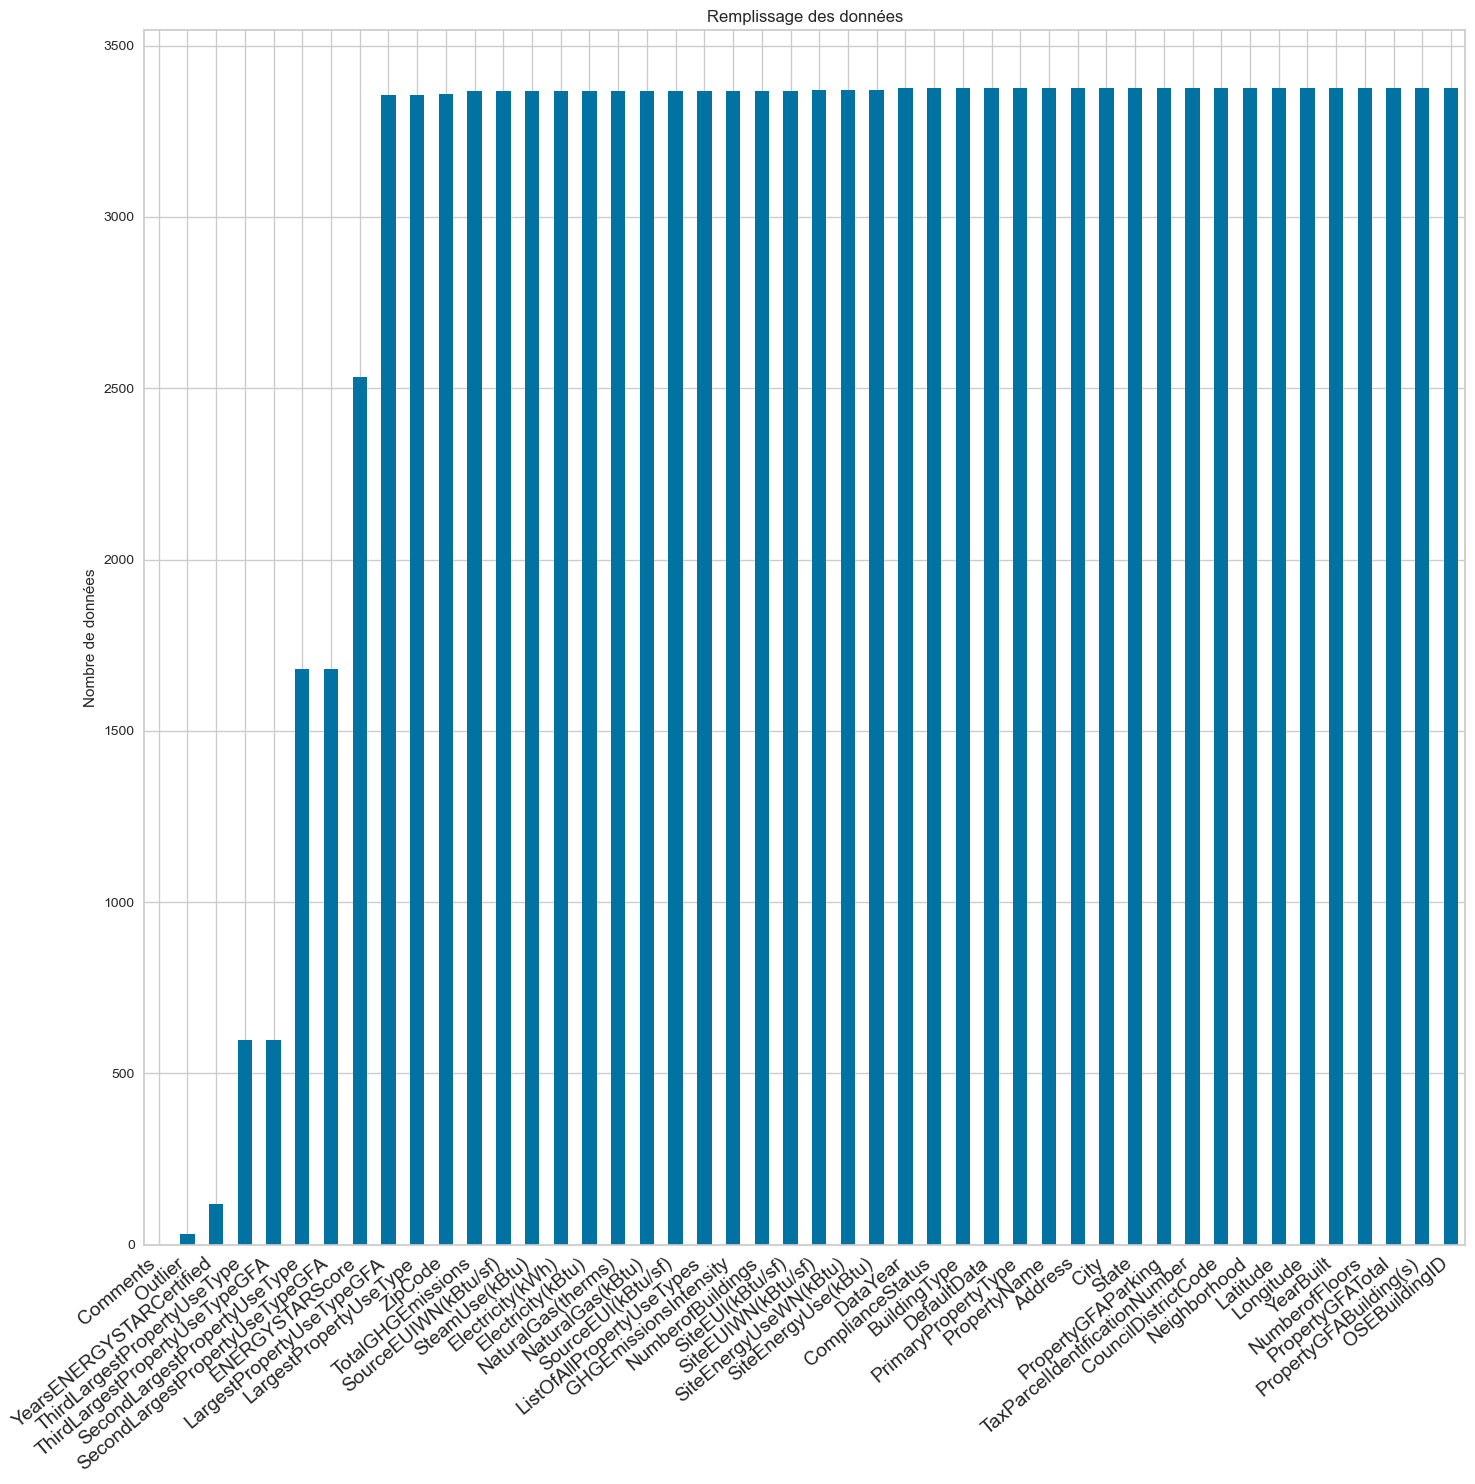

In [7]:
# Remplissage des données
plot_remp(energie)

### Retrait de colonnes, sélection des colonnes à garder : <a class="anchor" id="retrait"></a>

In [8]:
# Je supprime les colonnes inutiles et ne contenant qu'une seule ou aucune valeur: DataYear,City,State,Comments,
#YearsENERGYSTARCertified
print(energie.shape[1],"colonnes avant suppression")
list_drop= ["DataYear","City","State","Comments","ZipCode","YearsENERGYSTARCertified"]
energie.drop(list_drop, axis = 1, inplace = True)
print(energie.shape[1],"colonnes restantes")

46 colonnes avant suppression
40 colonnes restantes


In [12]:
energie.columns

Index(['OSEBuildingID', 'BuildingType', 'PrimaryPropertyType', 'PropertyName',
       'Address', 'TaxParcelIdentificationNumber', 'CouncilDistrictCode',
       'Neighborhood', 'Latitude', 'Longitude', 'YearBuilt',
       'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'DefaultData', 'ComplianceStatus', 'Outlier',
       'TotalGHGEmissions', 'GHGEmissionsIntensity'],
      dtype='object')

In [676]:
energie.describe()

OSEBuildingID  CouncilDistrictCode    Latitude   Longitude   YearBuilt  \
count    3376.000000          3376.000000 3376.000000 3376.000000 3376.000000   
mean    21208.991114             4.439277   47.624033 -122.334795 1968.573164   
std     12223.757015             2.120625    0.047758    0.027203   33.088156   
min         1.000000             1.000000   47.499170 -122.414250 1900.000000   
25%     19990.750000             3.000000   47.599860 -122.350662 1948.000000   
50%     23112.000000             4.000000   47.618675 -122.332495 1975.000000   
75%     25994.250000             7.000000   47.657115 -122.319407 1997.000000   
max     50226.000000             7.000000   47.733870 -122.220966 2015.000000   

       NumberofBuildings  NumberofFloors  PropertyGFATotal  \
count        3368.000000     3376.000000       3376.000000   
mean            1.106888        4.709123      94833.537322   
std             2.108402        5.494465     218837.607120   
min             0.000000        0.000000      11285.000000   
25%             1.000000        2.000000      28487.000000   
50%             1.000000        4.000000      44175.000000   
75%             1.000000        5.000000      90992.000000   
max           111.000000       99.000000    9320156.000000   

       PropertyGFAParking  PropertyGFABuilding(s)  LargestPropertyUseTypeGFA  \
count         3376.000000             3376.000000                3356.000000   
mean          8001.526066            86832.011256               79177.638558   
std          32326.723928           207939.811923              201703.407492   
min              0.000000             3636.000000                5656.000000   
25%              0.000000            27756.000000               25094.750000   
50%              0.000000            43216.000000               39894.000000   
75%              0.000000            84276.250000               76200.250000   
max         512608.000000          9320156.000000             9320156.000000   

       SecondLargestPropertyUseTypeGFA  ThirdLargestPropertyUseTypeGFA  \
count                      1679.000000                      596.000000   
mean                      28444.075817                    11738.675166   
std                       54392.917928                    29331.199286   
min                           0.000000                        0.000000   
25%                        5000.000000                     2239.000000   
50%                       10664.000000                     5043.000000   
75%                       26640.000000                    10138.750000   
max                      686750.000000                   459748.000000   

       ENERGYSTARScore  SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  \
count      2533.000000       3369.000000         3370.000000   
mean         67.918674         54.732116           57.033798   
std          26.873271         56.273124           57.163330   
min           1.000000          0.000000            0.000000   
25%          53.000000         27.900000           29.400000   
50%          75.000000         38.599998           40.900002   
75%          90.000000         60.400002           64.275002   
max         100.000000        834.400024          834.400024   

       SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  SiteEnergyUse(kBtu)  \
count         3367.000000           3367.000000          3371.000000   
mean           134.232848            137.783932       5403667.294533   
std            139.287554            139.109807      21610628.627639   
min              0.000000             -2.100000             0.000000   
25%             74.699997             78.400002        925128.593750   
50%             96.199997            101.099998       1803753.250000   
75%            143.899994            148.349998       4222455.250000   
max           2620.000000           2620.000000     873923712.000000   

       SiteEnergyUseWN(kBtu)   SteamUse(kBtu)  Electricity(kWh)  \
count            3370.000000      336

- Premier filtre sur les données : 
- Selon l'énoncé nous voulons tenter de prédire les émissions de CO2 et la consommation totale d’énergie de bâtiments non destinés à l’habitation ( non résidentiel)
- Je vérifie les types de bâtiments

In [128]:
# Vérification des types de bâtiments 
energie.BuildingType.unique()

array(['NonResidential', 'Nonresidential COS', 'Multifamily MR (5-9)',
       'SPS-District K-12', 'Campus', 'Multifamily LR (1-4)',
       'Multifamily HR (10+)', 'Nonresidential WA'], dtype=object)

In [129]:
# Nombre de chaque type de bâtiment 
energie.BuildingType.value_counts()

NonResidential          1460
Multifamily LR (1-4)    1018
Multifamily MR (5-9)     580
Multifamily HR (10+)     110
SPS-District K-12         98
Nonresidential COS        85
Campus                    24
Nonresidential WA          1
Name: BuildingType, dtype: int64

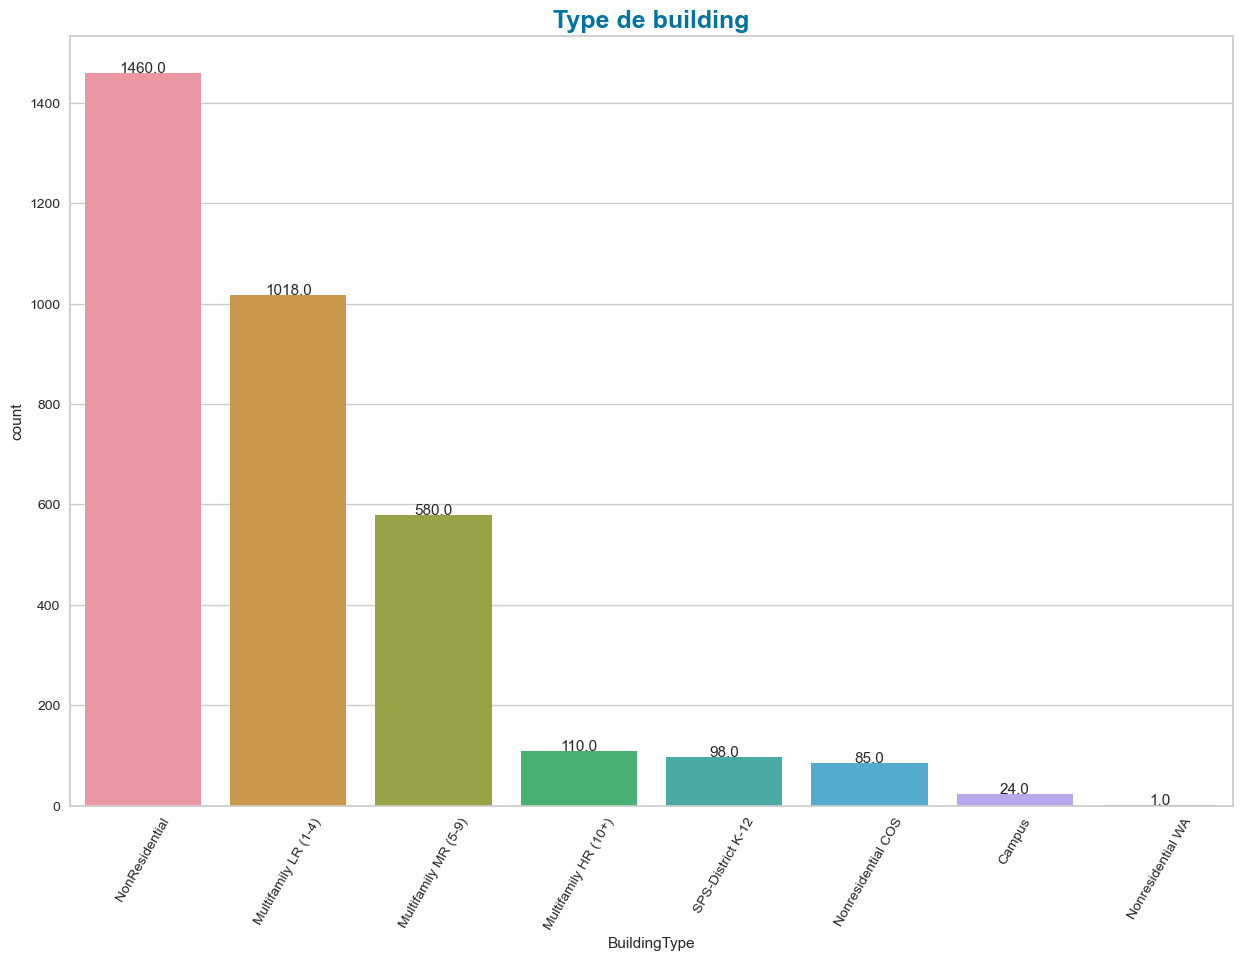

In [10]:
plot_cnt(energie,"BuildingType","Type de building")

- La grande partie des bâtiments sont de type "NonResidential"

- Les catégories représentées dans ce type de bâtiments sont:

In [15]:
energie.loc[(energie['BuildingType']=="NonResidential"),'PrimaryPropertyType'].value_counts()

Small- and Mid-Sized Office    288
Other                          185
Warehouse                      180
Large Office                   168
Mixed Use Property             102
Retail Store                    91
Hotel                           76
Worship Facility                71
Distribution Center             51
Supermarket / Grocery Store     40
K-12 School                     39
Medical Office                  38
Self-Storage Facility           28
Residence Hall                  21
Senior Care Community           20
University                      17
Refrigerated Warehouse          12
Restaurant                      11
Hospital                        10
Laboratory                      10
Low-Rise Multifamily             2
Name: PrimaryPropertyType, dtype: int64

- plus de Small- and Mid-Sized Office , Warehouse, Large Office, Mixed Use Property et Other

- J'écarte tout type de building Multifamily

In [11]:
energie=energie[~energie['BuildingType'].str.contains("Multifamily")]

In [12]:
energie.BuildingType.unique()

array(['NonResidential', 'Nonresidential COS', 'SPS-District K-12',
       'Campus', 'Nonresidential WA'], dtype=object)

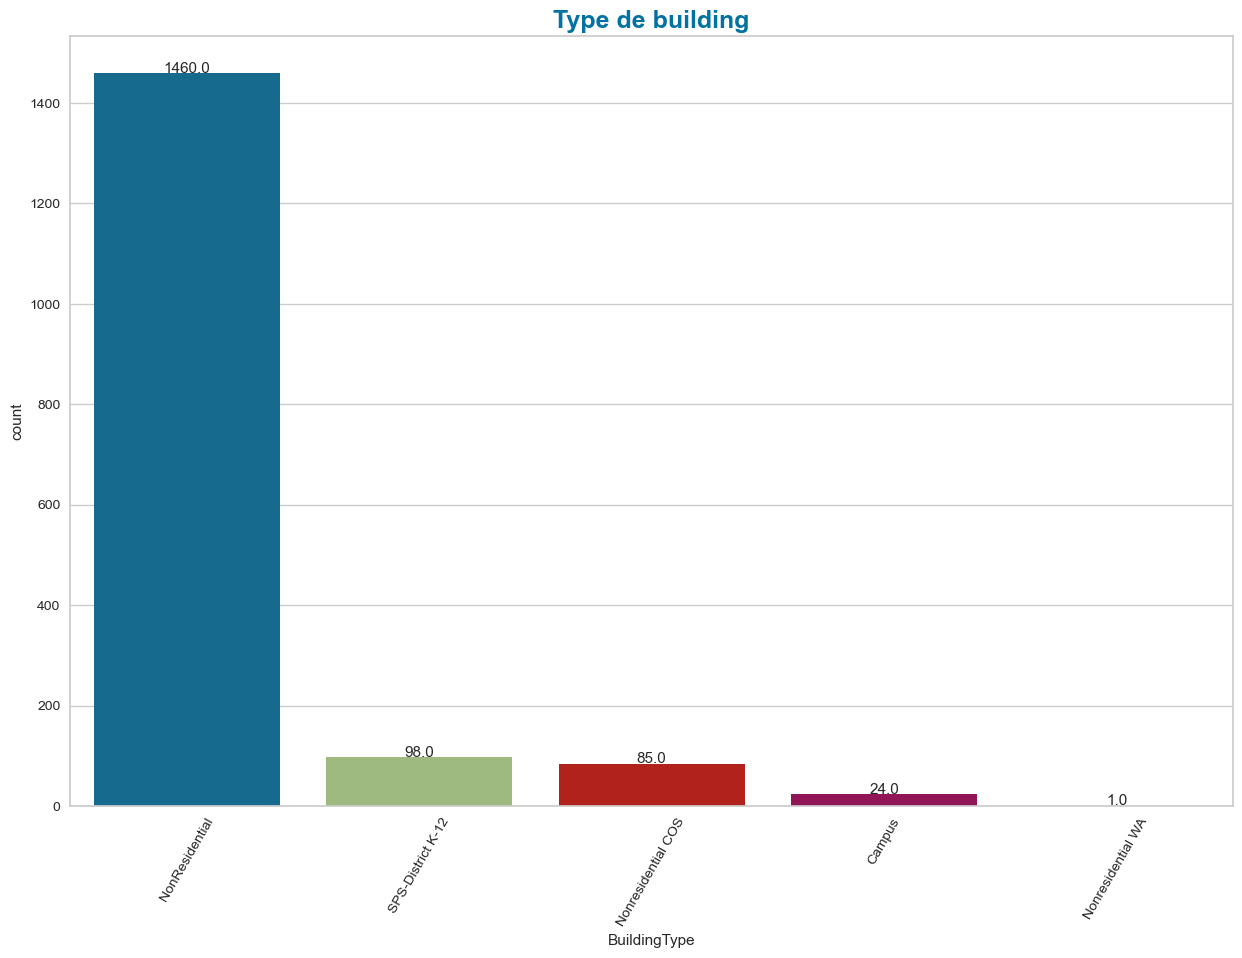

In [13]:
plot_cnt(energie,"BuildingType","Type de building")

- Une seule valeur pour 'Nonresidential WA', lors de la séparation du jeu de données ne sera pas utile , je la supprime

In [14]:
energie[energie['BuildingType']=="Nonresidential WA"]

OSEBuildingID       BuildingType PrimaryPropertyType  PropertyName  \
3359          50101  Nonresidential WA          University  Burke Museum   

                   Address TaxParcelIdentificationNumber  CouncilDistrictCode  \
3359  4331 Memorial Way NE                    1625049001                    4   

     Neighborhood  Latitude   Longitude  YearBuilt  NumberofBuildings  \
3359    NORTHEAST 47.661270 -122.312560       1962           1.000000   

      NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
3359               1             68072                   0   

      PropertyGFABuilding(s) ListOfAllPropertyUseTypes LargestPropertyUseType  \
3359                   68072        College/University     College/University   

      LargestPropertyUseTypeGFA SecondLargestPropertyUseType  \
3359               68916.000000                          NaN   

      SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  \
3359                              NaN                         NaN   

      ThirdLargestPropertyUseTypeGFA  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
3359                             NaN              NaN         46.200001   

      SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  \
3359           46.200001          144.899994            144.899994   

      SiteEnergyUse(kBtu)  SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  \
3359       3180819.250000         3180819.250000        0.000000   

      Electricity(kWh)  Electricity(kBtu)  NaturalGas(therms)  \
3359     932244.687500     3180819.000000            0.000000   

      NaturalGas(kBtu)  DefaultData ComplianceStatus Outlier  \
3359          0.000000        False        Compliant     NaN   

      TotalGHGEmissions  GHGEmissionsIntensity  
3359          22.170000               0.330000

- Il y a un seul batiment sur cette catégorie, je la supprime car ça va gener lors de la séparation du set

In [15]:
index_to_drop=energie[energie['BuildingType']=="Nonresidential WA"].index
energie.drop(index_to_drop, inplace=True)

In [16]:
energie.shape

(1667, 40)

- Vérification de la colonne outlier

In [135]:
energie.Outlier.value_counts()

Low outlier     15
High outlier     2
Name: Outlier, dtype: int64

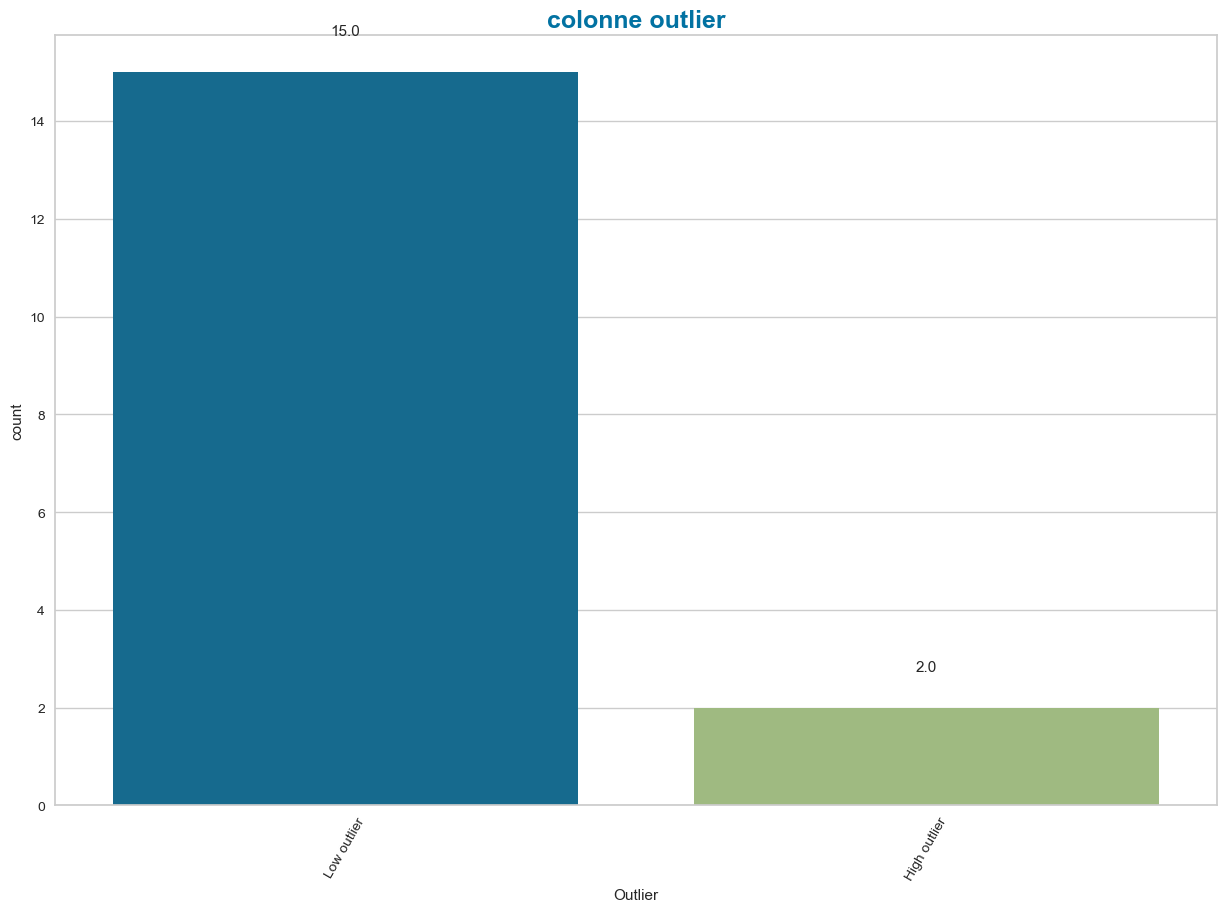

In [17]:
plot_cnt(energie,"Outlier","colonne outlier")

Cette colonne indique des des outliers de type high et low e et elle contient 99% de nan, je vérifie comme meme les lignes 

In [136]:
energie[energie["Outlier"]=="High outlier"]

OSEBuildingID    BuildingType PrimaryPropertyType  \
226            350  NonResidential        Large Office   
517            704  NonResidential        Large Office   

                   PropertyName              Address  \
226  Second And Spring Building   1100 Second Avenue   
517        401 Elliott Ave West  401 Elliot Ave West   

    TaxParcelIdentificationNumber  CouncilDistrictCode           Neighborhood  \
226                    0942000045                    7               DOWNTOWN   
517                    7666202110                    7  MAGNOLIA / QUEEN ANNE   

     Latitude   Longitude  YearBuilt  NumberofBuildings  NumberofFloors  \
226 47.606420 -122.335810       1958           1.000000               6   
517 47.622350 -122.363780       2000           1.000000               4   

     PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
226            172842               25920                  146922   
517            129551               42500                   87051   

        ListOfAllPropertyUseTypes LargestPropertyUseType  \
226  Data Center, Office, Parking                 Office   
517  Data Center, Office, Parking                 Office   

     LargestPropertyUseTypeGFA SecondLargestPropertyUseType  \
226               99890.000000                  Data Center   
517               82273.000000                      Parking   

     SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  \
226                     39336.000000                     Parking   
517                     42500.000000                 Data Center   

     ThirdLargestPropertyUseTypeGFA  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
226                    25000.000000              NaN        297.399994   
517                     4778.000000         1.000000        311.700012   

     SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  \
226          299.200012          909.599976            911.500000   
517          311.700012          978.900024            978.900024   

     SiteEnergyUse(kBtu)  SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  \
226      41399504.000000        41650404.000000        0.000000   
517      27137190.000000        27137190.000000        0.000000   

     Electricity(kWh)  Electricity(kBtu)  NaturalGas(therms)  \
226   11663150.000000    39794668.000000        16048.309570   
517    7953454.500000    27137187.000000            0.000000   

     NaturalGas(kBtu)  DefaultData ComplianceStatus       Outlier  \
226    1604831.000000        False    Non-Compliant  High outlier   
517          0.000000        False    Non-Compliant  High outlier   

     TotalGHGEmissions  GHGEmissionsIntensity  
226         362.660000               2.100000  
517         189.180000               1.460000

In [137]:
energie[energie["Outlier"]=="Low outlier"]

OSEBuildingID        BuildingType          PrimaryPropertyType  \
384             539      NonResidential                 Retail Store   
448             608      NonResidential                 Large Office   
839           19967   SPS-District K-12                  K-12 School   
1045          20617      NonResidential                 Retail Store   
1229          21315      NonResidential  Small- and Mid-Sized Office   
1295          21474      NonResidential                        Other   
1611          22830      NonResidential             Worship Facility   
1945          23912      NonResidential  Small- and Mid-Sized Office   
2129          24547      NonResidential                  K-12 School   
2189          24717      NonResidential                        Other   
2216          24825      NonResidential  Small- and Mid-Sized Office   
2410          25553      NonResidential                        Hotel   
2450          25674      NonResidential         Low-Rise Multifamily   
2801          27007      NonResidential             Worship Facility   
3152          43948  Nonresidential COS                        Other   

                        PropertyName                    Address  \
384                University Center      4501 Roosevelt Way NE   
448           411 1ST AVE  S (ID608)              411 1ST AVE S   
839                   Queen Anne Gym             1431 2nd Ave N   
1045           Seattle Habitat Store             21 S Nevada St   
1229                 1518 Fifith Ave             1520 Fifth Ave   
1295                  The Lusty Lady               1315 1st Ave   
1611                  Freedom Church              9601 35th Ave   
1945                  1416 S Jackson  1416 South Jackson Street   
2129       Islamic School of Seattle               720 25TH AVE   
2189        1701 First Ave South LLC       1701 First Ave South   
2216                   2233 Building         2233 1st AVE.South   
2410  J & M HOTEL BUILDING (ID25553)              210 1St Ave S   
2450          (ID25674) COMET TAVERN              916 E PIKE ST   
2801        Seattle Community Church        4501 46th Avenue NE   
3152           Georgetown Steamplant     6605 13th Avenue South   

     TaxParcelIdentificationNumber  CouncilDistrictCode  \
384                     5335200380                    4   
448                     5247800200                    2   
839                     0811000005                    7   
1045                    1824049074                    2   
1229                    1975700135                    7   
1295                    1976200060                    7   
1611                    2858600090                    1   
1945                    3320000165                    3   
2129                    6840700175                    3   
2189                    7666207085                    2   
2216                    7666207190                    2   
2410                    5247800130                    7   
2450                    6003500480                    3   
2801                    5364200005                    4   
3152                    0000000000                    2   

               Neighborhood  Latitude   Longitude  YearBuilt  \
384               NORTHEAST 47.661780 -122.318120       1987   
448                DOWNTOWN 47.598780 -122.334580       1913   
839   MAGNOLIA / QUEEN ANNE 47.632030 -122.353370       2001   
1045       GREATER DUWAMISH 47.565350 -122.340540       1953   
1229               DOWNTOWN 47.611190 -122.335810       1903   
1295               DOWNTOWN 47.607110 -122.338860       1900   
1611              SOUTHWEST 47.517090 -122.377970       1971   
1945                CENTRAL 47.599730 -122.313310       1947   
2129                CENTRAL 47.608850 -122.299900       1929   
2189       GREATER DUWAMISH 47.587880 -122.334580       1910   
2216       GREATER DUWAMISH 47.582920 -122.334680       1910   
2410               DOWNTOWN 47.600350 -122.333790       1900   
245

In [138]:
energie.describe()

OSEBuildingID  CouncilDistrictCode    Latitude   Longitude   YearBuilt  \
count    1667.000000          1667.000000 1667.000000 1667.000000 1667.000000   
mean    16316.091782             4.356929   47.616027 -122.332920 1961.913617   
std     13814.684170             2.191688    0.048170    0.024582   32.751580   
min         1.000000             1.000000   47.499170 -122.411820 1900.000000   
25%       582.500000             2.000000   47.585445 -122.343280 1930.000000   
50%     21142.000000             4.000000   47.612340 -122.332940 1965.000000   
75%     24601.500000             7.000000   47.649640 -122.321725 1989.000000   
max     50226.000000             7.000000   47.733870 -122.258640 2015.000000   

       NumberofBuildings  NumberofFloors  PropertyGFATotal  \
count        1665.000000     1667.000000       1667.000000   
mean            1.168769        4.122975     118873.180564   
std             2.932286        6.564931     297448.840884   
min             0.000000        0.000000      11285.000000   
25%             1.000000        1.000000      29457.500000   
50%             1.000000        2.000000      49280.000000   
75%             1.000000        4.000000     105550.000000   
max           111.000000       99.000000    9320156.000000   

       PropertyGFAParking  PropertyGFABuilding(s)  LargestPropertyUseTypeGFA  \
count         1667.000000             1667.000000                1661.000000   
mean         12905.716257           105967.464307               98782.656231   
std          42286.015313           284295.343810              276793.427425   
min              0.000000             3636.000000                5656.000000   
25%              0.000000            28458.500000               25521.000000   
50%              0.000000            47368.000000               43728.000000   
75%              0.000000            94806.500000               92000.000000   
max         512608.000000          9320156.000000             9320156.000000   

       SecondLargestPropertyUseTypeGFA  ThirdLargestPropertyUseTypeGFA  \
count                       855.000000                      353.000000   
mean                      36804.160581                    14923.139940   
std                       69845.261024                    36790.556560   
min                           0.000000                        0.000000   
25%                        5350.000000                     2663.000000   
50%                       12000.000000                     5931.000000   
75%                       31881.000000                    12941.000000   
max                      686750.000000                   459748.000000   

       ENERGYSTARScore  SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  \
count      1094.000000       1664.000000         1664.000000   
mean         65.449726         72.174399           74.585577   
std          28.492928         74.067652           75.047731   
min           1.000000          0.000000            0.000000   
25%          48.000000         33.700001           35.400002   
50%          73.000000         51.900002           53.900002   
75%          89.000000         81.699997           85.199997   
max         100.000000        834.400024          834.400024   

       SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  SiteEnergyUse(kBtu)  \
count         1665.000000           1665.000000          1665.000000   
mean           175.848469            178.110811       8441090.642401   
std            185.986435            185.972825      30252615.040197   
min              0.000000             -2.100000             0.000000   
25%             76.400002             79.300003       1228113.500000   
50%            130.899994            134.100006       2553763.500000   
75%            204.000000            205.800003       6917280.000000   
max           2620.000000           2620.000000     873923712.000000   

       SiteEnergyUseWN(kBtu)   SteamUse(kBtu)  Electricity(kWh)  \
count            1664.000000      166

- Les lignes en High outlier concernent les batiments non residentiel (ce qui nous interesse pour cette analyse) représente une consommation d'energie et émission co2 très élevé

In [18]:
# Je supprime ces deux lignes
print(energie.shape[0], "lignes avant suppression")
indexNames = energie[energie["Outlier"]=="High outlier"].index
# Delete these row indexes from dataFrame
energie.drop(indexNames , inplace=True)
print(energie.shape[0], "lignes après suppression")

1667 lignes avant suppression
1665 lignes après suppression


In [19]:
# Je supprime ces  lignes
print(energie.shape[0], "lignes avant suppression")
indexNames = energie[energie["Outlier"]=="Low outlier"].index
# Delete these row indexes from dataFrame
energie.drop(indexNames , inplace=True)
print(energie.shape[0], "lignes après suppression")

1665 lignes avant suppression
1650 lignes après suppression


- Vérification de la colonne DefaultData

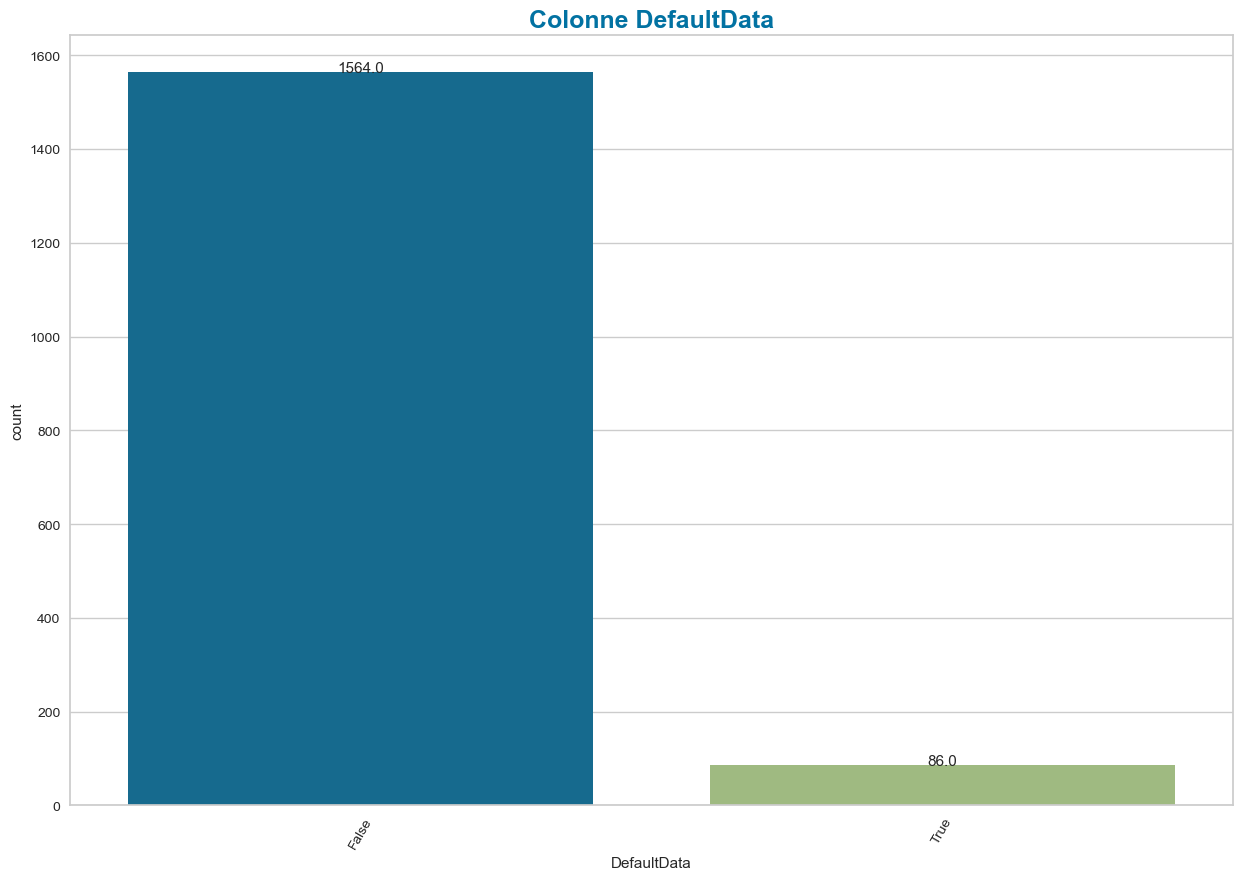

In [20]:
plot_cnt(energie,"DefaultData","Colonne DefaultData")

- Pas beacoup de données qui ont utilisé les des données par défaut pour au moins une caractéristique de la propriété.

- TaxParcelIdentificationNumber(comme un identifiant alors qu'on a déjà un id) : je supprime
- PropertyName(détail inutile à l'analyse): je supprime
- Address(latitude et longitude à la place) : je supprime
- CouncilDistrictCode :  numéro du district inutile
- DefaultData: contient True ou flase sans aucun sens : je supprime

In [21]:
columns_to_drop = ['TaxParcelIdentificationNumber','PropertyName','Address','CouncilDistrictCode']
print(energie.shape[1],"colonnes avant suppression")
    
energie.drop(columns_to_drop, axis=1, inplace=True)
print(energie.shape[1],"colonnes après suppression")

40 colonnes avant suppression
36 colonnes après suppression


- Vérification de la variable YearBuilt

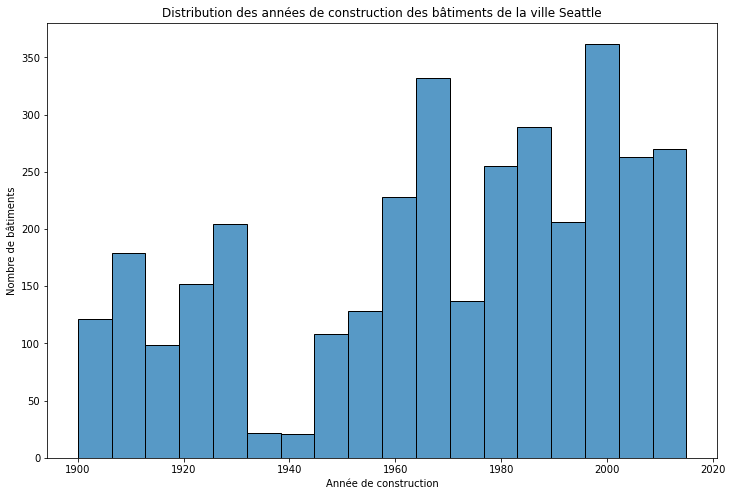

In [65]:
fig = plt.figure(figsize=(12,8))
ax = sns.histplot(data=energie, x='YearBuilt')
ax.set_xlabel("Année de construction")
ax.set_ylabel("Nombre de bâtiments")
plt.title("Distribution des années de construction des bâtiments de la ville Seattle")
plt.show()

- Récupérer l'âge des bâtiments sera plus pertinent dans l'analyse

In [143]:
energie.head()

OSEBuildingID    BuildingType PrimaryPropertyType Neighborhood  Latitude  \
0              1  NonResidential               Hotel     DOWNTOWN 47.612200   
1              2  NonResidential               Hotel     DOWNTOWN 47.613170   
2              3  NonResidential               Hotel     DOWNTOWN 47.613930   
3              5  NonResidential               Hotel     DOWNTOWN 47.614120   
4              8  NonResidential               Hotel     DOWNTOWN 47.613750   

    Longitude  YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
0 -122.337990       1927           1.000000              12             88434   
1 -122.333930       1996           1.000000              11            103566   
2 -122.338100       1969           1.000000              41            956110   
3 -122.336640       1926           1.000000              10             61320   
4 -122.340470       1980           1.000000              18            175580   

   PropertyGFAParking  PropertyGFABuilding(s)      ListOfAllPropertyUseTypes  \
0                   0                   88434                          Hotel   
1               15064                   88502     Hotel, Parking, Restaurant   
2              196718                  759392                          Hotel   
3                   0                   61320                          Hotel   
4               62000                  113580  Hotel, Parking, Swimming Pool   

  LargestPropertyUseType  LargestPropertyUseTypeGFA  \
0                  Hotel               88434.000000   
1                  Hotel               83880.000000   
2                  Hotel              756493.000000   
3                  Hotel               61320.000000   
4                  Hotel              123445.000000   

  SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
0                          NaN                              NaN   
1                      Parking                     15064.000000   
2                          NaN                              NaN   
3                          NaN                              NaN   
4                      Parking                     68009.000000   

  ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
0                         NaN                             NaN   
1                  Restaurant                     4622.000000   
2                         NaN                             NaN   
3                         NaN                             NaN   
4               Swimming Pool                        0.000000   

   ENERGYSTARScore  SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  \
0        60.000000         81.699997           84.300003          182.500000   
1        61.000000         94.800003           97.900002          176.100006   
2        43.000000         96.000000           97.699997          241.899994   
3        56.000000        110.800003          113.300003          216.199997   
4        75.000000        114.800003          118.699997          211.399994   

   SourceEUIWN(kBtu/sf)  SiteEnergyUse(kBtu)  SiteEnergyUseWN(kBtu)  \
0            189.000000       7226362.500000         7456910.000000   
1            179.399994       8387933.000000         8664479.000000   
2            244.100006      72587024.000000        73937112.000000   
3            224.000000       6794584.000000         6946800.500000   
4            215.600006      14172606.000000        14656503.000000   

   SteamUse(kBtu)  Electricity(kWh)  Electricity(kBtu)  NaturalGas(therms)  \
0  2003882.000000    1156514.250000     3946027.000000        12764.529300   
1        0.000000     950425.187500     3242851.000000        51450.816410   
2 21566554.000000   14515435.000000    49526664.000000        14938.000000   
3  2214446.250000     811525.312500     2768924.000000        18112.130860   
4        0.000000    1573448.625000     5368607.000000        88039.984380   

   NaturalGas(kBtu)  DefaultData ComplianceStatus Outlier 

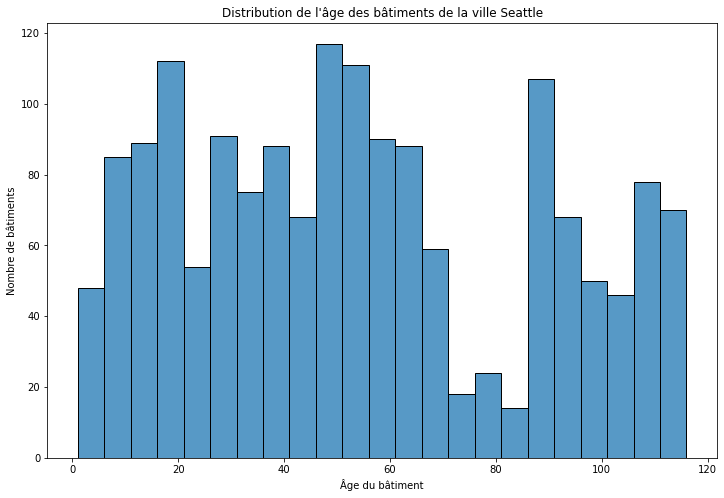

In [18]:
energie['BuildingAge'] = 2016 - energie['YearBuilt']
energie.drop('YearBuilt', axis=1, inplace=True)

fig = plt.figure(figsize=(12,8))
ax = sns.histplot(data=energie, x='BuildingAge', bins=int((energie.BuildingAge.max() - energie.BuildingAge.min())/5))
ax.set_xlabel("Âge du bâtiment")
ax.set_ylabel("Nombre de bâtiments")
plt.title("Distribution de l'âge des bâtiments de la ville Seattle")
plt.show()

- Vérification des quartiers

In [44]:
energie.Neighborhood.unique()

array(['DOWNTOWN', 'SOUTHEAST', 'NORTHEAST', 'EAST', 'Central', 'NORTH',
       'MAGNOLIA / QUEEN ANNE', 'LAKE UNION', 'GREATER DUWAMISH',
       'BALLARD', 'NORTHWEST', 'CENTRAL', 'SOUTHWEST', 'DELRIDGE',
       'Ballard', 'North', 'Delridge', 'Northwest',
       'DELRIDGE NEIGHBORHOODS'], dtype=object)

Les quartiers ne sont pas tous écrit en majuscule je les remets en majuscule

In [23]:
energie['Neighborhood'] = energie['Neighborhood'].apply(lambda x : x.upper())

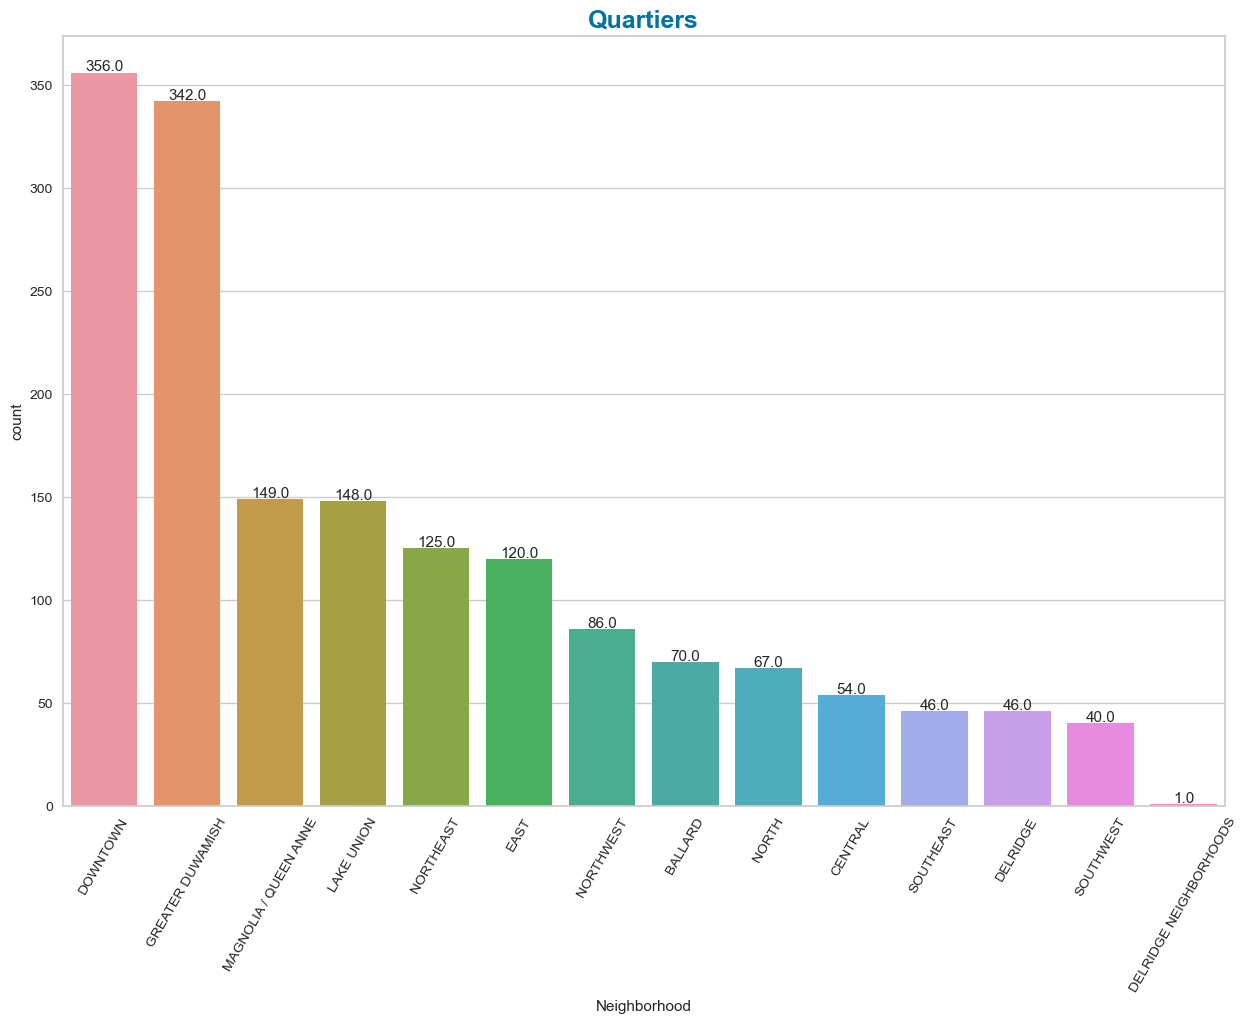

In [26]:
plot_cnt(energie,"Neighborhood","Quartiers")

- Traitement des variables d'énergie:

- les variables qui se terminent par WN : ajustée à ce que la propriété aurait consommé dans des conditions météorologiques moyennes sur 30 ans. Je supprime car redondantes

- D'autres variables sont redondantes aussi :Electricity(kWh) / Electricity(kBtu), NaturalGas(therms) / NaturalGas(kBtu)
- L''utilisation des énergies est exprimée en diverses unités :kBTu : le B.T.U. (British Thermal Unit) est une unité de mesure d'énergie thermique. Le BTU, de symbole Btu, est utilisé dans les pays anglo-saxons et asiatiques et équivaut à 1055,06 Joule ou 252 calories.Pour convertir une puissance en Btu une puissance en watt il suffit de diviser la puissance en Btu par 3414,5 pour obtenir la puissance en Kw.therms : le therm est une unité d'énergie thermique anglo-saxone égale à 1 000 000 unités thermiques britanniques (BTU).1 kWh = 0.034095106405145 thm,1 thm = 29.329722222222 kWh

In [102]:
energie.shape

(1650, 36)

In [28]:
energie.columns

Index(['OSEBuildingID', 'BuildingType', 'PrimaryPropertyType', 'Neighborhood',
       'Latitude', 'Longitude', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'DefaultData', 'ComplianceStatus', 'Outlier',
       'TotalGHGEmissions', 'GHGEmissionsIntensity', 'BuildingAge'],
      dtype='object')

In [29]:
#fonction qui renvoie un dataframe en sélectionnant des colonnes spécifiques qui contiennent la chaîne de 
#suffixe dans leurs noms de colonne
def select_suff_columns(df,suffix:str):
    suffix_columns=[]
    for col in df.columns:
        if suffix in col:
            suffix_columns.append(col)
    suffix_columns_df=df[suffix_columns]
    return suffix_columns_df

In [30]:
#Suppression des variables avec le suffixe WN
print(energie.shape[1],"colonnes avant suppression")
energie.drop(select_suff_columns(energie,'WN'), axis=1, inplace=True)
print(energie.shape[1],"colonnes après suppression")

36 colonnes avant suppression
33 colonnes après suppression


### Matrice de corrélation  : <a class="anchor" id="corr"></a>

- Je vérifie à travers la matrice de corrélation les variables fortement corrélés pour supprimer 

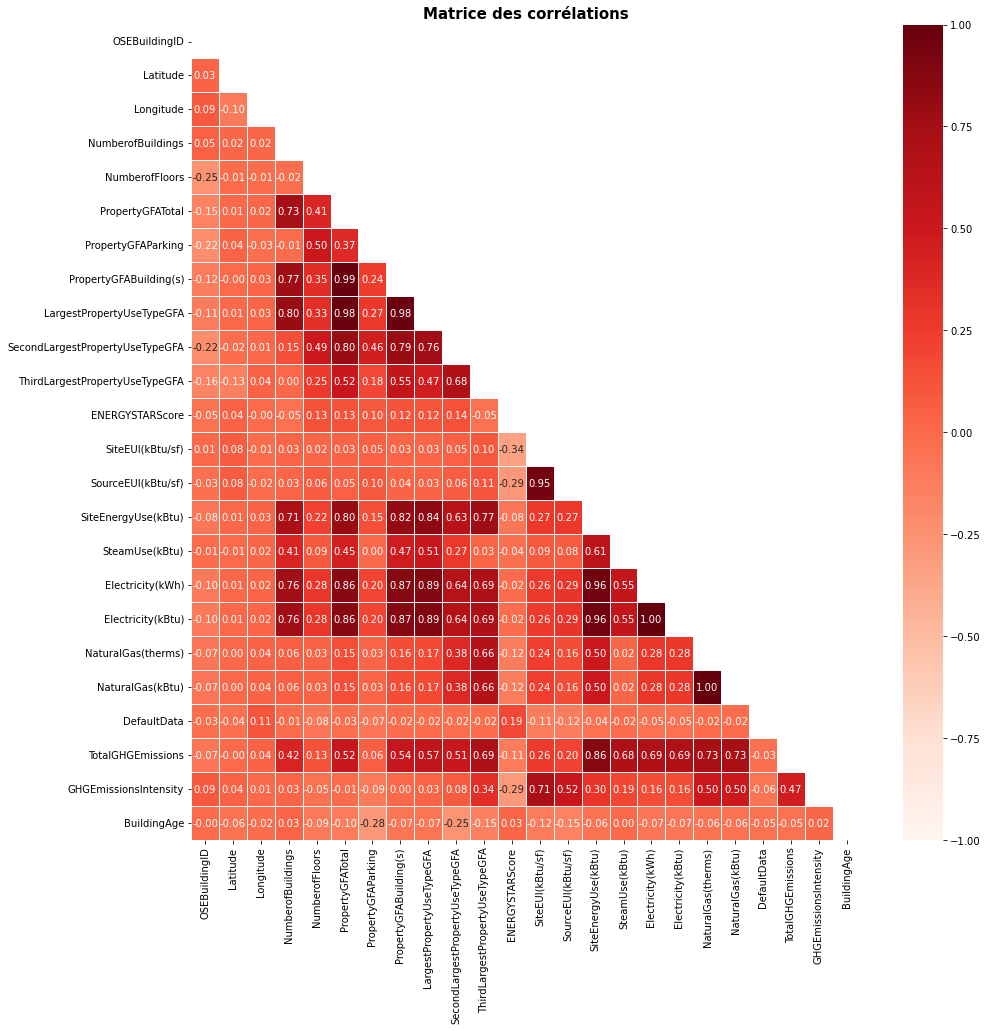

In [60]:
plt.figure(figsize=(15, 15))
correlation_matrix(energie)

La matrice de corrélation montre des corrélations très fortes (à 1) pour les indicateurs d'energie avec des mesures différents

In [22]:
# Je supprime Electricity(kWh) etj e garde Electricity(kBtu)
# Je supprime NaturalGas(therms) et je garde NaturalGas(kBtu)
print(energie.shape[1],"colonnes avant suppression")
energie.drop(["Electricity(kWh)","NaturalGas(therms)"], axis = 1, inplace = True)
print(energie.shape[1],"colonnes restantes")

33 colonnes avant suppression
31 colonnes restantes


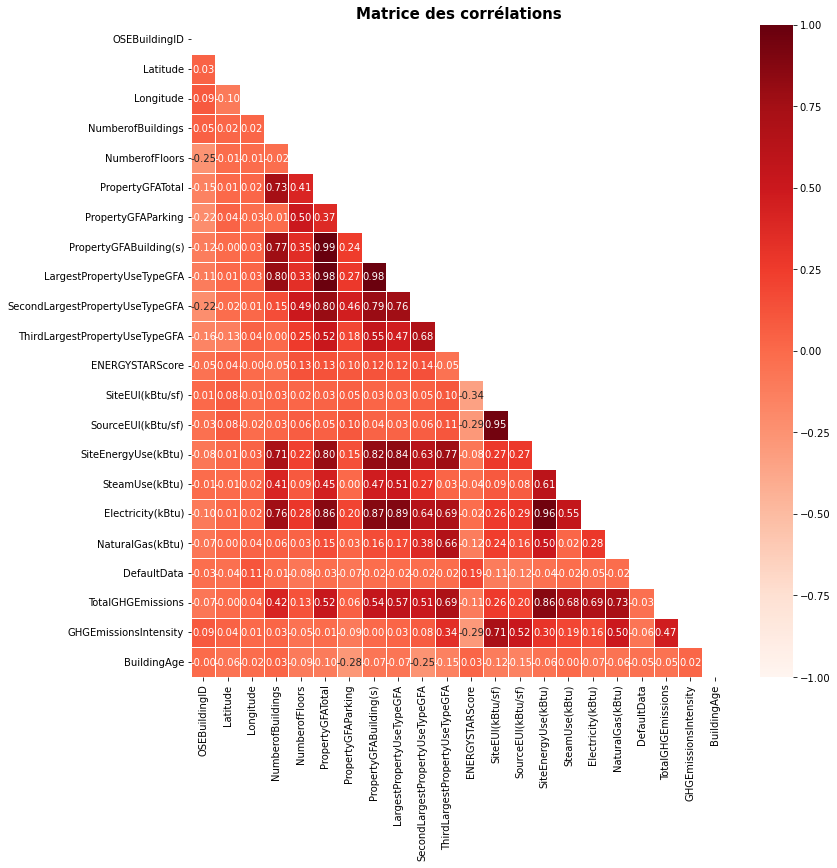

In [65]:
plt.figure(figsize=(12, 12))
correlation_matrix(energie)

### Vérification de la distribution des données  : <a class="anchor" id="dist"></a>

In [66]:
# Vérification des distributions
energie.describe()

OSEBuildingID    Latitude   Longitude  NumberofBuildings  \
count    1650.000000 1650.000000 1650.000000        1648.000000   
mean    16285.053333   47.616180 -122.332938           1.168083   
std     13832.308414    0.048260    0.024603           2.945821   
min         1.000000   47.499170 -122.411820           0.000000   
25%       580.250000   47.585432 -122.343310           1.000000   
50%     21139.000000   47.612420 -122.332895           1.000000   
75%     24599.750000   47.649757 -122.321755           1.000000   
max     50226.000000   47.733870 -122.258640         111.000000   

       NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
count     1650.000000       1650.000000         1650.000000   
mean         4.137576     119511.460606        12997.217576   
std          6.595006     298873.906293        42478.040153   
min          0.000000      11285.000000            0.000000   
25%          1.000000      29512.250000            0.000000   
50%          2.000000      49712.000000            0.000000   
75%          4.000000     106030.750000            0.000000   
max         99.000000    9320156.000000       512608.000000   

       PropertyGFABuilding(s)  LargestPropertyUseTypeGFA  \
count             1650.000000                1644.000000   
mean            106514.243030               99317.683090   
std             285677.172125              278136.752723   
min               3636.000000                5656.000000   
25%              28507.750000               25641.750000   
50%              47557.000000               44039.000000   
75%              95306.500000               92171.750000   
max            9320156.000000             9320156.000000   

       SecondLargestPropertyUseTypeGFA  ThirdLargestPropertyUseTypeGFA  \
count                       848.000000                      351.000000   
mean                      36981.157190                    14923.334469   
std                       70088.777826                    36887.605015   
min                           0.000000                        0.000000   
25%                        5406.000000                     2649.000000   
50%                       12011.500000                     5931.000000   
75%                       31863.000000                    12670.500000   
max                      686750.000000                   459748.000000   

       ENERGYSTARScore  SiteEUI(kBtu/sf)  SourceEUI(kBtu/sf)  \
count      1083.000000       1647.000000         1648.000000   
mean         65.191136         72.465149          176.367961   
std          28.376486         73.750235          184.378711   
min           1.000000          0.000000            0.000000   
25%          48.000000         34.049999           77.775002   
50%          73.000000         52.099998          131.500000   
75%          89.000000         81.799999          204.225006   
max         100.000000        834.400024         2620.000000   

       SiteEnergyUse(kBtu)   SteamUse(kBtu)  Electricity(kBtu)  \
count          1648.000000      1648.000000        1648.000000   
mean        8478253.396907    518171.051741     5862635.870199   
std        30384361.266581   5543730.846994    20879724.247696   
min               0.000000         0.000000     -115417.000000   
25%         1251083.406250         0.000000      729457.000000   
50%         2582214.375000         0.000000     1632788.500000   
75%         6928335.000000         0.000000     4882877.250000   
max       873923712.000000 134943456.000000   657074389.000000   

       NaturalGas(kBtu)  TotalGHGEmissions  GHGEmissionsIntensity  BuildingAge  
count       1648.000000        1648.000000            1648.000000  1650.000000  
mean     1990819.940557         186.599794               1.622093    53.843636  
std      9419842.195565         755.853485               2.344926    32.642556  
min            0.000000          -0.800000              -0.020000     1.000000  
25%            0.000000          20.475000        

### Gestion des valeurs nulls et négatifs : <a class="anchor" id="neg"></a>

* **Remarques** :
- NumberofBuildings min=0 
- NumberofFloors min=0 peut-être un RDC ?
- Des valeurs négatifs :Electricity(kBtu),TotalGHGEmissions,GHGEmissionsIntensity

In [706]:
energie.NumberofBuildings.unique()

array([  1.,   3.,   0.,   2.,   4.,  27.,   6.,  11.,  14.,   9.,   5.,
        nan,   7.,   8.,  23.,  10., 111.])

I y a des numéros à 0 et en nan, que je vérifie

In [67]:
# Je vérifie les bâtiments avec NumberofBuildings==0
energie[energie["NumberofBuildings"]==0]

OSEBuildingID        BuildingType          PrimaryPropertyType  \
63               89      NonResidential               Medical Office   
76              113      NonResidential  Small- and Mid-Sized Office   
160             257      NonResidential                    Warehouse   
201             322      NonResidential                 Large Office   
241             366      NonResidential  Small- and Mid-Sized Office   
264             391      NonResidential           Mixed Use Property   
278             408      NonResidential                 Large Office   
280             410      NonResidential                        Hotel   
291             421      NonResidential                        Other   
358             504  Nonresidential COS                        Other   
365             517      NonResidential  Supermarket / Grocery Store   
417             576      NonResidential                        Other   
429             588      NonResidential           Mixed Use Property   
433             594      NonResidential                        Other   
477             640      NonResidential                 Large Office   
481             649      NonResidential  Small- and Mid-Sized Office   
488             657      NonResidential           Mixed Use Property   
494             673      NonResidential                 Retail Store   
544             735      NonResidential                    Warehouse   
608             812      NonResidential                    Warehouse   
809           19900      NonResidential                   Laboratory   
952           20323      NonResidential               Residence Hall   
985           20427      NonResidential           Mixed Use Property   
1002          20474      NonResidential                        Other   
1025          20532  Nonresidential COS                        Other   
1177          21180      NonResidential                        Other   
1244          21336      NonResidential                        Other   
1256          21365      NonResidential               Medical Office   
1317          21508      NonResidential                        Other   
1606          22801  Nonresidential COS                        Other   
2054          24270      NonResidential             Worship Facility   
2115          24514      NonResidential  Supermarket / Grocery Store   
2166          24646  Nonresidential COS                        Other   
2188          24716      NonResidential       Refrigerated Warehouse   
2214          24822      NonResidential  Small- and Mid-Sized Office   
2382          25461      NonResidential                   Restaurant   
2407          25546      NonResidential           Mixed Use Property   
2441          25661      NonResidential  Small- and Mid-Sized Office   
2482          25772      NonResidential                     Hospital   
2564          26119      NonResidential                 Retail Store   
2631          26331      NonResidential  Small- and Mid-Sized Office   
2708          26706      NonResidential  Small- and Mid-Sized Office   
2715          26719      NonResidential  Small- and Mid-Sized Office   
2747          26833      NonResidential  Small- and Mid-Sized Office   
2782          26924  Nonresidential COS           Mixed Use Property   
2963          27673      NonResidential                        Hotel   
3108          33289      NonResidential                 Large Office   
3121          36034      NonResidential                 Retail Store   
3155          45287  Nonresidential COS                        Other   
3205          49783      NonResidential                   Laboratory   
3232          49862  Nonresidential COS                        Other   
3259          49924      NonResidential  Small- and Mid-Sized Office   

               Neighborhood  Latitude   Longitude  NumberofBuildings  \
63                     EAST 47.612440 -122.321400           0.000000   
76    MAGNOLIA / QUEEN ANNE 47.623910 -122.34

- Ce sont bien des bâtiments avec des consommation d'energie, ce n'est pas possible qu'ils soient à 0 ,e les remets à 1

- Rectification : remise à 1

In [23]:
# Je les remets en 1
energie['NumberofBuildings'].replace(0, 1, inplace=True)

In [25]:
energie[energie['NumberofBuildings'].isnull()]

OSEBuildingID    BuildingType          PrimaryPropertyType Neighborhood  \
578             773  NonResidential  Small- and Mid-Sized Office     DOWNTOWN   
2670          26532  NonResidential           Mixed Use Property    NORTHEAST   

      Latitude   Longitude  NumberofBuildings  NumberofFloors  \
578  47.603800 -122.332930                NaN               4   
2670 47.661820 -122.313450                NaN               2   

      PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
578              63150                   0                   63150   
2670             20760                   0                   20760   

     ListOfAllPropertyUseTypes LargestPropertyUseType  \
578                        NaN                    NaN   
2670                       NaN                    NaN   

      LargestPropertyUseTypeGFA SecondLargestPropertyUseType  \
578                         NaN                          NaN   
2670                        NaN                          NaN   

      SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  \
578                               NaN                         NaN   
2670                              NaN                         NaN   

      ThirdLargestPropertyUseTypeGFA  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
578                              NaN              NaN               NaN   
2670                             NaN              NaN               NaN   

      SourceEUI(kBtu/sf)  SiteEnergyUse(kBtu)  SteamUse(kBtu)  \
578                  NaN                  NaN             NaN   
2670                 NaN                  NaN             NaN   

      Electricity(kBtu)  NaturalGas(kBtu)  DefaultData ComplianceStatus  \
578                 NaN               NaN        False    Non-Compliant   
2670                NaN               NaN        False    Non-Compliant   

     Outlier  TotalGHGEmissions  GHGEmissionsIntensity  BuildingAge  
578      NaN                NaN                    NaN           92  
2670     NaN                NaN                    NaN           88

- Suppression

- Pas de données relatives à  la consommation d'enrgie, je les supprime

In [24]:
print(energie.shape[0],"lignes avant suppression")
index_to_drop=energie[energie['NumberofBuildings'].isnull()].index
energie.drop(index_to_drop, inplace=True)
print(energie.shape[0],"lignes après suppression")

1650 lignes avant suppression
1648 lignes après suppression


- Vérification des nombre d'étages

In [712]:
energie.NumberofFloors.unique()

array([12, 11, 41, 10, 18,  2,  8, 15, 25,  9, 33,  6, 28,  5, 19,  7,  1,
        3,  4, 24, 20, 34,  0, 16, 23, 17, 36, 22, 47, 29, 14, 49, 37, 42,
       63, 13, 21, 55, 46, 30, 56, 76, 27, 99, 39])

Je vérifie ceux à 0

In [713]:
energie[energie["NumberofFloors"]==0]

OSEBuildingID        BuildingType          PrimaryPropertyType  \
166             267      NonResidential                        Hotel   
487             656      NonResidential               Medical Office   
488             657      NonResidential           Mixed Use Property   
564             758      NonResidential                        Other   
1754          23311      NonResidential               Medical Office   
1993          24086              Campus                        Other   
3130          40028      NonResidential                    Warehouse   
3131          40031      NonResidential               Medical Office   
3132          40034      NonResidential  Small- and Mid-Sized Office   
3168          49705  Nonresidential COS                        Other   
3273          49966      NonResidential                        Other   
3274          49967              Campus                   University   
3276          49970      NonResidential               Residence Hall   
3278          49979      NonResidential               Residence Hall   
3279          49980      NonResidential               Residence Hall   
3280          49983      NonResidential               Residence Hall   

          Neighborhood  Latitude   Longitude  NumberofBuildings  \
166           DOWNTOWN 47.612750 -122.333300           1.000000   
487               EAST 47.609790 -122.322980           1.000000   
488           DOWNTOWN 47.617830 -122.337290           1.000000   
564           DOWNTOWN 47.612890 -122.335310           1.000000   
1754              EAST 47.608620 -122.323720           1.000000   
1993  GREATER DUWAMISH 47.590420 -122.324980          10.000000   
3130         NORTHEAST 47.684540 -122.262350           1.000000   
3131         NORTHEAST 47.682400 -122.262230           1.000000   
3132         NORTHEAST 47.682540 -122.262990           1.000000   
3168         NORTHEAST 47.682120 -122.263300           8.000000   
3273         SOUTHEAST 47.562600 -122.293960           1.000000   
3274         NORTHEAST 47.656440 -122.310410         111.000000   
3276         NORTHEAST 47.657180 -122.316320           1.000000   
3278         NORTHEAST 47.655770 -122.315300           1.000000   
3279         NORTHEAST 47.654470 -122.317330           1.000000   
3280         NORTHEAST 47.651760 -122.307560           1.000000   

      NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
166                0            934292                   0   
487                0            225982                   0   
488                0            516407                   0   
564                0            947987                   0   
1754               0            274568                   0   
1993               0            230971                   0   
3130               0            384772                   0   
3131               0             30287                   0   
3132               0             21931                   0   
3168               0            502030                   0   
3273               0             40265                   0   
3274               0           9320156                   0   
3276               0            176225                   0   
3278               0            166991                   0   
3279               0             89392                   0   
3280               0             97040                   0   

      PropertyGFABuilding(s)  \
166                   934292   
487                   225982   
488                   516407   
564                   947987   
1754                  274568   
1993                  230971   
3130                  384772   
3131                   30287   
3132                   21931   
3168                  502030   
3273                   40265   
3274                 9320156   
3276                  176225   
3278                  166991   
3279                   89392   
3280                   97040   

                                         

- Peut-être que c'est du rez-de chaussée, je les garde

- Je vérifie les consommations d'energies

In [169]:
missing_values(energie)

Variable   nan    %nan
17      ThirdLargestPropertyUseType  1297   78.7%
18   ThirdLargestPropertyUseTypeGFA  1297   78.7%
15     SecondLargestPropertyUseType   800   48.5%
16  SecondLargestPropertyUseTypeGFA   800   48.5%
19                  ENERGYSTARScore   565   34.3%
28                          Outlier  1648  100.0%
13           LargestPropertyUseType     4    0.2%
14        LargestPropertyUseTypeGFA     4    0.2%
20                 SiteEUI(kBtu/sf)     1    0.1%
27                 ComplianceStatus     0    0.0%
26                      DefaultData     0    0.0%
25                 NaturalGas(kBtu)     0    0.0%
24                Electricity(kBtu)     0    0.0%
22              SiteEnergyUse(kBtu)     0    0.0%
21               SourceEUI(kBtu/sf)     0    0.0%
29                TotalGHGEmissions     0    0.0%
23                   SteamUse(kBtu)     0    0.0%
0                     OSEBuildingID     0    0.0%
1                      BuildingType     0    0.0%
12        ListOfAllPropertyUseTypes     0    0.0%
11           PropertyGFABuilding(s)     0    0.0%
10               PropertyGFAParking     0    0.0%
9                  PropertyGFATotal     0    0.0%
8                    NumberofFloors     0    0.0%
7                 NumberofBuildings     0    0.0%
6                         YearBuilt     0    0.0%
5                         Longitude     0    0.0%
4                          Latitude     0    0.0%
3                      Neighborhood     0    0.0%
2               PrimaryPropertyType     0    0.0%
30            GHGEmissionsIntensity     0    0.0%

- Vériification des batiments à consommation et émissions négatives 
- Les bâtiments avec valeurs SiteEnergyUse et TotalGHGEmissions  négatives sont supprimés

In [25]:
print(energie.shape[0],"lignes avant suppression")
for a in ['SiteEnergyUse(kBtu)','TotalGHGEmissions'] :
    print("Le nombre de bâtiments dont {} est <0 est de : {}".format(a, sum(energie[a]<0)))
    # Je supprime des bâtiments avec valeur négative 
    
    energie = energie[energie[a]>=0] 
print(energie.shape[0]," lignes après suppression")

1648 lignes avant suppression
Le nombre de bâtiments dont SiteEnergyUse(kBtu) est <0 est de : 0
Le nombre de bâtiments dont TotalGHGEmissions est <0 est de : 1
1647  lignes après suppression


- Vériification des batiments à superficie totale et superficie parking à 0
- Les bâtiments  à superficie totale et superficie parking négatives sont supprimés

In [26]:
for b in ["PropertyGFABuilding(s)","PropertyGFAParking"] :
    print("Le nombre de bâtiments avec {}  <0 est de : {}".format(b, sum(energie[b]<0.0)))
    values_to_nan = energie.loc[energie[b]<0, b].unique()

Le nombre de bâtiments avec PropertyGFABuilding(s)  <0 est de : 0
Le nombre de bâtiments avec PropertyGFAParking  <0 est de : 0


In [121]:
energie.describe()

OSEBuildingID    Latitude   Longitude  NumberofBuildings  \
count    1609.000000 1609.000000 1609.000000        1609.000000   
mean    16382.742076   47.615914 -122.332958           1.108763   
std     13731.049032    0.048304    0.024541           1.058009   
min         1.000000   47.499170 -122.411820           1.000000   
25%       589.000000   47.584760 -122.343280           1.000000   
50%     21177.000000   47.612400 -122.333000           1.000000   
75%     24602.000000   47.649750 -122.321840           1.000000   
max     50226.000000   47.733870 -122.258640          27.000000   

       NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
count     1609.000000       1609.000000         1609.000000   
mean         4.029832     105696.157241        12939.536979   
std          6.156670     167072.729670        41994.392010   
min          0.000000      11285.000000            0.000000   
25%          1.000000      29258.000000            0.000000   
50%          2.000000      48789.000000            0.000000   
75%          4.000000     102930.000000            0.000000   
max         99.000000    1605578.000000       512608.000000   

       LargestPropertyUseTypeGFA  SecondLargestPropertyUseTypeGFA  \
count                1609.000000                      1609.000000   
mean                84976.949037                     17001.441452   
std                128834.273210                     44452.193517   
min                     0.000000                         0.000000   
25%                 25480.000000                         0.000000   
50%                 43016.000000                         0.000000   
75%                 89200.000000                     12610.000000   
max               1585960.000000                    438756.000000   

       ThirdLargestPropertyUseTypeGFA  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
count                     1609.000000      1066.000000       1609.000000   
mean                      2921.086015        65.231707         71.873213   
std                      14238.643569        28.330805         71.671150   
min                          0.000000         1.000000          2.100000   
25%                          0.000000        48.000000         34.400002   
50%                          0.000000        73.000000         52.099998   
75%                          0.000000        89.000000         81.300003   
max                     303910.000000       100.000000        834.400024   

       SiteEnergyUse(kBtu)  SteamUse(kBtu)  Electricity(kBtu)  \
count          1609.000000     1609.000000        1609.000000   
mean        6422167.471914   227774.350074     4670185.839707   
std        10146114.403964  1400533.694252     8259769.099063   
min           97690.398440        0.000000           0.000000   
25%         1267348.500000        0.000000      739343.000000   
50%         2582687.000000        0.000000     1619177.000000   
75%         6794584.000000        0.000000     4765753.000000   
max        75073888.000000 21566554.000000    74917352.000000   

       NaturalGas(kBtu)  TotalGHGEmissions  GHGEmissionsIntensity  BuildingAge  
count       1609.000000        1609.000000            1609.000000  1609.000000  
mean     1489411.163479         129.241833               1.568403    53.965817  
std      3067162.522869         222.568531               2.120949    32.670821  
min            0.000000           0.680000               0.010000     1.000000  
25%            0.000000          20.860000               0.360000    27.000000  
50%       516161.000000          49.790000               0.880000    50.000000  
75%      1493800.000000         135.230000               1.890000    86.000000  
max     34685331.000000        2089.280000              25.710000   116.000000

- SiteEnergyUse(kBtu)=Electricity(kBtu)+ NaturalGas(kBtu)+ SteamUse(kBtu)
- PropertyGFATotal=PropertyGFAParking+PropertyGFABuilding
- PropertyGFATotal=LargestPropertyUseTypeGFA+SecondLargestPropertyUseTypeGFA+ThirdLargestPropertyUseTypeGFA

### Vérification des doublons : <a class="anchor" id="doub"></a>

- Vérification des doublons en se basant sur l'identifiant du bâtiment

In [173]:
energie.loc[energie['OSEBuildingID'].duplicated(keep=False),:]

Empty DataFrame
Columns: [OSEBuildingID, BuildingType, PrimaryPropertyType, Neighborhood, Latitude, Longitude, YearBuilt, NumberofBuildings, NumberofFloors, PropertyGFATotal, PropertyGFAParking, PropertyGFABuilding(s), ListOfAllPropertyUseTypes, LargestPropertyUseType, LargestPropertyUseTypeGFA, SecondLargestPropertyUseType, SecondLargestPropertyUseTypeGFA, ThirdLargestPropertyUseType, ThirdLargestPropertyUseTypeGFA, ENERGYSTARScore, SiteEUI(kBtu/sf), SourceEUI(kBtu/sf), SiteEnergyUse(kBtu), SteamUse(kBtu), Electricity(kBtu), NaturalGas(kBtu), DefaultData, ComplianceStatus, Outlier, TotalGHGEmissions, GHGEmissionsIntensity]
Index: []

Pas de Doublons

- Deuxième vérification des colonnes corrélés par matrice de corrélations

### Suppression des variables très corrélées : <a class="anchor" id="corel"></a>

In [175]:
energie.head()

OSEBuildingID    BuildingType PrimaryPropertyType Neighborhood  Latitude  \
0              1  NonResidential               Hotel     DOWNTOWN 47.612200   
1              2  NonResidential               Hotel     DOWNTOWN 47.613170   
2              3  NonResidential               Hotel     DOWNTOWN 47.613930   
3              5  NonResidential               Hotel     DOWNTOWN 47.614120   
4              8  NonResidential               Hotel     DOWNTOWN 47.613750   

    Longitude  YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
0 -122.337990       1927           1.000000              12             88434   
1 -122.333930       1996           1.000000              11            103566   
2 -122.338100       1969           1.000000              41            956110   
3 -122.336640       1926           1.000000              10             61320   
4 -122.340470       1980           1.000000              18            175580   

   PropertyGFAParking  PropertyGFABuilding(s)      ListOfAllPropertyUseTypes  \
0                   0                   88434                          Hotel   
1               15064                   88502     Hotel, Parking, Restaurant   
2              196718                  759392                          Hotel   
3                   0                   61320                          Hotel   
4               62000                  113580  Hotel, Parking, Swimming Pool   

  LargestPropertyUseType  LargestPropertyUseTypeGFA  \
0                  Hotel               88434.000000   
1                  Hotel               83880.000000   
2                  Hotel              756493.000000   
3                  Hotel               61320.000000   
4                  Hotel              123445.000000   

  SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
0                          NaN                              NaN   
1                      Parking                     15064.000000   
2                          NaN                              NaN   
3                          NaN                              NaN   
4                      Parking                     68009.000000   

  ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
0                         NaN                             NaN   
1                  Restaurant                     4622.000000   
2                         NaN                             NaN   
3                         NaN                             NaN   
4               Swimming Pool                        0.000000   

   ENERGYSTARScore  SiteEUI(kBtu/sf)  SourceEUI(kBtu/sf)  SiteEnergyUse(kBtu)  \
0        60.000000         81.699997          182.500000       7226362.500000   
1        61.000000         94.800003          176.100006       8387933.000000   
2        43.000000         96.000000          241.899994      72587024.000000   
3        56.000000        110.800003          216.199997       6794584.000000   
4        75.000000        114.800003          211.399994      14172606.000000   

   SteamUse(kBtu)  Electricity(kBtu)  NaturalGas(kBtu)  DefaultData  \
0  2003882.000000     3946027.000000    1276453.000000        False   
1        0.000000     3242851.000000    5145082.000000        False   
2 21566554.000000    49526664.000000    1493800.000000        False   
3  2214446.250000     2768924.000000    1811213.000000        False   
4        0.000000     5368607.000000    8803998.000000        False   

  ComplianceStatus Outlier  TotalGHGEmissions  GHGEmissionsIntensity  
0        Compliant     NaN         249.980000               2.830000  
1        Compliant     NaN         295.860000               2.860000  
2        Compliant     NaN        2089.280000               2.190000  
3        Compliant     NaN         286.430000               4.670000  
4        Compliant     NaN         505.010000               2.880000

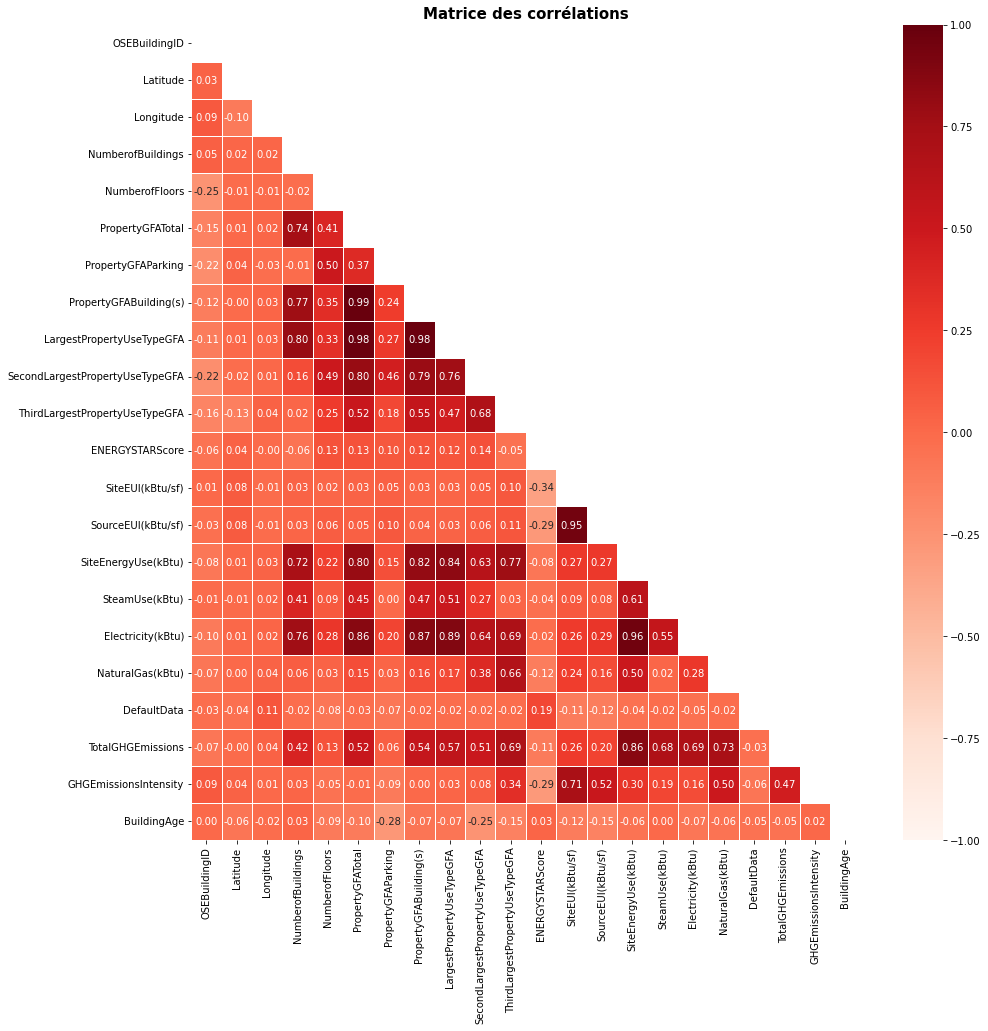

In [177]:
plt.figure(figsize=(15, 15))
correlation_matrix(energie)

In [725]:
energie.head()

OSEBuildingID    BuildingType PrimaryPropertyType Neighborhood  Latitude  \
0              1  NonResidential               Hotel     DOWNTOWN 47.612200   
1              2  NonResidential               Hotel     DOWNTOWN 47.613170   
2              3  NonResidential               Hotel     DOWNTOWN 47.613930   
3              5  NonResidential               Hotel     DOWNTOWN 47.614120   
4              8  NonResidential               Hotel     DOWNTOWN 47.613750   

    Longitude  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
0 -122.337990           1.000000              12             88434   
1 -122.333930           1.000000              11            103566   
2 -122.338100           1.000000              41            956110   
3 -122.336640           1.000000              10             61320   
4 -122.340470           1.000000              18            175580   

   PropertyGFAParking  PropertyGFABuilding      ListOfAllPropertyUseTypes  \
0                   0                88434                          Hotel   
1               15064                88502     Hotel, Parking, Restaurant   
2              196718               759392                          Hotel   
3                   0                61320                          Hotel   
4               62000               113580  Hotel, Parking, Swimming Pool   

  LargestPropertyUseType  LargestPropertyUseTypeGFA  \
0                  Hotel               88434.000000   
1                  Hotel               83880.000000   
2                  Hotel              756493.000000   
3                  Hotel               61320.000000   
4                  Hotel              123445.000000   

  SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
0                          NaN                              NaN   
1                      Parking                     15064.000000   
2                          NaN                              NaN   
3                          NaN                              NaN   
4                      Parking                     68009.000000   

  ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
0                         NaN                             NaN   
1                  Restaurant                     4622.000000   
2                         NaN                             NaN   
3                         NaN                             NaN   
4               Swimming Pool                        0.000000   

   ENERGYSTARScore  SiteEUI(kBtu/sf)  SourceEUI(kBtu/sf)  SiteEnergyUse(kBtu)  \
0        60.000000         81.699997          182.500000       7226362.500000   
1        61.000000         94.800003          176.100006       8387933.000000   
2        43.000000         96.000000          241.899994      72587024.000000   
3        56.000000        110.800003          216.199997       6794584.000000   
4        75.000000        114.800003          211.399994      14172606.000000   

   SteamUse(kBtu)  Electricity(kBtu)  NaturalGas(kBtu)  DefaultData  \
0  2003882.000000     3946027.000000    1276453.000000        False   
1        0.000000     3242851.000000    5145082.000000        False   
2 21566554.000000    49526664.000000    1493800.000000        False   
3  2214446.250000     2768924.000000    1811213.000000        False   
4        0.000000     5368607.000000    8803998.000000        False   

  ComplianceStatus Outlier  TotalGHGEmissions  GHGEmissionsIntensity  \
0        Compliant     NaN         249.980000               2.830000   
1        Compliant     NaN         295.860000               2.860000   
2        Compliant     NaN        2089.280000               2.190000   
3        Compliant     NaN         286.430000               4.670000   
4        Compliant     NaN         505.010000               2.880000   

   BuildingAge  
0           89  
1           20  
2           47  
3           90  
4           36

- PropertyGFATotal/PropertyGFABuilding : très corrélés : je supprime PropertyGFABuilding
- LargestPropertyUseTypeGFA/PropertyGFATotal : très corrélés 
- LargestPropertyUseType/PropertyGFABuilding : très corrélés
- SiteEUI(kBtu/sf)/ SourceEUI(kBtu/sf) :  très corrélés ( je supprime  SourceEUI(kBtu/sf))
- SecondLargestPropertyUseTypeGFA/PropertyGFATotal : très corrélés 
- ThirdLargestPropertyUseTypeGFA / PropertyGFATotal :très corrélés
- PropertyGFATotal=PropertyGFAParking+PropertyGFABuilding
- PropertyGFATotal=LargestPropertyUseTypeGFA+SecondLargestPropertyUseTypeGFA+ThirdLargestPropertyUseTypeGFA
- SiteEnergyUse(kBtu)= SteamUse(kBtu)+Electricity(kBtu)	+ NaturalGas(kBtu)

- Plus tard dans la modélisation ne garder qu'une des variables très corrélés : supprimer LargestPropertyUseTypeGFA, SecondLargestPropertyUseTypeGFA et ThirdLargestPropertyUseTypeGFA

In [27]:
# Je supprime les colonnes : "SourceEUI(kBtu/sf),PropertyGFABuilding
print(energie.shape[1],"colonnes avant suppression")
energie.drop(["PropertyGFABuilding(s)","SourceEUI(kBtu/sf)"], axis = 1, inplace = True)
print(energie.shape[1],"colonnes restantes")

31 colonnes avant suppression
29 colonnes restantes


Vérification des colonnes restantes

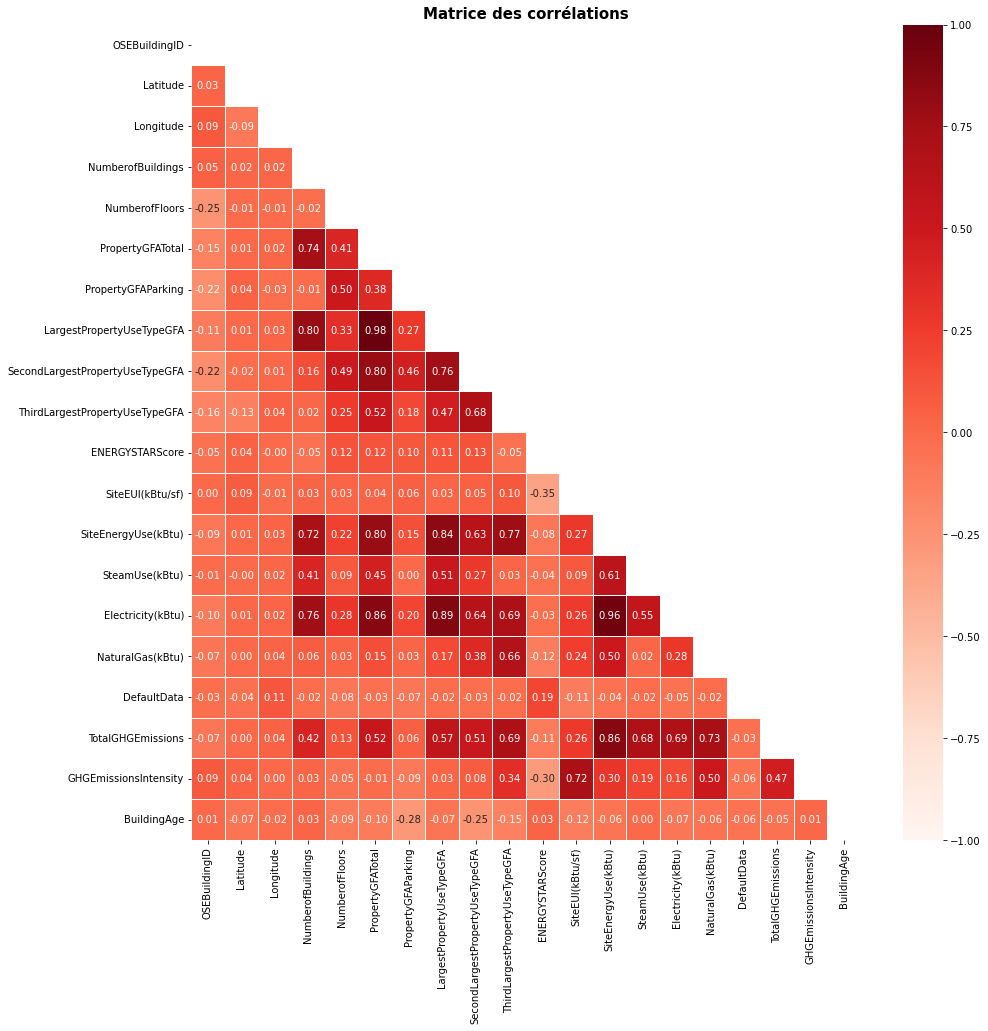

In [737]:
plt.figure(figsize=(15, 15))
correlation_matrix(energie)

- On voit bien que les variables à prédire SiteEnergyUse(kBtu) et TotalGHGEmissions sont très corrélés avec les données d'energie
- On remarque aussi des corrélations linéaires très fortes avec le nombre de bâtiments, ainsi que les surfaces au sol.

Vérification des autres nan

In [219]:
missing_values(energie)

Variable   nan    %nan
16   ThirdLargestPropertyUseTypeGFA  1296   78.7%
15      ThirdLargestPropertyUseType  1296   78.7%
13     SecondLargestPropertyUseType   799   48.5%
14  SecondLargestPropertyUseTypeGFA   799   48.5%
17                  ENERGYSTARScore   565   34.3%
25                          Outlier  1647  100.0%
11           LargestPropertyUseType     4    0.2%
12        LargestPropertyUseTypeGFA     4    0.2%
18                 SiteEUI(kBtu/sf)     1    0.1%
24                 ComplianceStatus     0    0.0%
23                      DefaultData     0    0.0%
22                 NaturalGas(kBtu)     0    0.0%
20                   SteamUse(kBtu)     0    0.0%
19              SiteEnergyUse(kBtu)     0    0.0%
26                TotalGHGEmissions     0    0.0%
27            GHGEmissionsIntensity     0    0.0%
21                Electricity(kBtu)     0    0.0%
0                     OSEBuildingID     0    0.0%
1                      BuildingType     0    0.0%
10        ListOfAllPropertyUseTypes     0    0.0%
9                PropertyGFAParking     0    0.0%
8                  PropertyGFATotal     0    0.0%
7                    NumberofFloors     0    0.0%
6                 NumberofBuildings     0    0.0%
5                         Longitude     0    0.0%
4                          Latitude     0    0.0%
3                      Neighborhood     0    0.0%
2               PrimaryPropertyType     0    0.0%
28                      BuildingAge     0    0.0%

In [740]:
energie[["ListOfAllPropertyUseTypes","LargestPropertyUseTypeGFA","SecondLargestPropertyUseTypeGFA","ThirdLargestPropertyUseTypeGFA"]]

ListOfAllPropertyUseTypes  \
0                                                                                            Hotel   
1                                                                       Hotel, Parking, Restaurant   
2                                                                                            Hotel   
3                                                                                            Hotel   
4                                                                    Hotel, Parking, Swimming Pool   
...                                                                                            ...   
3371                                                                                        Office   
3372                                                                            Other - Recreation   
3373                             Fitness Center/Health Club/Gym, Other - Recreation, Swimming Pool   
3374  Fitness Center/Health Club/Gym, Food Service, Office, Other - Recreation, Pre-school/Daycare   
3375  Fitness Center/Health Club/Gym, Food Service, Office, Other - Recreation, Pre-school/Daycare   

      LargestPropertyUseTypeGFA  SecondLargestPropertyUseTypeGFA  \
0                  88434.000000                              NaN   
1                  83880.000000                     15064.000000   
2                 756493.000000                              NaN   
3                  61320.000000                              NaN   
4                 123445.000000                     68009.000000   
...                         ...                              ...   
3371               12294.000000                              NaN   
3372               16000.000000                              NaN   
3373                7583.000000                      5574.000000   
3374                6601.000000                      6501.000000   
3375                8271.000000                      8000.000000   

      ThirdLargestPropertyUseTypeGFA  
0                                NaN  
1                        4622.000000  
2                                NaN  
3                                NaN  
4                           0.000000  
...                              ...  
3371                             NaN  
3372                             NaN  
3373                        0.000000  
3374                      484.000000  
3375                     1108.000000  

[1662 rows x 4 columns]

### Gestion des valeurs manquantes : <a class="anchor" id="nan"></a>

- Je remplis les nan des colonnes par 0 en considérant que les bâtiments dont les valeurs sont manquantes pour ces variables ne possèdent pas de deuxième et troisième utilisation ,je remplace les valeurs manquantes de surface par 0.

In [32]:
energie.head(10)

OSEBuildingID        BuildingType PrimaryPropertyType Neighborhood  \
0               1      NonResidential               Hotel     DOWNTOWN   
1               2      NonResidential               Hotel     DOWNTOWN   
2               3      NonResidential               Hotel     DOWNTOWN   
3               5      NonResidential               Hotel     DOWNTOWN   
4               8      NonResidential               Hotel     DOWNTOWN   
5               9  Nonresidential COS               Other     DOWNTOWN   
6              10      NonResidential               Hotel     DOWNTOWN   
7              11      NonResidential               Other     DOWNTOWN   
8              12      NonResidential               Hotel     DOWNTOWN   
10             15      NonResidential               Hotel     DOWNTOWN   

    Latitude   Longitude  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
0  47.612200 -122.337990           1.000000              12             88434   
1  47.613170 -122.333930           1.000000              11            103566   
2  47.613930 -122.338100           1.000000              41            956110   
3  47.614120 -122.336640           1.000000              10             61320   
4  47.613750 -122.340470           1.000000              18            175580   
5  47.616230 -122.336570           1.000000               2             97288   
6  47.613900 -122.332830           1.000000              11             83008   
7  47.613270 -122.331360           1.000000               8            102761   
8  47.602940 -122.332630           1.000000              15            163984   
10 47.606950 -122.334140           1.000000              11            153163   

    PropertyGFAParking  PropertyGFABuilding(s)  \
0                    0                   88434   
1                15064                   88502   
2               196718                  759392   
3                    0                   61320   
4                62000                  113580   
5                37198                   60090   
6                    0                   83008   
7                    0                  102761   
8                    0                  163984   
10               19279                  133884   

                ListOfAllPropertyUseTypes  \
0                                   Hotel   
1              Hotel, Parking, Restaurant   
2                                   Hotel   
3                                   Hotel   
4           Hotel, Parking, Swimming Pool   
5                          Police Station   
6                                   Hotel   
7   Other - Entertainment/Public Assembly   
8                                   Hotel   
10                                  Hotel   

                   LargestPropertyUseType  LargestPropertyUseTypeGFA  \
0                                   Hotel               88434.000000   
1                                   Hotel               83880.000000   
2                                   Hotel              756493.000000   
3                                   Hotel               61320.000000   
4                                   Hotel              123445.000000   
5                          Police Station               88830.000000   
6                                   Hotel               81352.000000   
7   Other - Entertainment/Public Assembly              102761.000000   
8                                   Hotel              163984.000000   
10                                  Hotel              133884.000000   

   SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
0                           NaN                              NaN   
1                       Parking                     15064.000000   
2                           NaN                              NaN   
3                           NaN                              NaN   
4                       Parking                     68009.000000   
5                           NaN                  

In [28]:
nan_to_zero = ['ThirdLargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA','LargestPropertyUseTypeGFA']
energie[nan_to_zero] = energie[nan_to_zero].fillna(0)

In [35]:
missing_values(energie)

Variable   nan    %nan
16      ThirdLargestPropertyUseType  1296   78.7%
14     SecondLargestPropertyUseType   799   48.5%
18                  ENERGYSTARScore   565   34.3%
27                          Outlier  1647  100.0%
12           LargestPropertyUseType     4    0.2%
19                 SiteEUI(kBtu/sf)     1    0.1%
22                   SteamUse(kBtu)     0    0.0%
20               SourceEUI(kBtu/sf)     0    0.0%
21              SiteEnergyUse(kBtu)     0    0.0%
0                     OSEBuildingID     0    0.0%
17   ThirdLargestPropertyUseTypeGFA     0    0.0%
24                 NaturalGas(kBtu)     0    0.0%
25                      DefaultData     0    0.0%
26                 ComplianceStatus     0    0.0%
28                TotalGHGEmissions     0    0.0%
29            GHGEmissionsIntensity     0    0.0%
23                Electricity(kBtu)     0    0.0%
15  SecondLargestPropertyUseTypeGFA     0    0.0%
1                      BuildingType     0    0.0%
13        LargestPropertyUseTypeGFA     0    0.0%
11        ListOfAllPropertyUseTypes     0    0.0%
10           PropertyGFABuilding(s)     0    0.0%
9                PropertyGFAParking     0    0.0%
8                  PropertyGFATotal     0    0.0%
7                    NumberofFloors     0    0.0%
6                 NumberofBuildings     0    0.0%
5                         Longitude     0    0.0%
4                          Latitude     0    0.0%
3                      Neighborhood     0    0.0%
2               PrimaryPropertyType     0    0.0%
30                      BuildingAge     0    0.0%

- Vérification des variables : LargestPropertyUseType,SecondLargestPropertyUseType,ThirdLargestPropertyUseType
- Je fais de même pour les types d'espaces

In [743]:
energie[["ListOfAllPropertyUseTypes","LargestPropertyUseType","SecondLargestPropertyUseType","ThirdLargestPropertyUseType"]]

ListOfAllPropertyUseTypes  \
0                                                                                            Hotel   
1                                                                       Hotel, Parking, Restaurant   
2                                                                                            Hotel   
3                                                                                            Hotel   
4                                                                    Hotel, Parking, Swimming Pool   
...                                                                                            ...   
3371                                                                                        Office   
3372                                                                            Other - Recreation   
3373                             Fitness Center/Health Club/Gym, Other - Recreation, Swimming Pool   
3374  Fitness Center/Health Club/Gym, Food Service, Office, Other - Recreation, Pre-school/Daycare   
3375  Fitness Center/Health Club/Gym, Food Service, Office, Other - Recreation, Pre-school/Daycare   

     LargestPropertyUseType    SecondLargestPropertyUseType  \
0                     Hotel                             NaN   
1                     Hotel                         Parking   
2                     Hotel                             NaN   
3                     Hotel                             NaN   
4                     Hotel                         Parking   
...                     ...                             ...   
3371                 Office                             NaN   
3372     Other - Recreation                             NaN   
3373     Other - Recreation  Fitness Center/Health Club/Gym   
3374     Other - Recreation  Fitness Center/Health Club/Gym   
3375     Other - Recreation  Fitness Center/Health Club/Gym   

     ThirdLargestPropertyUseType  
0                            NaN  
1                     Restaurant  
2                            NaN  
3                            NaN  
4                  Swimming Pool  
...                          ...  
3371                         NaN  
3372                         NaN  
3373               Swimming Pool  
3374          Pre-school/Daycare  
3375          Pre-school/Daycare  

[1662 rows x 4 columns]

In [29]:
#Je remplis les nan des colonnes par non renseinge
nan_to_noinfo = ['ThirdLargestPropertyUseType', 'SecondLargestPropertyUseType','LargestPropertyUseType']
energie[nan_to_noinfo] = energie[nan_to_noinfo].fillna('Non')

In [38]:
missing_values(energie)

Variable   nan    %nan
18                  ENERGYSTARScore   565   34.3%
27                          Outlier  1647  100.0%
19                 SiteEUI(kBtu/sf)     1    0.1%
0                     OSEBuildingID     0    0.0%
16      ThirdLargestPropertyUseType     0    0.0%
29            GHGEmissionsIntensity     0    0.0%
28                TotalGHGEmissions     0    0.0%
26                 ComplianceStatus     0    0.0%
25                      DefaultData     0    0.0%
24                 NaturalGas(kBtu)     0    0.0%
23                Electricity(kBtu)     0    0.0%
22                   SteamUse(kBtu)     0    0.0%
21              SiteEnergyUse(kBtu)     0    0.0%
20               SourceEUI(kBtu/sf)     0    0.0%
17   ThirdLargestPropertyUseTypeGFA     0    0.0%
15  SecondLargestPropertyUseTypeGFA     0    0.0%
1                      BuildingType     0    0.0%
14     SecondLargestPropertyUseType     0    0.0%
13        LargestPropertyUseTypeGFA     0    0.0%
12           LargestPropertyUseType     0    0.0%
11        ListOfAllPropertyUseTypes     0    0.0%
10           PropertyGFABuilding(s)     0    0.0%
9                PropertyGFAParking     0    0.0%
8                  PropertyGFATotal     0    0.0%
7                    NumberofFloors     0    0.0%
6                 NumberofBuildings     0    0.0%
5                         Longitude     0    0.0%
4                          Latitude     0    0.0%
3                      Neighborhood     0    0.0%
2               PrimaryPropertyType     0    0.0%
30                      BuildingAge     0    0.0%

- Je vérifie les varibles de consommations d'energie

- Vérification des lignes à 0 pour la consommation : electricité,gaz et vapeur et par conséquent la consommation d'energie est à 0

In [36]:
energie[(energie["SteamUse(kBtu)"] == 0) & (energie["Electricity(kBtu)"] ==0) & (energie["NaturalGas(kBtu)"] ==0)]

OSEBuildingID       BuildingType          PrimaryPropertyType  \
28               34  SPS-District K-12                  K-12 School   
152             242  SPS-District K-12                  K-12 School   
304             435     NonResidential                        Other   
513             700     NonResidential  Supermarket / Grocery Store   
746           19776     NonResidential                        Other   
1361          21616  SPS-District K-12                  K-12 School   

               Neighborhood  Latitude   Longitude  NumberofBuildings  \
28                  CENTRAL 47.622660 -122.305470           1.000000   
152                   NORTH 47.698230 -122.321260           1.000000   
304                DOWNTOWN 47.611950 -122.331670           1.000000   
513   MAGNOLIA / QUEEN ANNE 47.637180 -122.377340           1.000000   
746               NORTHWEST 47.727770 -122.345030           1.000000   
1361                  NORTH 47.723690 -122.306760           1.000000   

      NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
28                 1            126351                   0   
152                2             52792                   0   
304                6           1400000                   0   
513                1             57176                   0   
746                1             29924                   0   
1361               1             42292                   0   

      PropertyGFABuilding(s)  \
28                    126351   
152                    52792   
304                  1400000   
513                    57176   
746                    29924   
1361                   42292   

                                                                          ListOfAllPropertyUseTypes  \
28                                                                                      K-12 School   
152                                                                                     K-12 School   
304                                                                      Convention Center, Parking   
513   Personal Services (Health/Beauty, Dry Cleaning, etc), Retail Store, Supermarket/Grocery Store   
746                                                                               Other - Education   
1361                                                                                    K-12 School   

         LargestPropertyUseType  LargestPropertyUseTypeGFA  \
28                  K-12 School              126351.000000   
152                 K-12 School               55480.000000   
304           Convention Center             1072000.000000   
513   Supermarket/Grocery Store               39500.000000   
746           Other - Education               29924.000000   
1361                K-12 School               43188.000000   

     SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
28                            NaN                         0.000000   
152                           NaN                         0.000000   
304                       Parking                    686750.000000   
513                  Retail Store                     15000.000000   
746                           NaN                         0.000000   
1361                          NaN                         0.000000   

                               ThirdLargestPropertyUseType  \
28                                                     NaN   
152                                                    NaN   
304                                                    NaN   
513   Personal Services (Health/Beauty, Dry Cleaning, etc)   
746                                                    NaN   
1361                                                   NaN   

      ThirdLargestPropertyUseTypeGFA  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
28                          0.000000              NaN          0.000000   
152                         0.000000              NaN          0.000000   
304                         0.00000

In [30]:
# Je supprime les lignes à consommation 0
print(energie.shape[0],"avant suppression")
indexNames = energie[(energie["SteamUse(kBtu)"] == 0) & (energie["Electricity(kBtu)"] ==0) & (energie["NaturalGas(kBtu)"] ==0)].index
# Delete these row indexes from dataFrame
energie.drop(indexNames , inplace=True)
print(energie.shape[0],"après suppression")


1647 avant suppression
1641 après suppression


- Je remarque que la consommation de chaque source d'énergie n'est pas égale à la consommation totale d'energie
Ces batiments ont la consommation d'energie annuelle à 0 alors qu'ils ont des consommations et émissions co2, 

- Il reste des nan pour ENERGYSTARScore

- Je peux supprimer la colonne outlier

In [31]:
# Je supprime la colonne
print(energie.shape[1],"colonnes avant suppression")
energie.drop(["Outlier"], axis = 1, inplace = True)
print(energie.shape[1],"colonnes restantes")

29 colonnes avant suppression
28 colonnes restantes


In [41]:
missing_values(energie)

Variable  nan   %nan
18                  ENERGYSTARScore  561  34.2%
0                     OSEBuildingID    0   0.0%
1                      BuildingType    0   0.0%
28            GHGEmissionsIntensity    0   0.0%
27                TotalGHGEmissions    0   0.0%
26                 ComplianceStatus    0   0.0%
25                      DefaultData    0   0.0%
24                 NaturalGas(kBtu)    0   0.0%
23                Electricity(kBtu)    0   0.0%
22                   SteamUse(kBtu)    0   0.0%
21              SiteEnergyUse(kBtu)    0   0.0%
20               SourceEUI(kBtu/sf)    0   0.0%
19                 SiteEUI(kBtu/sf)    0   0.0%
17   ThirdLargestPropertyUseTypeGFA    0   0.0%
16      ThirdLargestPropertyUseType    0   0.0%
15  SecondLargestPropertyUseTypeGFA    0   0.0%
14     SecondLargestPropertyUseType    0   0.0%
13        LargestPropertyUseTypeGFA    0   0.0%
12           LargestPropertyUseType    0   0.0%
11        ListOfAllPropertyUseTypes    0   0.0%
10           PropertyGFABuilding(s)    0   0.0%
9                PropertyGFAParking    0   0.0%
8                  PropertyGFATotal    0   0.0%
7                    NumberofFloors    0   0.0%
6                 NumberofBuildings    0   0.0%
5                         Longitude    0   0.0%
4                          Latitude    0   0.0%
3                      Neighborhood    0   0.0%
2               PrimaryPropertyType    0   0.0%
29                      BuildingAge    0   0.0%

### Analyse exploratoire : <a class="anchor" id="exp"></a>

- Les variables à prédire : SiteEnergyUse(kBtu) et TotalGHGEmissions

- Je regroupe les variables en :
- ( à prédire)  
- catégorielles
- numériques

In [32]:
# Variables prédictives
pred_columns = ["SiteEnergyUse(kBtu)","TotalGHGEmissions"]
# Variables catégorielles
cat_attribs = list(energie.select_dtypes(include='object').columns)
# Variables numériques
num_attribs = list(energie.drop(columns=cat_attribs + pred_columns+ ["DefaultData"]).columns)

In [198]:
cat_attribs

['BuildingType',
 'PrimaryPropertyType',
 'Neighborhood',
 'ListOfAllPropertyUseTypes',
 'LargestPropertyUseType',
 'SecondLargestPropertyUseType',
 'ThirdLargestPropertyUseType',
 'ComplianceStatus']

In [199]:
num_attribs

['OSEBuildingID',
 'Latitude',
 'Longitude',
 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'PropertyGFAParking',
 'LargestPropertyUseTypeGFA',
 'SecondLargestPropertyUseTypeGFA',
 'ThirdLargestPropertyUseTypeGFA',
 'ENERGYSTARScore',
 'SiteEUI(kBtu/sf)',
 'SteamUse(kBtu)',
 'Electricity(kBtu)',
 'NaturalGas(kBtu)',
 'GHGEmissionsIntensity',
 'BuildingAge']

### Visulaisations des distributions données : <a class="anchor" id="bo"></a>

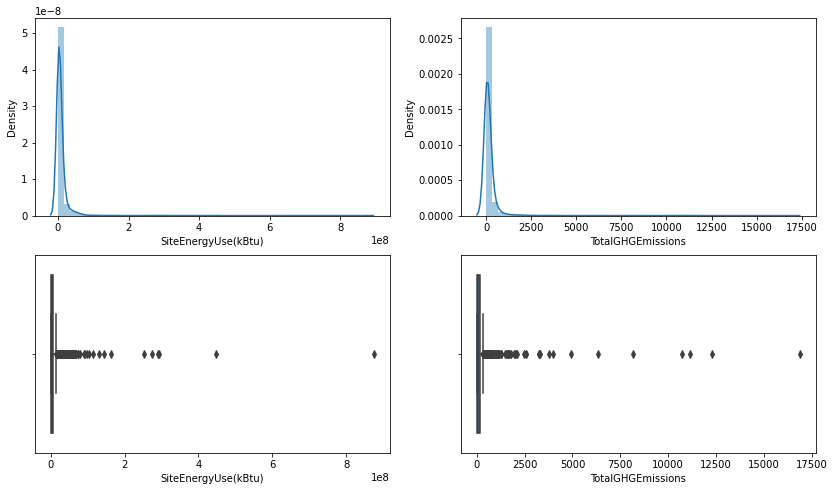

In [200]:
# Distribution des variables à prédire
fig = plt.figure(1, figsize=(14, 8))
for i,label in enumerate(pred_columns) :
    plt.subplot(2,2,i+1)
    sns.distplot(energie[label])
    plt.subplot(2,2,i+3)
    sns.boxplot(energie[label])
plt.show()

- Des bâtiments à grande consommation énergétique et fortes émissions CO2, rendent la distribution asymétrique (right-skewed data)

- Des outliers observés

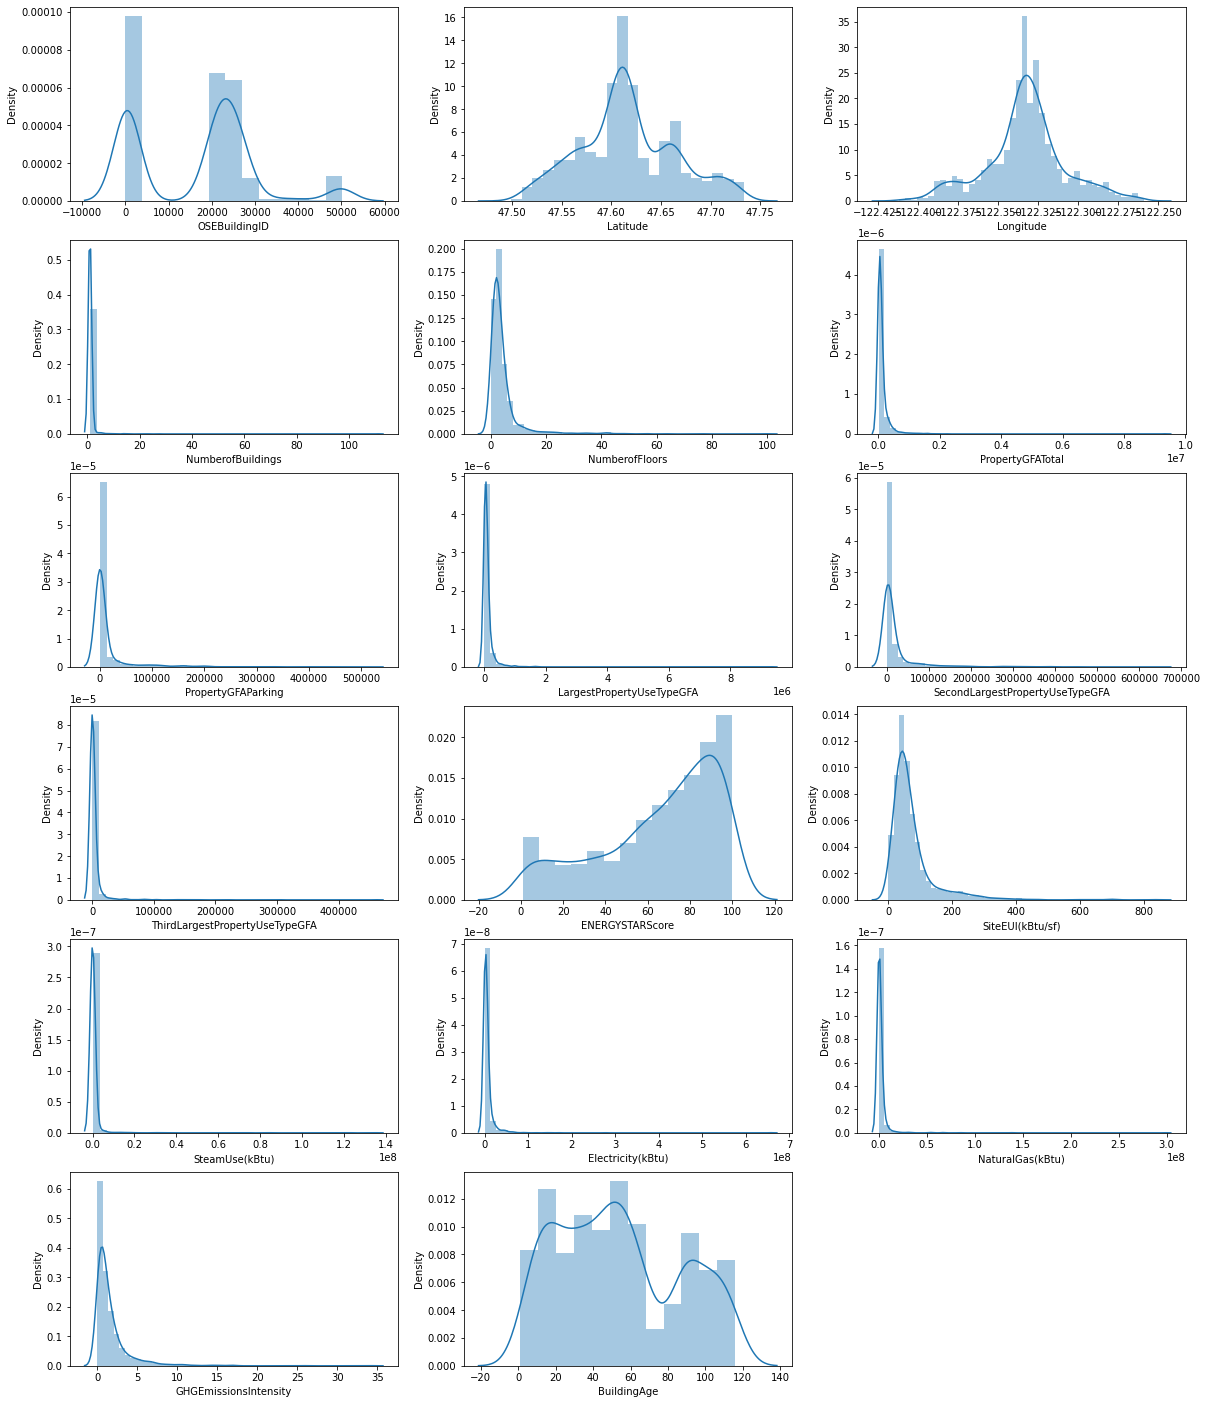

In [201]:
fig = plt.figure(1, figsize=(20, 25))
for i, label in enumerate(num_attribs) :
    plt.subplot(6,3, i+1)
    sns.distplot(energie[label])
    
plt.show()

- Je vérifie par un test de normalité j'utilise le Test de normalité Kolmogorov Smirnov :
- Pour tester la normalité des résidus où : H0 : Les résidus suivent une loi normale si p-value > 5% H1 : Les résidus ne suivent pas une loi normale si p-value < 5%

In [204]:
alpha=0.05
for col in energie.select_dtypes('float','int'):
    print([col])
    a,b= stats.kstest( energie[[col]],'norm' )
    print("statistics",a,"p-value",b)
    if b < alpha:
        print("H0 rejetée")
    else:
        print("H0 non rejetée")

['Latitude']
statistics 1.0 p-value 0.0
H0 rejetée
['Longitude']
statistics 1.0 p-value 0.0
H0 rejetée
['NumberofBuildings']
statistics 1.0 p-value 0.0
H0 rejetée
['LargestPropertyUseTypeGFA']
statistics 1.0 p-value 0.0
H0 rejetée
['SecondLargestPropertyUseTypeGFA']
statistics 1.0 p-value 0.0
H0 rejetée
['ThirdLargestPropertyUseTypeGFA']
statistics 1.0 p-value 0.0
H0 rejetée
['ENERGYSTARScore']
statistics nan p-value nan
H0 non rejetée
['SiteEUI(kBtu/sf)']
statistics 1.0 p-value 0.0
H0 rejetée
['SiteEnergyUse(kBtu)']
statistics 1.0 p-value 0.0
H0 rejetée
['SteamUse(kBtu)']
statistics 1.0 p-value 0.0
H0 rejetée
['Electricity(kBtu)']
statistics 1.0 p-value 0.0
H0 rejetée
['NaturalGas(kBtu)']
statistics 1.0 p-value 0.0
H0 rejetée
['TotalGHGEmissions']
statistics 1.0 p-value 0.0
H0 rejetée
['GHGEmissionsIntensity']
statistics 1.0 p-value 0.0
H0 rejetée


- La p-value < 5% : on rejette donc l'hypothèse de normalité des distributions de ces variables.

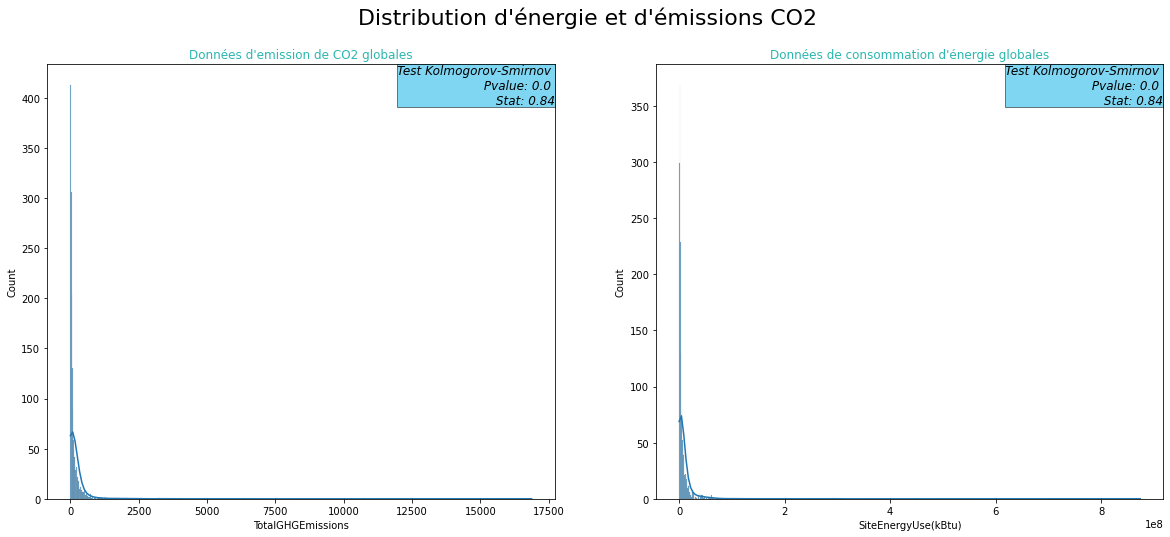

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,8))
left, width = 0, 1
bottom, height = 0, 1
right = left + width
top = bottom + height
sns.histplot(data=energie, x="TotalGHGEmissions", kde=True, ax=axes[0], alpha=0.6)
axes[0].set_title("Données d'emission de CO2 globales", color='#2cb7b0')

#Test de Kolmogorov-Smirnov
kstest = stats.kstest(energie['TotalGHGEmissions'].notnull(),'norm')
axes[0].text(right, top, 'Test Kolmogorov-Smirnov \n Pvalue: {:.2} \n Stat: {:.2}'.format(kstest.pvalue, kstest.statistic),
            horizontalalignment='right',
            verticalalignment='top',
            style='italic', transform=axes[0].transAxes, fontsize = 12,
            bbox={'facecolor':'#00afe6', 'alpha':0.5, 'pad':0})


sns.histplot(data=energie, x="SiteEnergyUse(kBtu)", kde=True, ax=axes[1], alpha=0.6)
axes[1].set_title("Données de consommation d'énergie globales", color='#2cb7b0')

#Test de Kolmogorov-Smirnov
kstest = stats.kstest(energie['SiteEnergyUse(kBtu)'].notnull(),'norm')
axes[1].text(right, top, 'Test Kolmogorov-Smirnov \n Pvalue: {:.2} \n Stat: {:.2}'.format(kstest.pvalue, kstest.statistic),
            horizontalalignment='right',
            verticalalignment='top',
            style='italic', transform=axes[1].transAxes, fontsize = 12,
            bbox={'facecolor':'#00afe6', 'alpha':0.5, 'pad':0})

plt.suptitle("Distribution d'énergie et d'émissions CO2", fontsize=22)
plt.show()

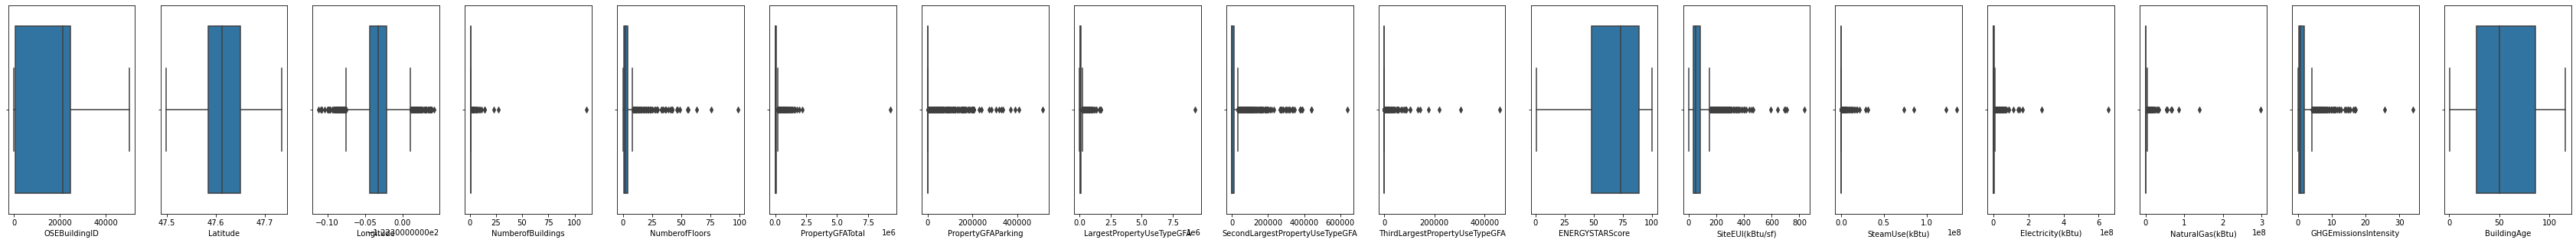

In [202]:
fig = plt.figure(1, figsize=(60, 5))

for i,label in enumerate(num_attribs) :
    plt.subplot(1,len(num_attribs), i+1)
    sns.boxplot(energie[label], orient="v")
plt.show()

- Variables cibles :  énergie et CO2 avec transformation logarithmique : 
Les transformations de données consistent donc en des manipulations permettant de révéler certaines caractéristiques des données originales qui ne peuvent pas ou pas facilement être observées. On peut procéder à la transformation de la distribution d'une variable de nos données pour la rendre plus facilement observable ou encore pour qu'elle corresponde aux hypothèses des tests statistiques que nous voulons appliquer. Une technique très fréquente consistera à appliquer une fonction mathématique sur notre variable. Par exemple, on pourra utiliser, plutôt qu'une variable originale X, son logarithme ou encore sa racine carrée.

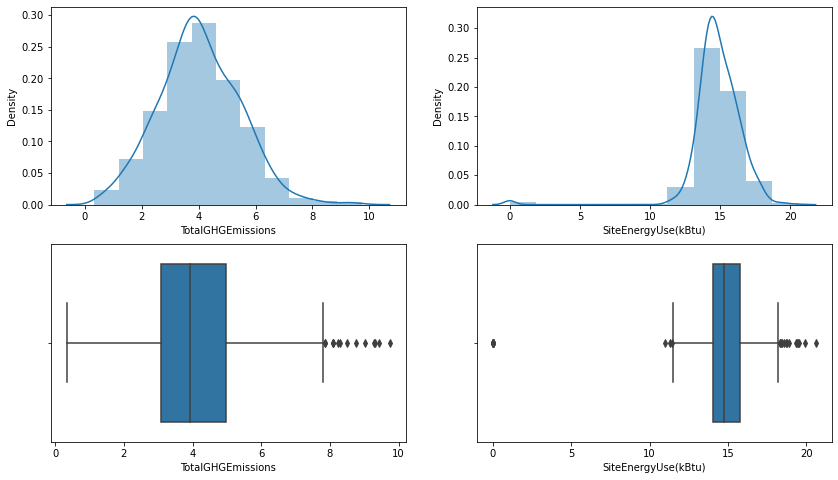

In [116]:
fig = plt.figure(1, figsize=(14, 8))
for i,label in enumerate(["TotalGHGEmissions", "SiteEnergyUse(kBtu)"]) :
    plt.subplot(2,2,i+1)
    sns.distplot(energie[label].apply(lambda x : np.log(1 + x)), bins=int(1 + np.log2(len(energie))))
    plt.subplot(2,2,i+3)
    sns.boxplot(energie[label].apply(lambda x : np.log(1 + x)))
plt.show()

- En passant les données à l'échelle logarithmique, nous obtenons une distribution normale des données à prédire.
- Présence d'outliers sur la borne suéprieure pour l variable émission co2
- Présence d'outliers sur la borne supérieur et inférieur pour la variable de consommation d'energie

 ### Analyse bivariée et multivariée: <a class="anchor" id="bm"></a>

- Visulaisation des variables à prédire : 

Text(0.5, 1.0, "Répartition des données de consommation d'énergie et émission de CO2")

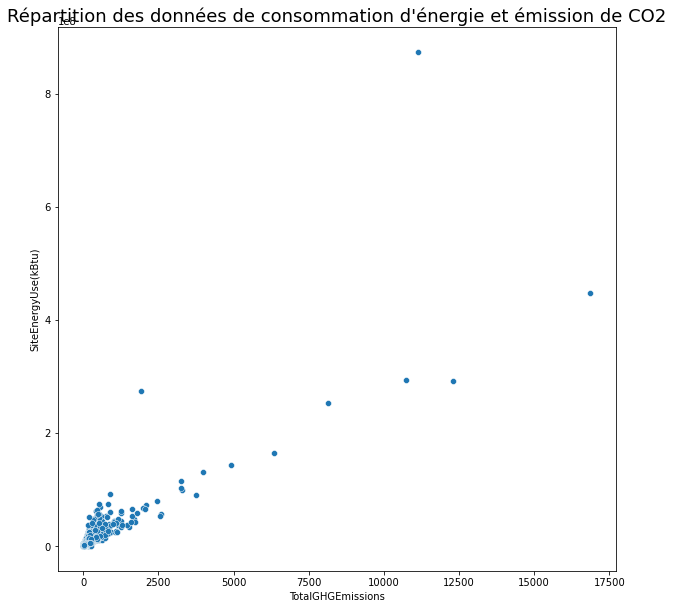

In [117]:
fig = plt.figure(1, figsize=(10,10))

sns.scatterplot(data=energie, x="TotalGHGEmissions", y="SiteEnergyUse(kBtu)")

plt.title("Répartition des données de consommation d'énergie et émission de CO2", fontsize=18)

- Une relation linéaire positive , avec l'augmentation de la consommation d'enrgie l'émission Co2 augmente
-  La relation ne suit pas seulement une seule droite 

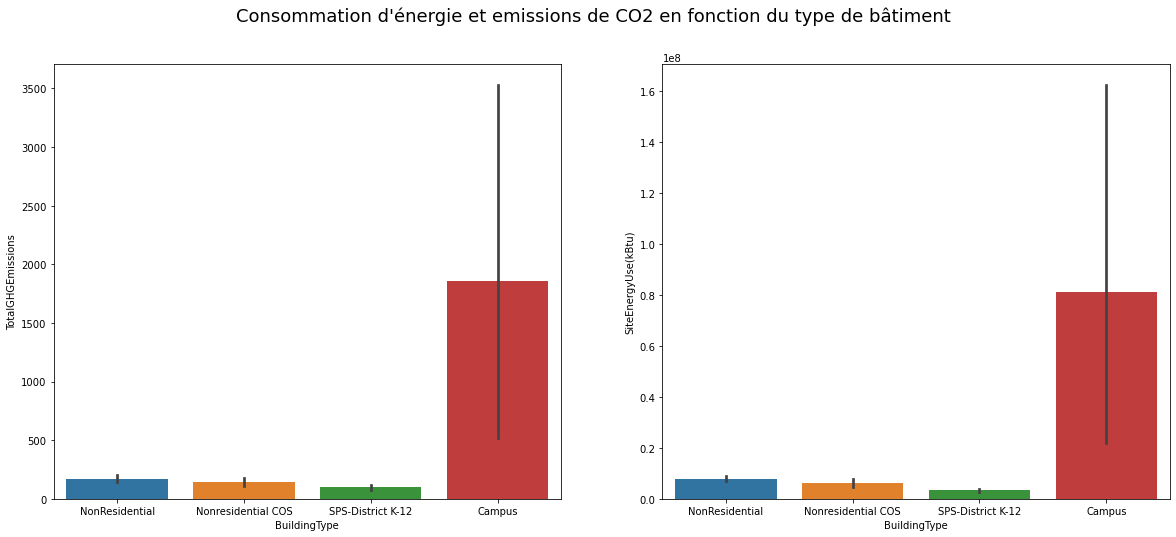

In [118]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,8))
sns.barplot(x='BuildingType',y='TotalGHGEmissions',data=energie, ax=axes[0])
sns.barplot(x='BuildingType',y='SiteEnergyUse(kBtu)',data=energie, ax=axes[1])
plt.suptitle("Consommation d'énergie et emissions de CO2 en fonction du type de bâtiment", fontsize=18)
plt.show()

- les campus sont largement élevés en terme de consommation et de rejets de CO2

In [218]:
obj_columns = list(energie.select_dtypes(include=['object', 'bool']).columns)
for cat in energie[obj_columns]:
    print(cat, " :", energie[cat].nunique())

BuildingType  : 4
PrimaryPropertyType  : 22
Neighborhood  : 14
ListOfAllPropertyUseTypes  : 367
LargestPropertyUseType  : 56
SecondLargestPropertyUseType  : 48
ThirdLargestPropertyUseType  : 39
DefaultData  : 2
ComplianceStatus  : 2


In [219]:
energie.PrimaryPropertyType.value_counts()

Small- and Mid-Sized Office    287
Other                          243
Warehouse                      185
Large Office                   169
K-12 School                    123
Mixed Use Property             112
Retail Store                    89
Hotel                           73
Worship Facility                69
Distribution Center             53
Supermarket / Grocery Store     39
Medical Office                  38
Self-Storage Facility           27
Residence Hall                  21
Senior Care Community           20
University                      20
Refrigerated Warehouse          12
Restaurant                      12
Laboratory                       9
Hospital                         4
Office                           3
Low-Rise Multifamily             2
Name: PrimaryPropertyType, dtype: int64

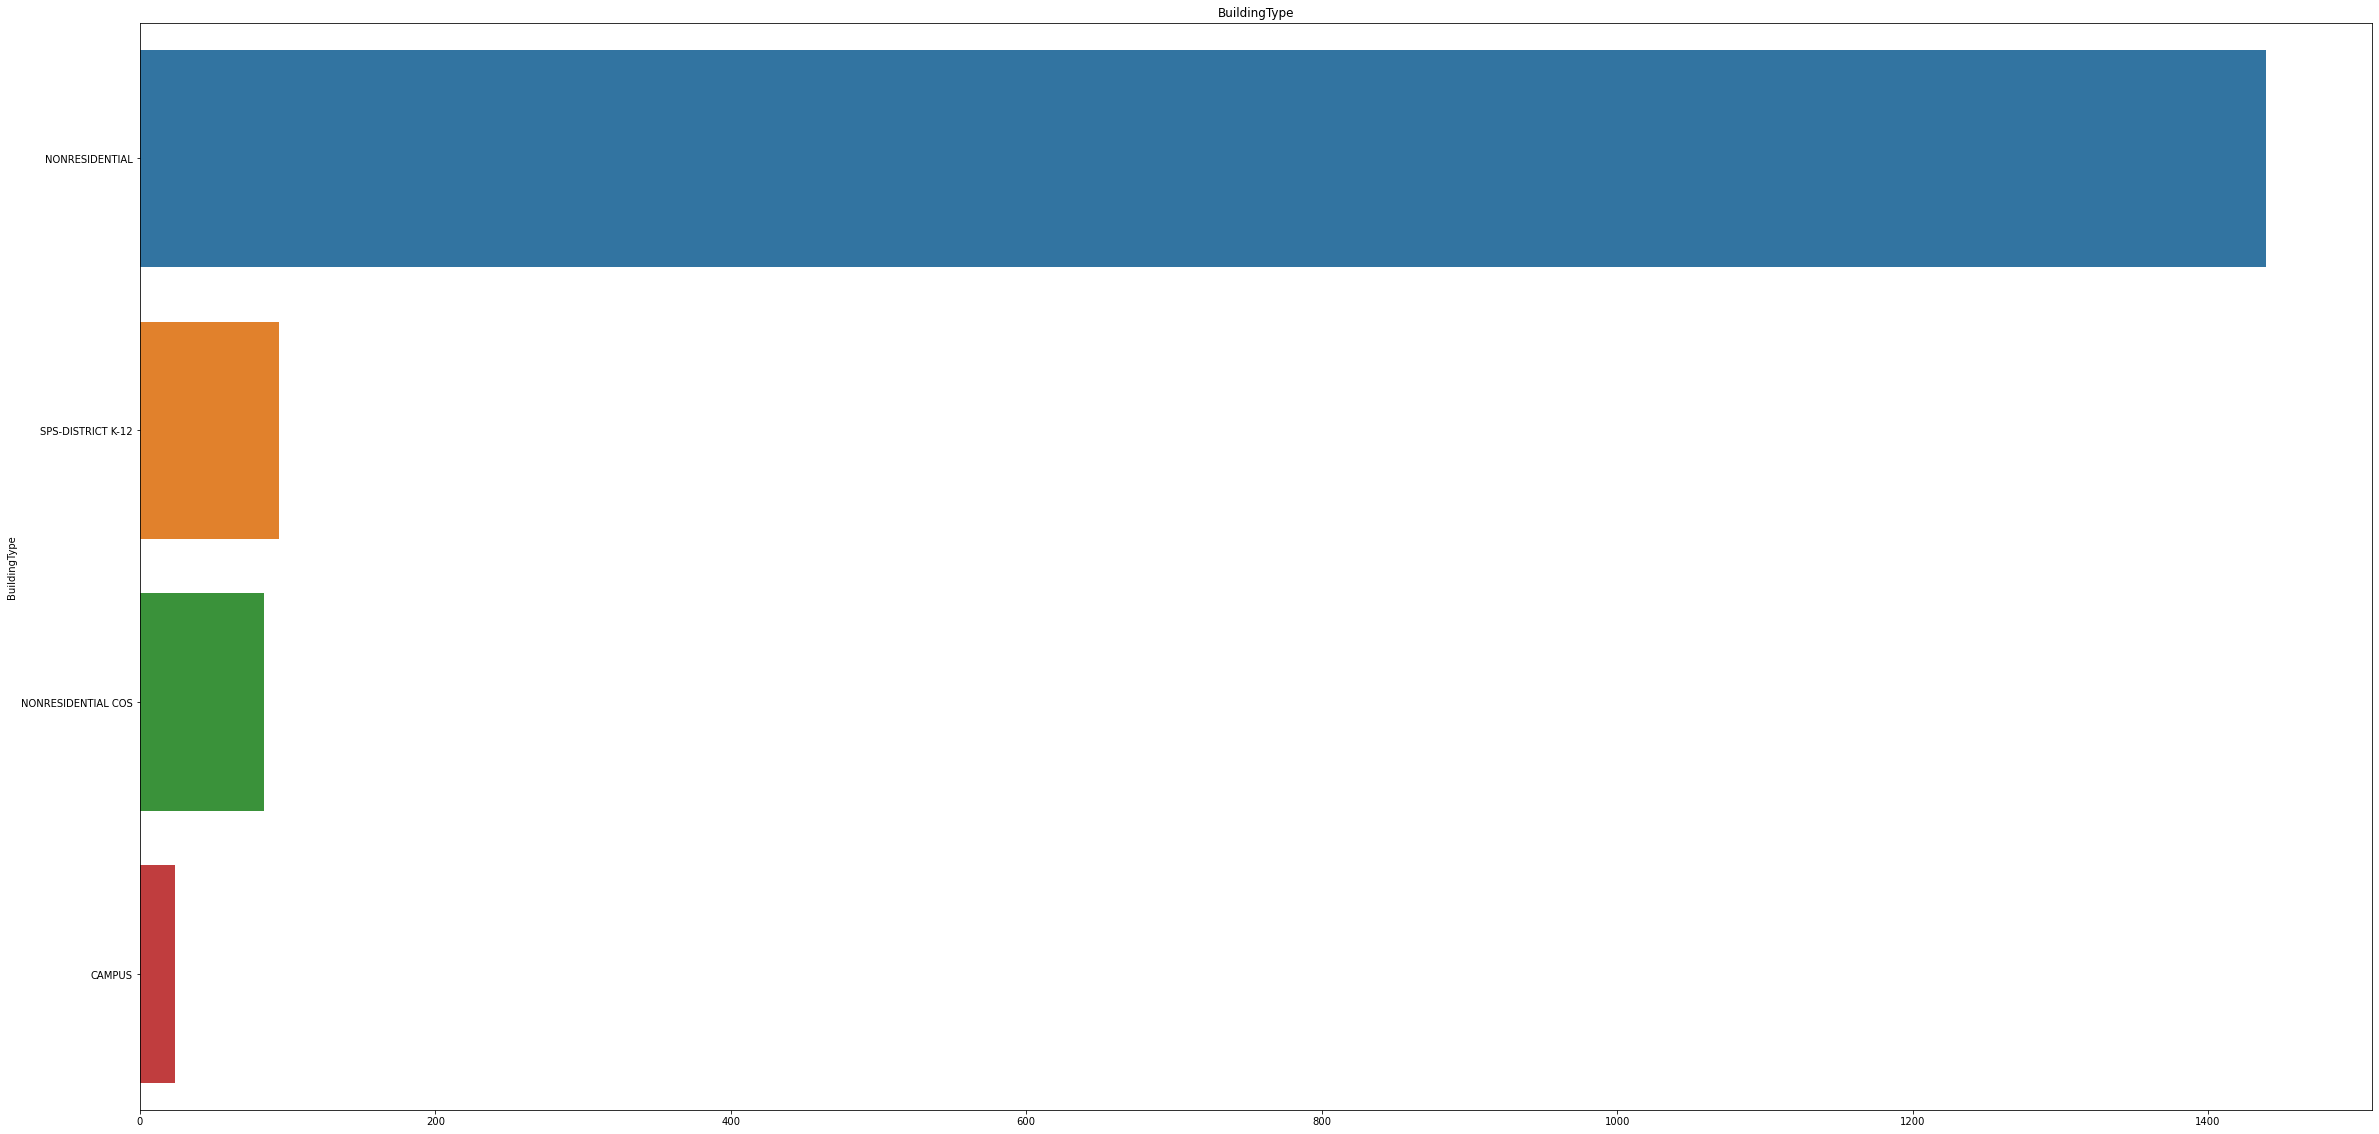

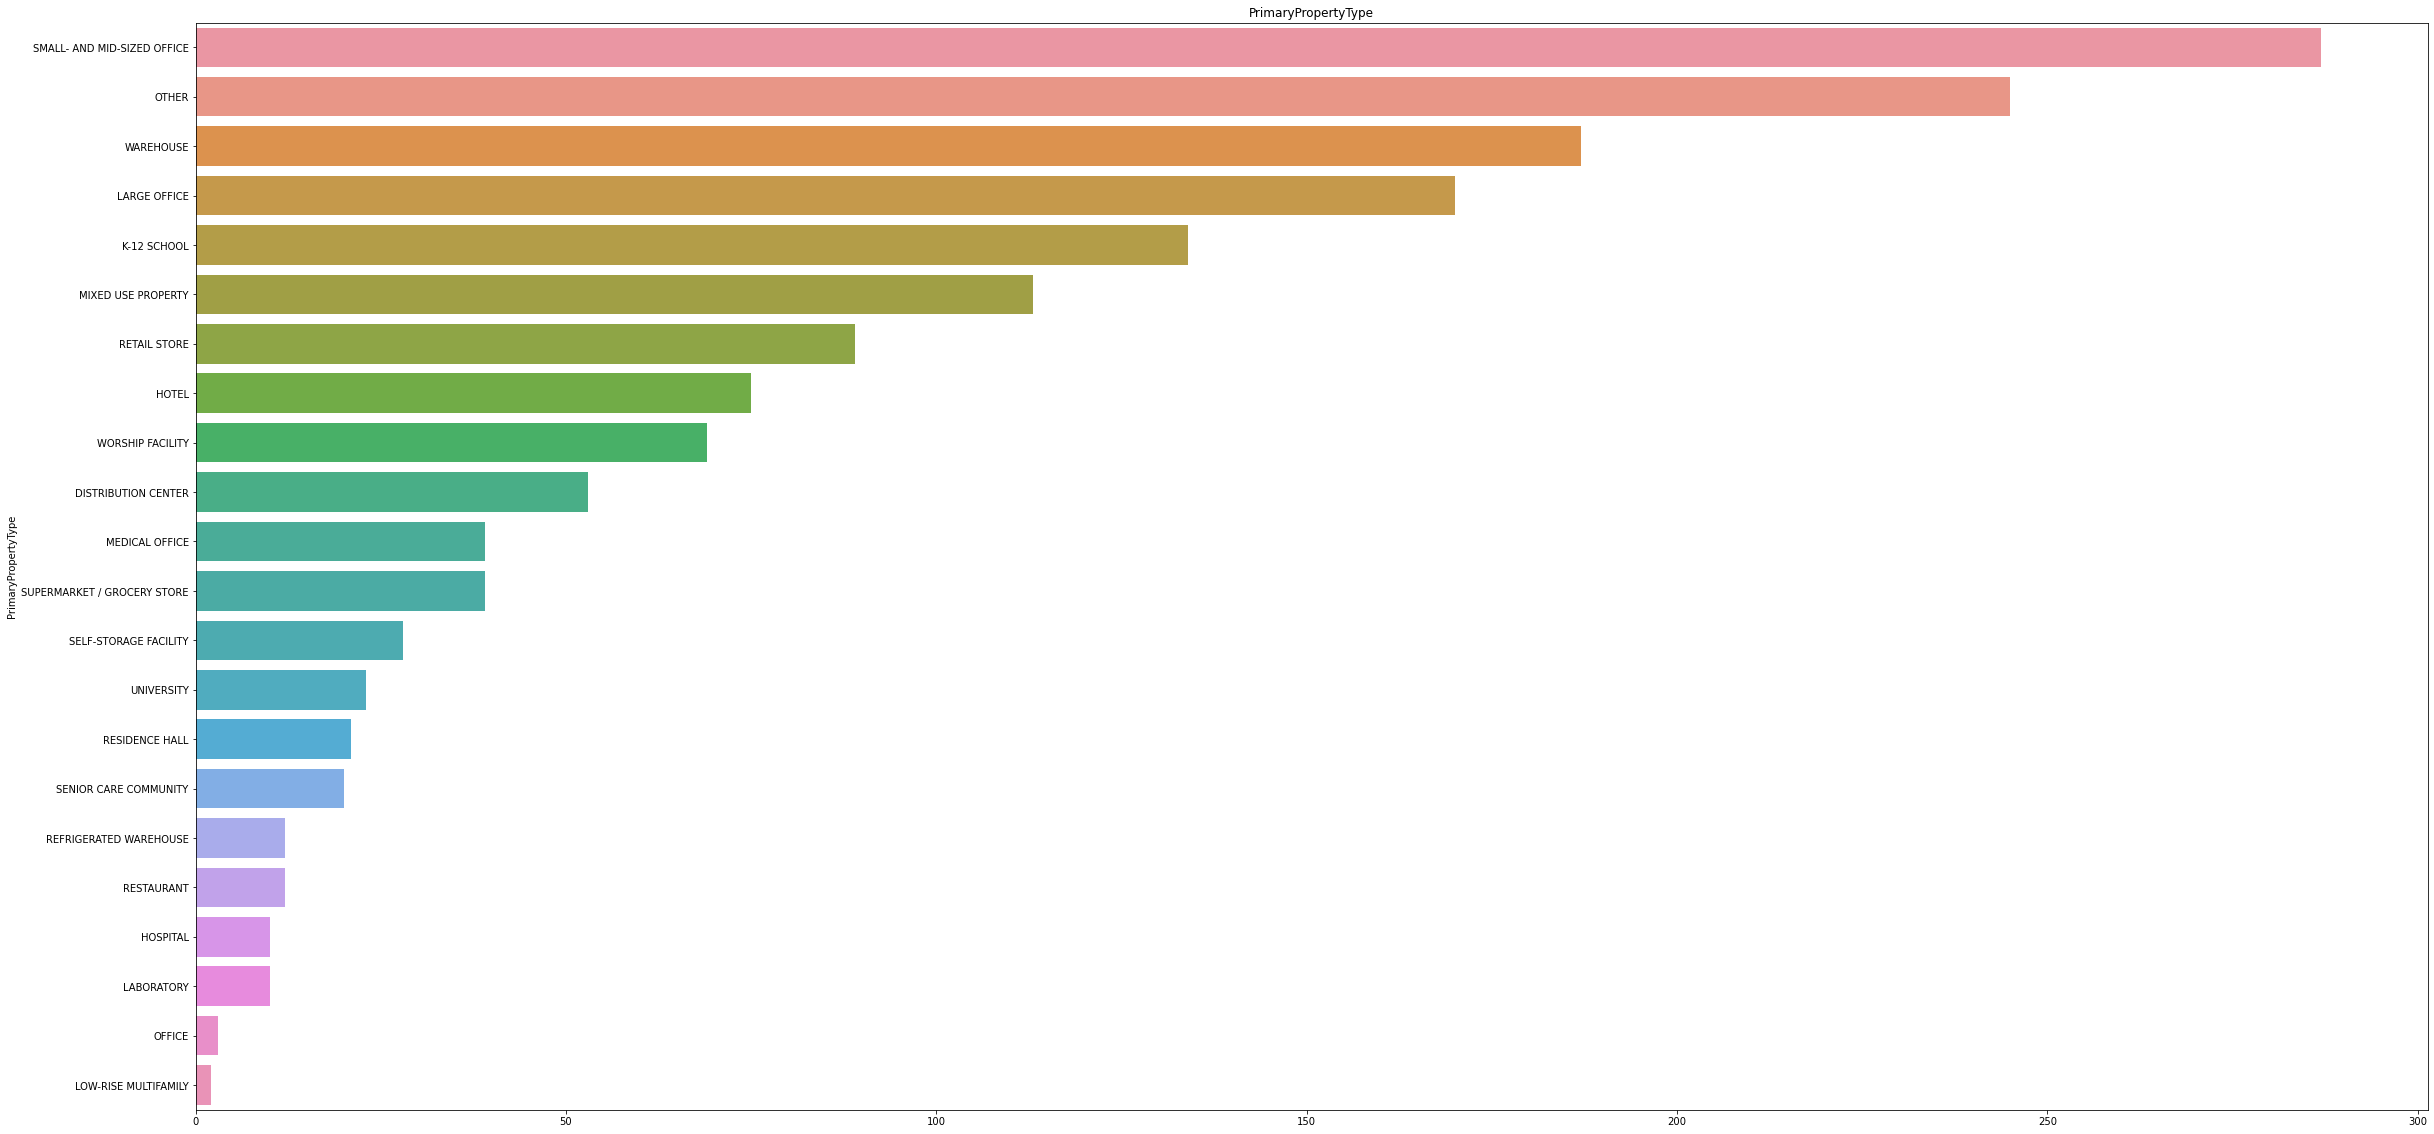

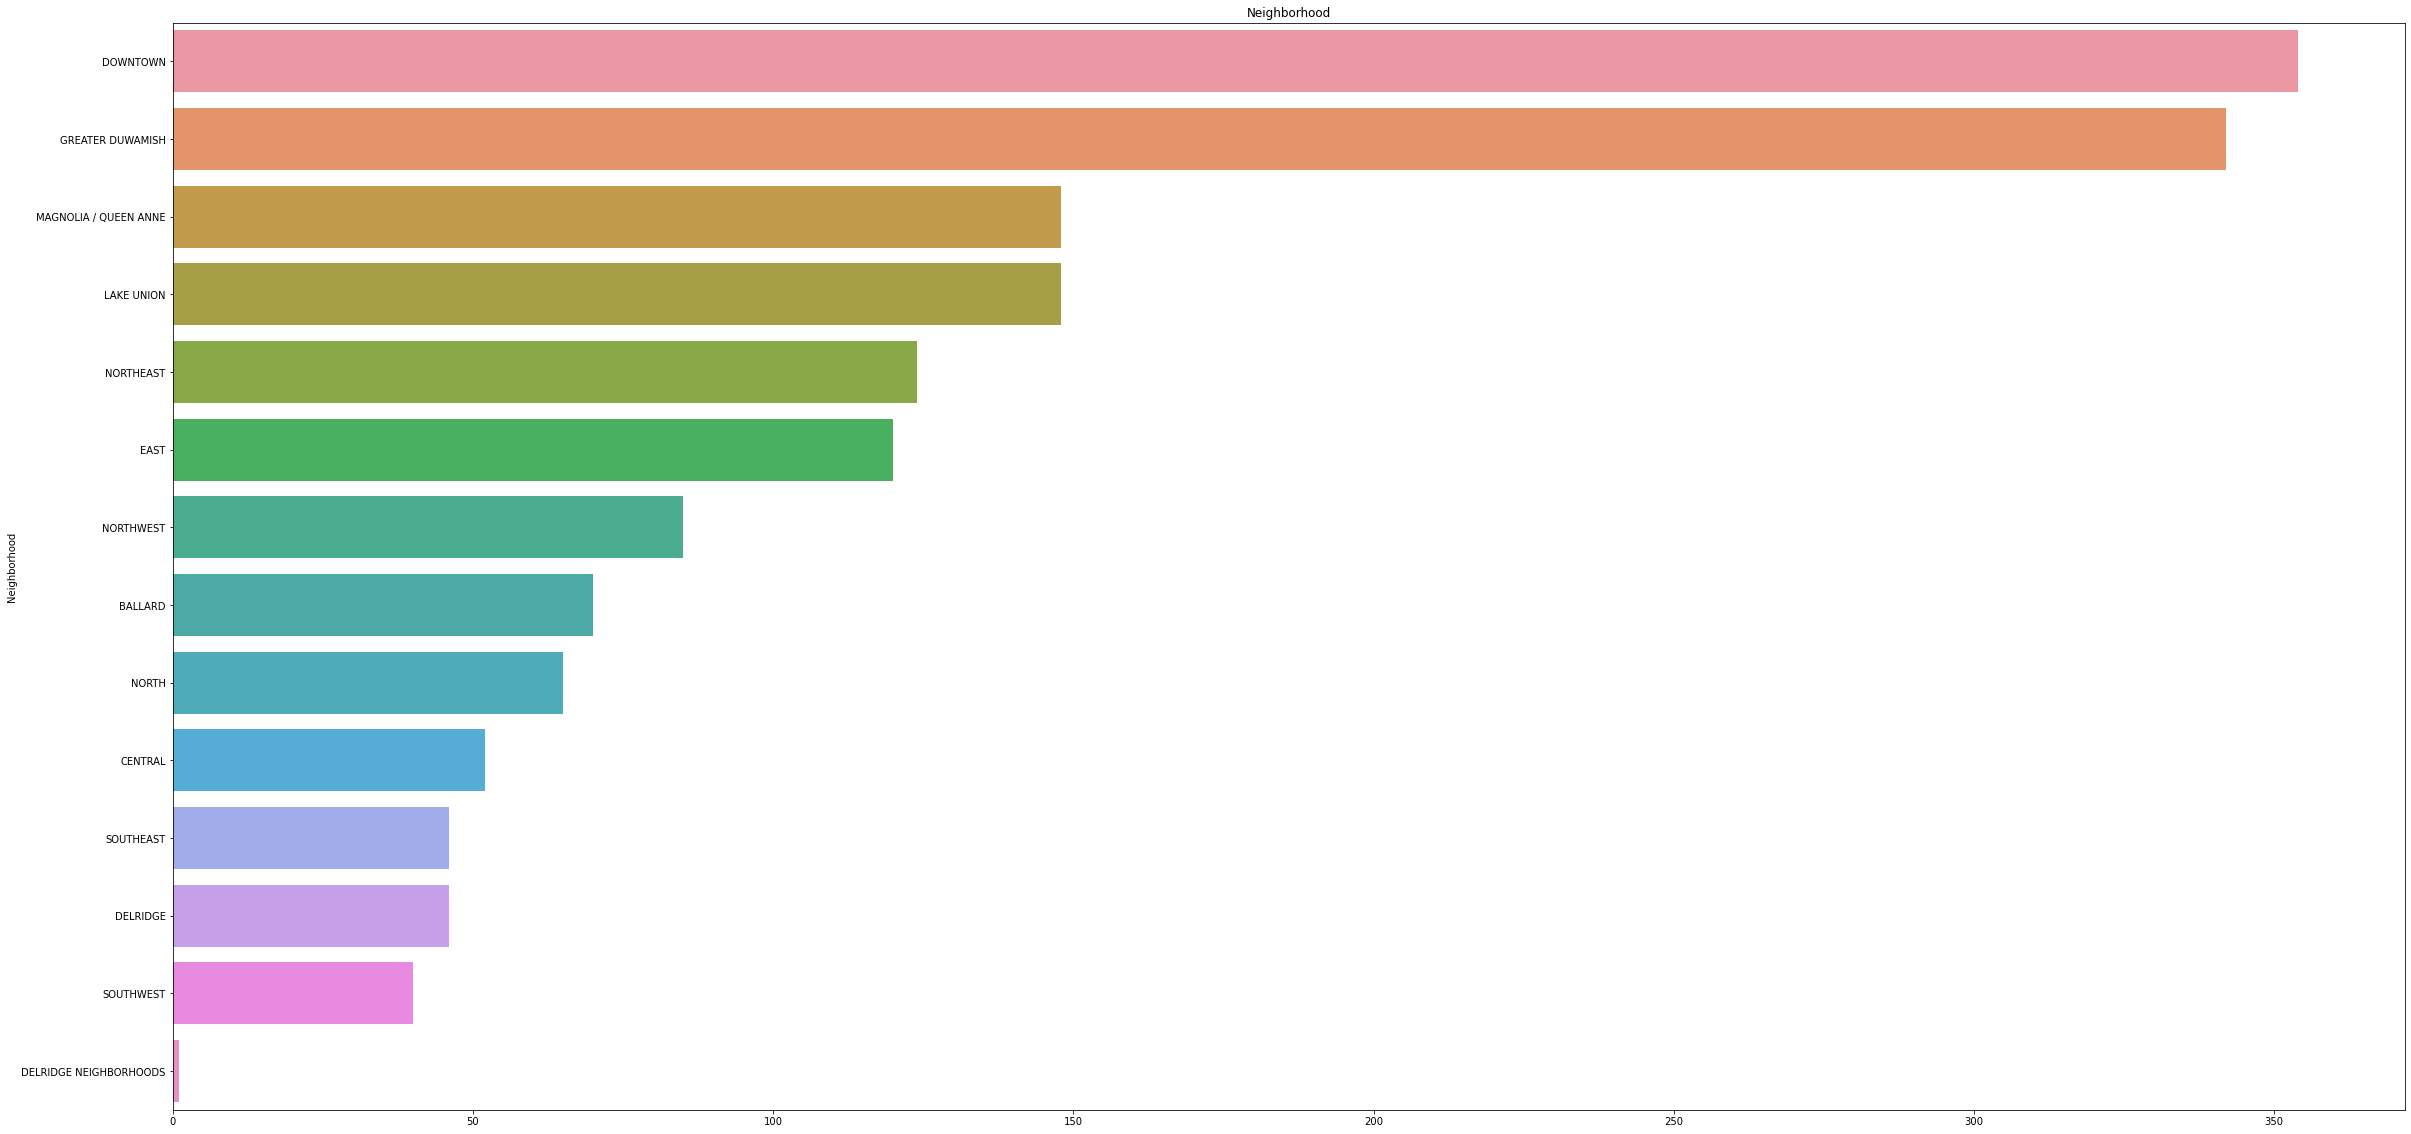

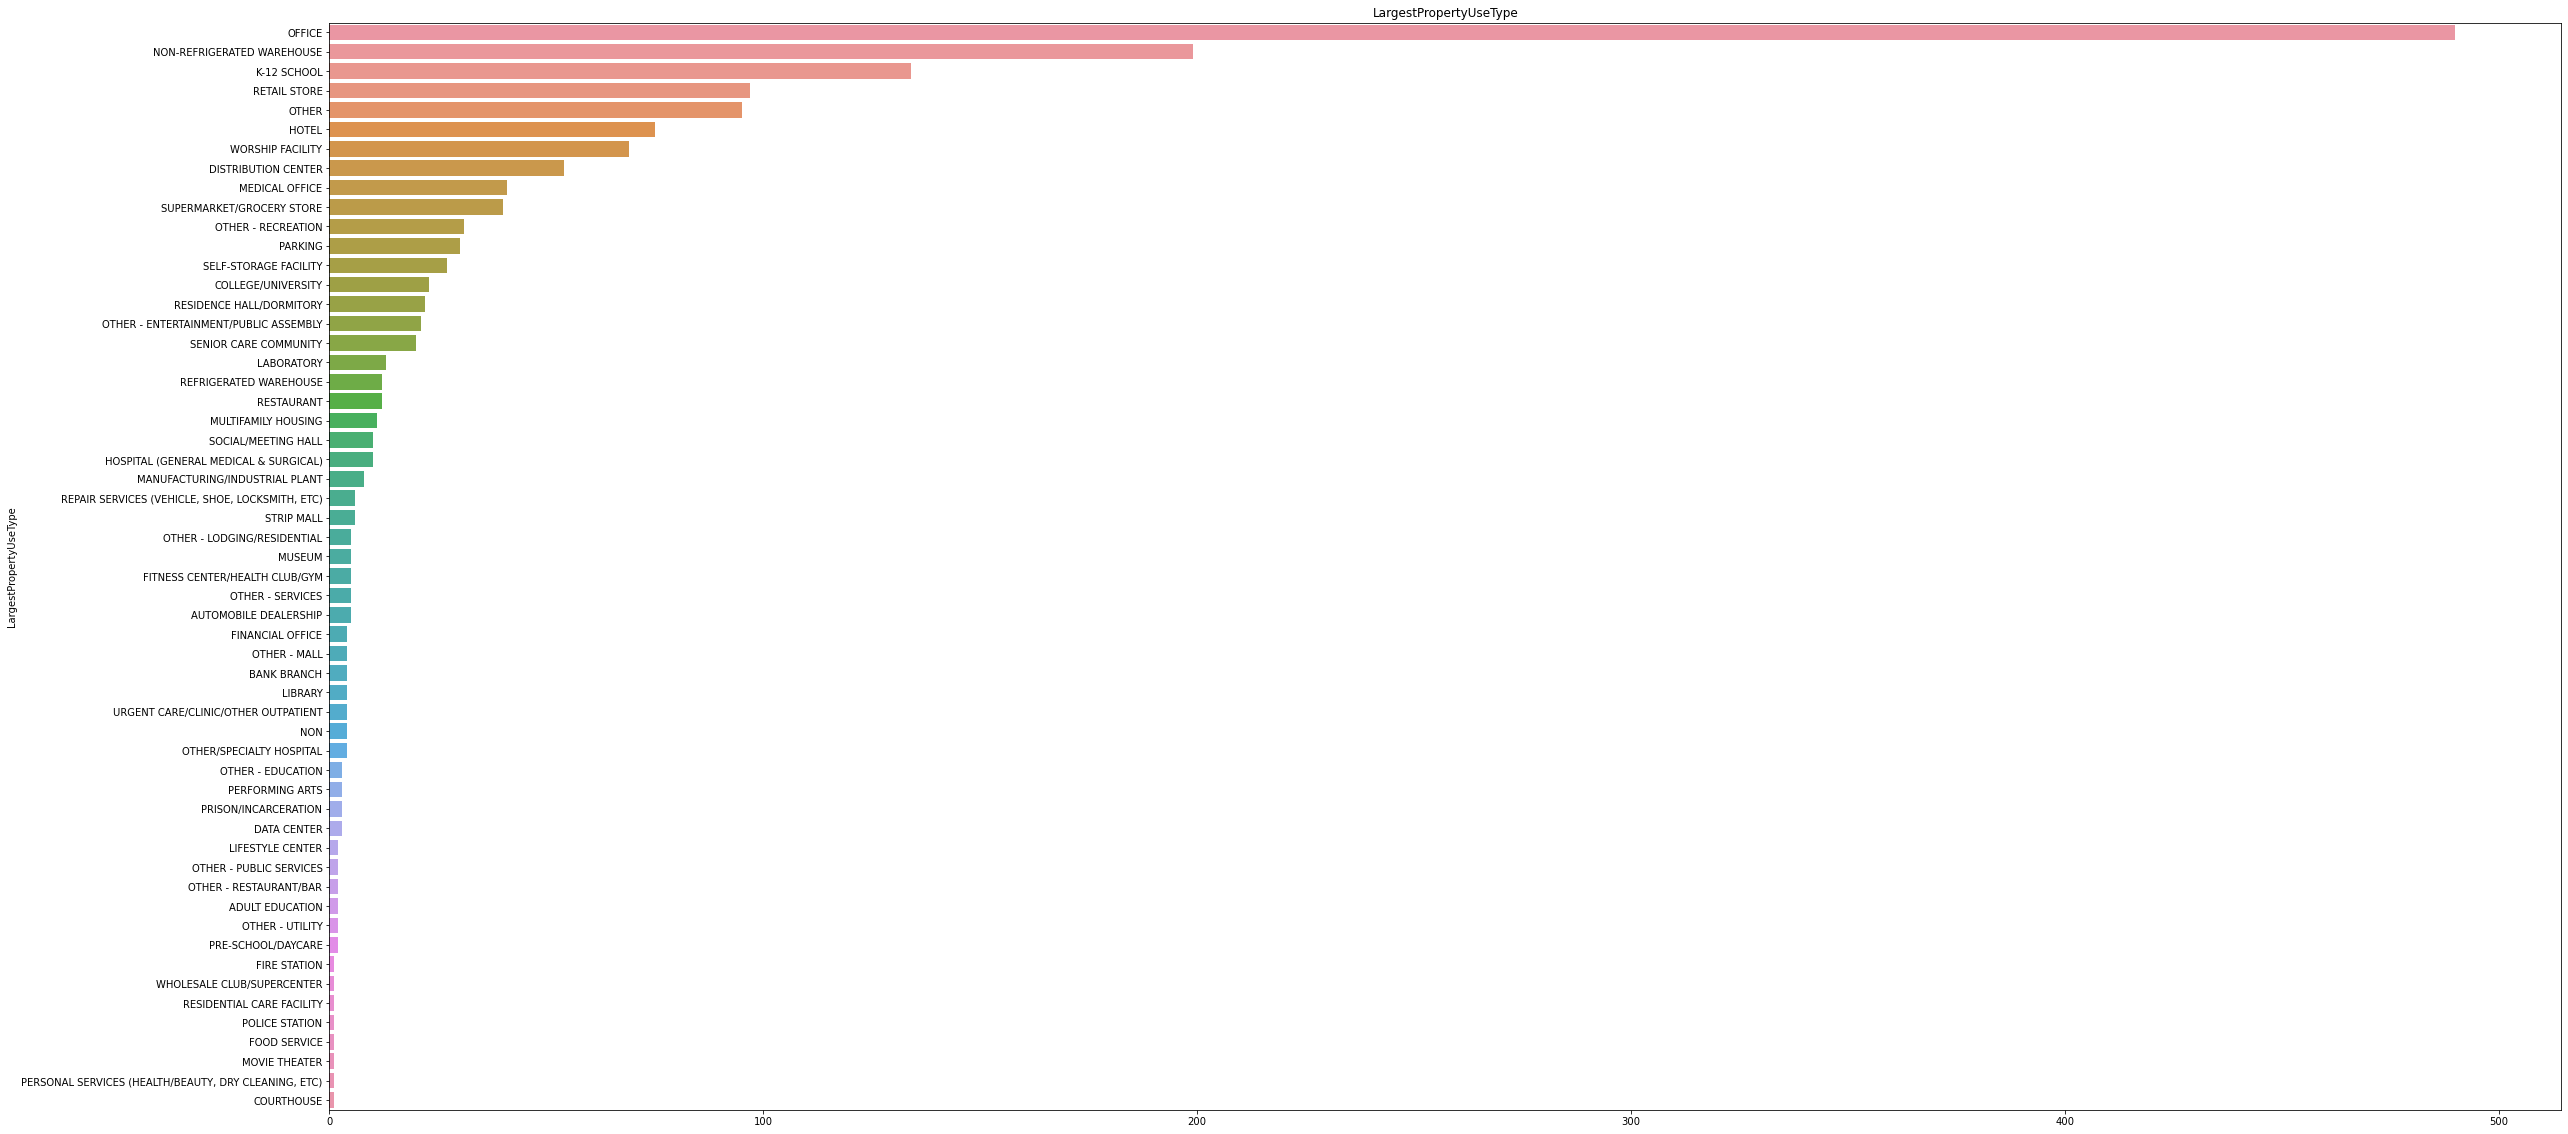

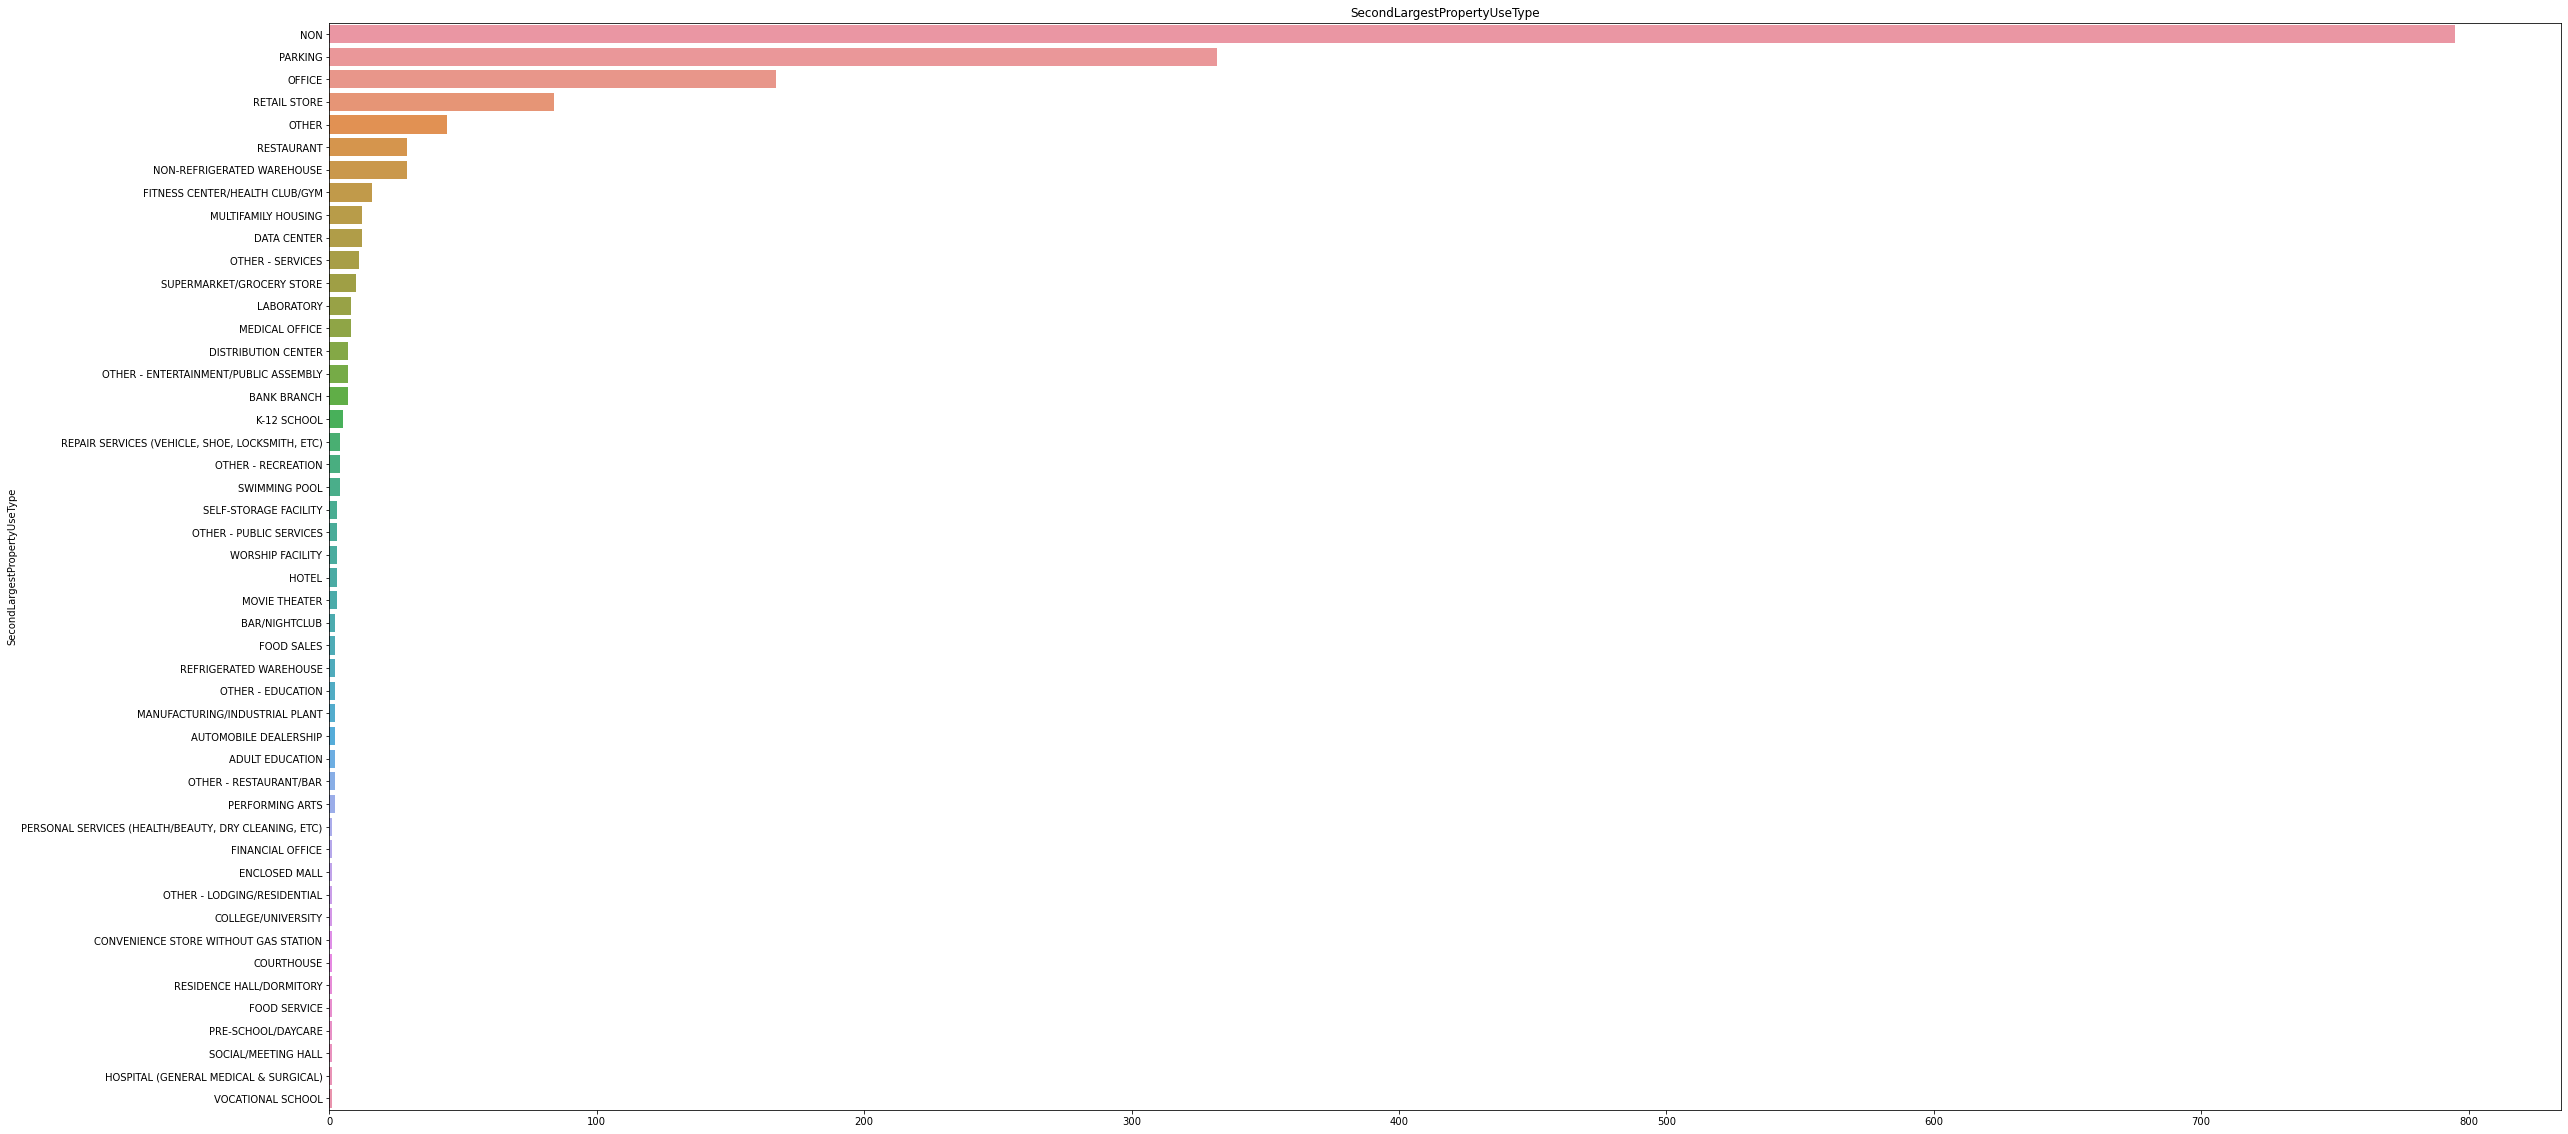

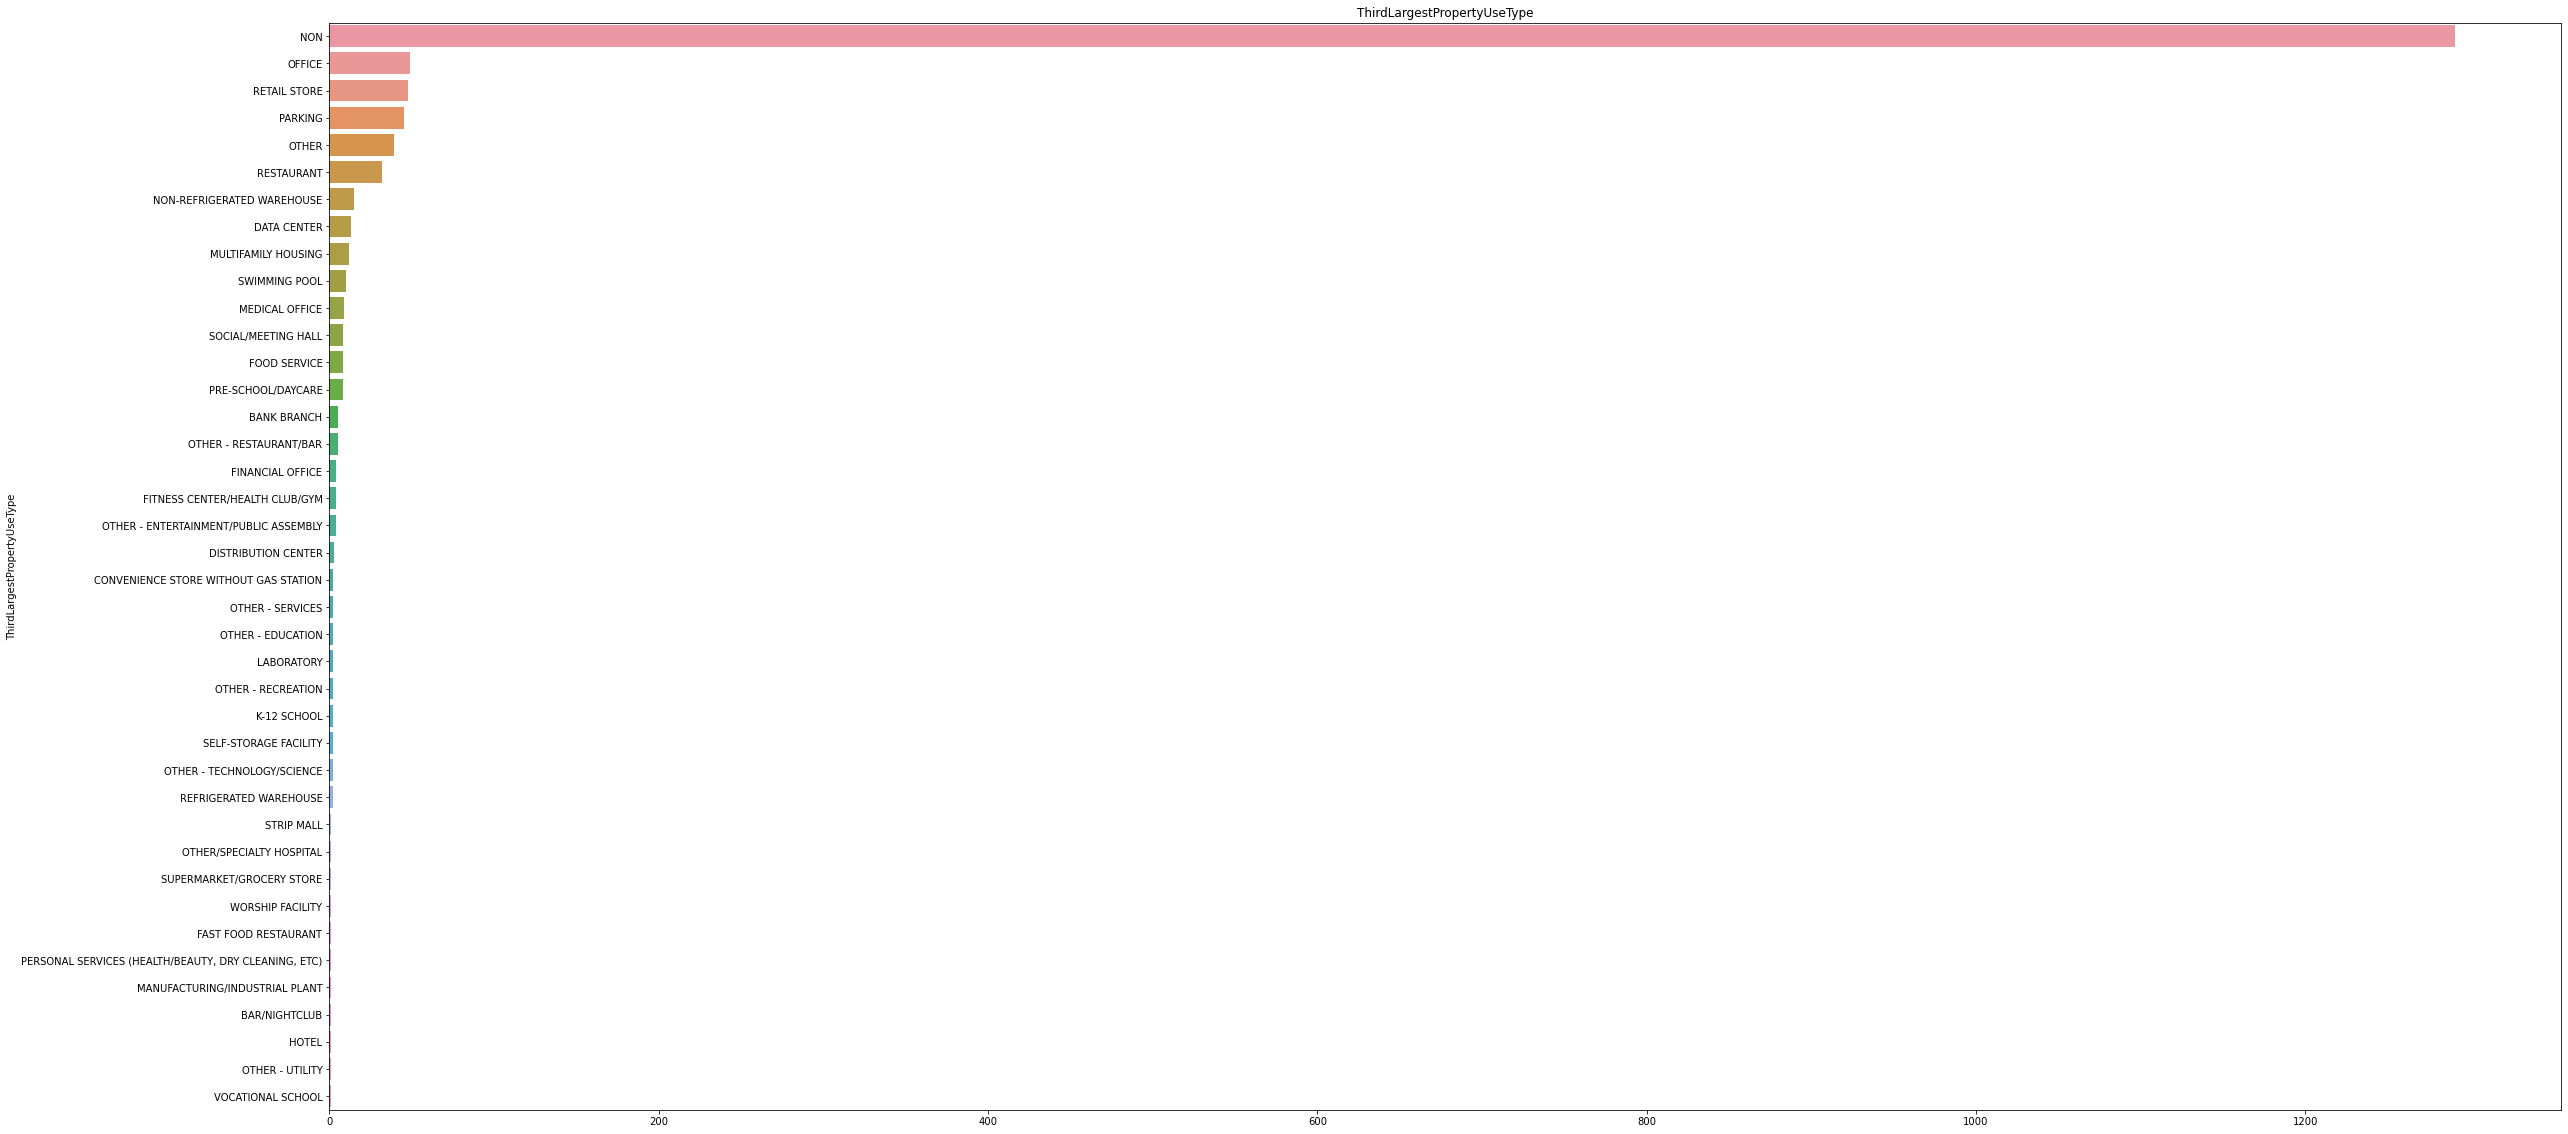

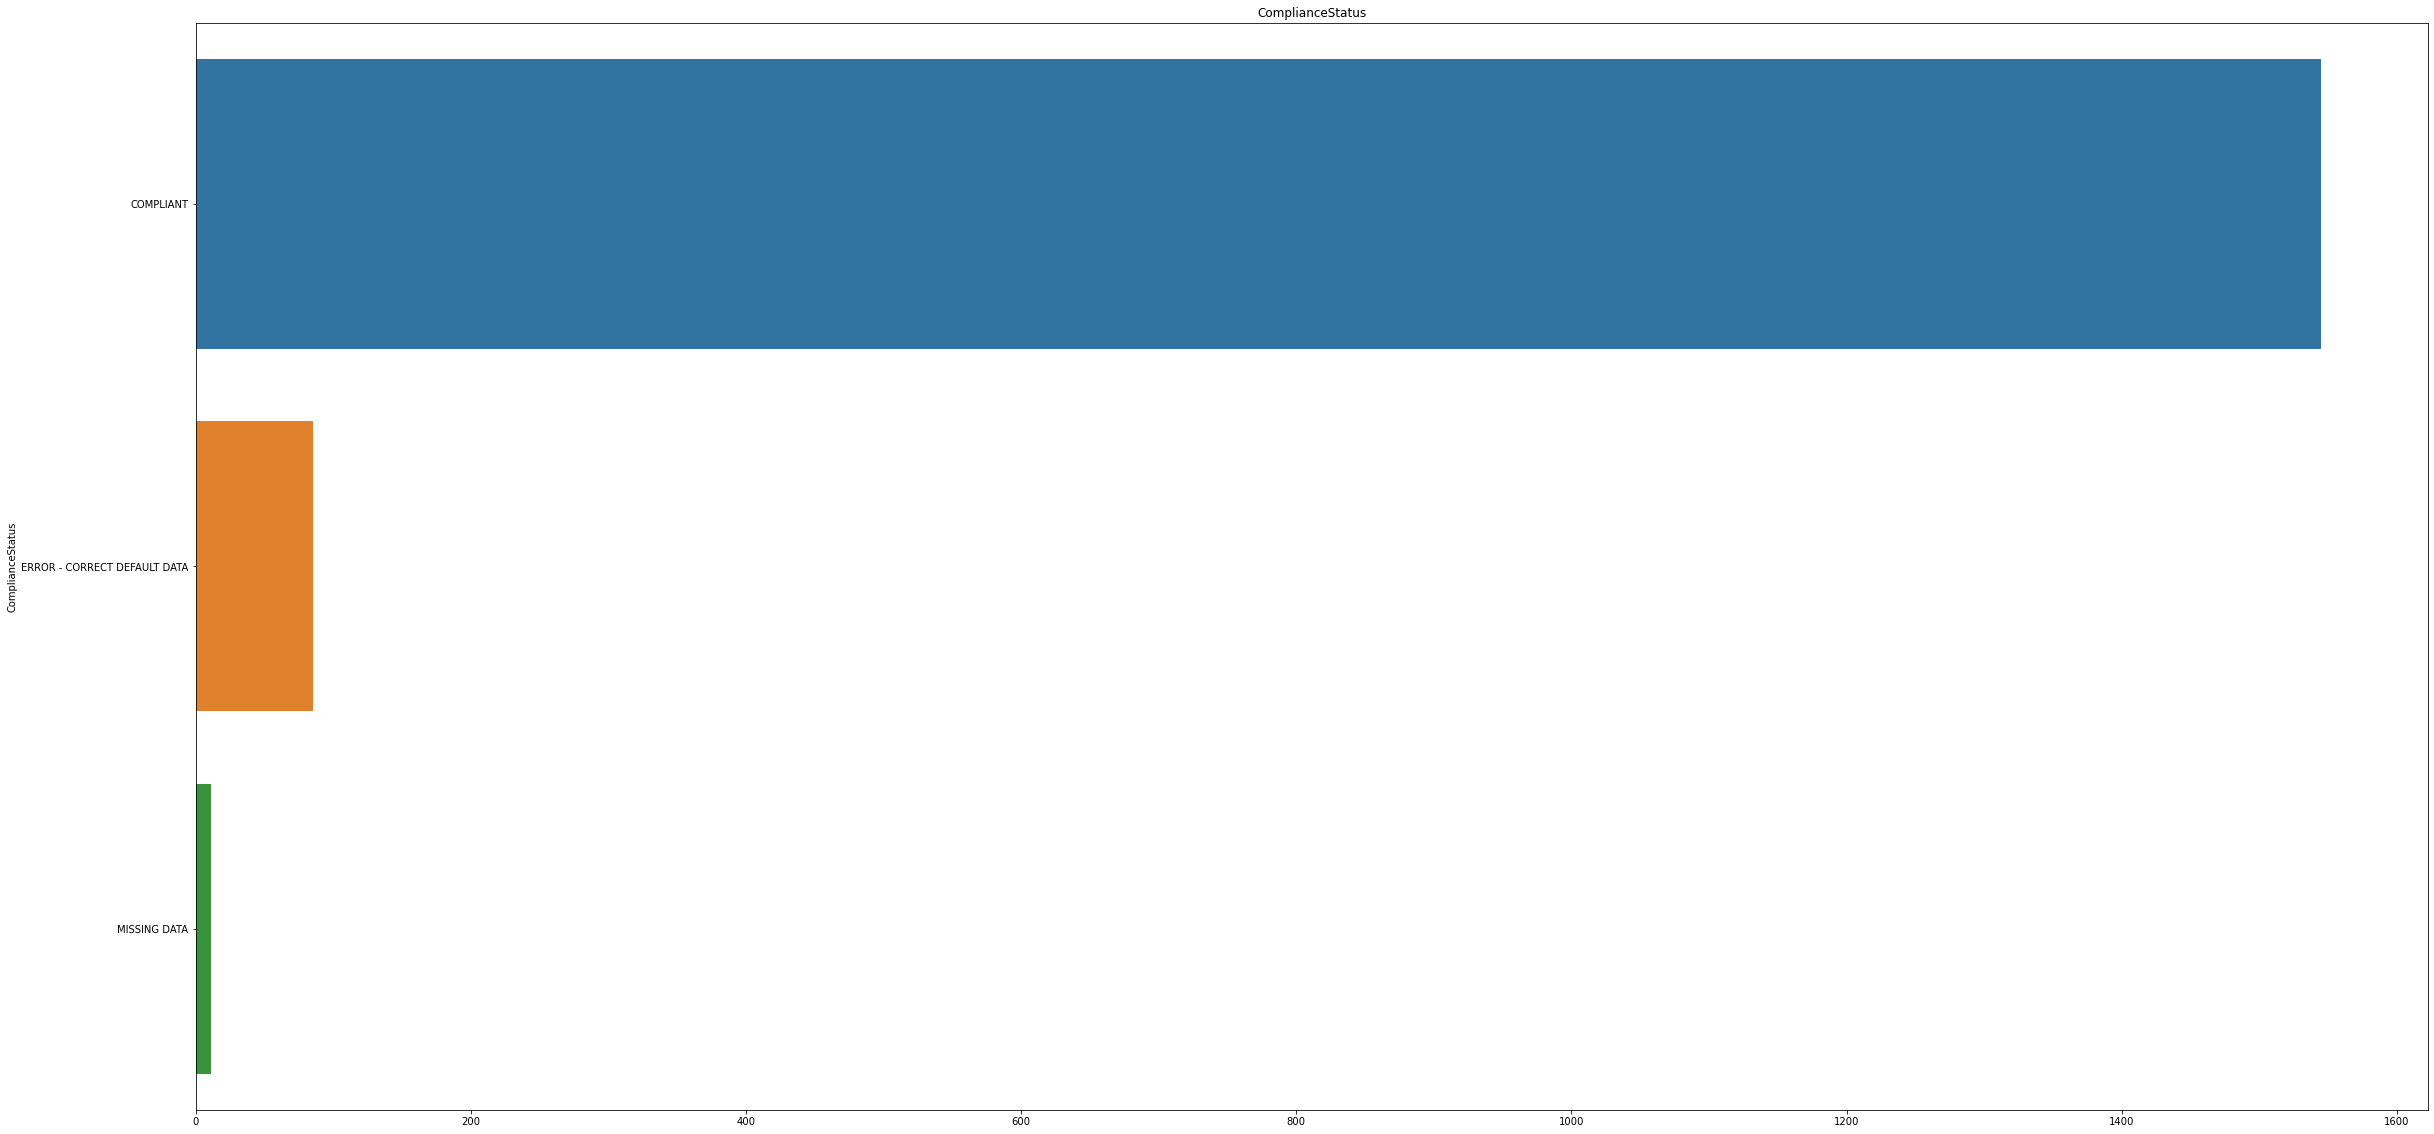

In [33]:
# Toutes les variables catégorielles sauf "ListOfAllPropertyUseTypes" 
cat_attribs_to_plot = list(energie[cat_attribs].drop(columns=["ListOfAllPropertyUseTypes"]).columns)

for cat in cat_attribs_to_plot :
    fig = plt.figure(1, figsize=(40 ,20))
    energie[cat] = energie[cat].str.upper()
    df_cat = energie[cat].value_counts()
    plt.title(cat)
    plt.ylabel(cat)
    sns.barplot(df_cat.values, df_cat.index)
    plt.show()

- Consommation d'energie par surface total

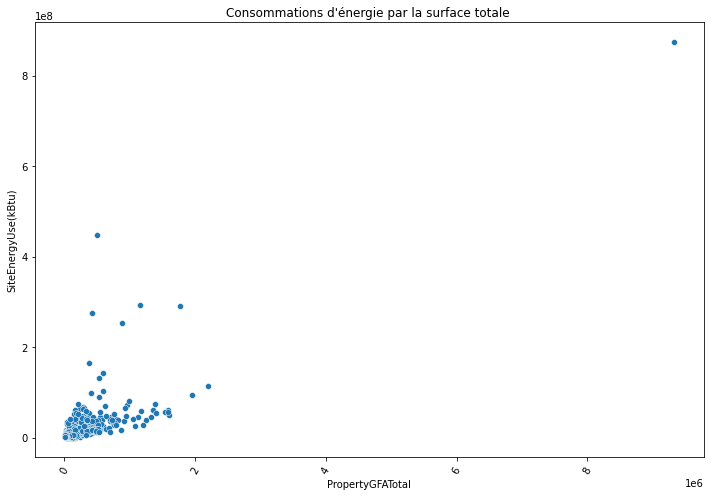

In [120]:
fig = plt.figure(1, figsize=(12,8))
sns.scatterplot(data=energie, x="PropertyGFATotal" , y="SiteEnergyUse(kBtu)")
plt.title("Consommations d'énergie par la surface totale ")

plt.xticks(rotation=60)
plt.show()

- Un bâtiment à forte consommation se manifeste, il s'agit forcément d'un outlier
- Je vérifie de quel bâtiment 

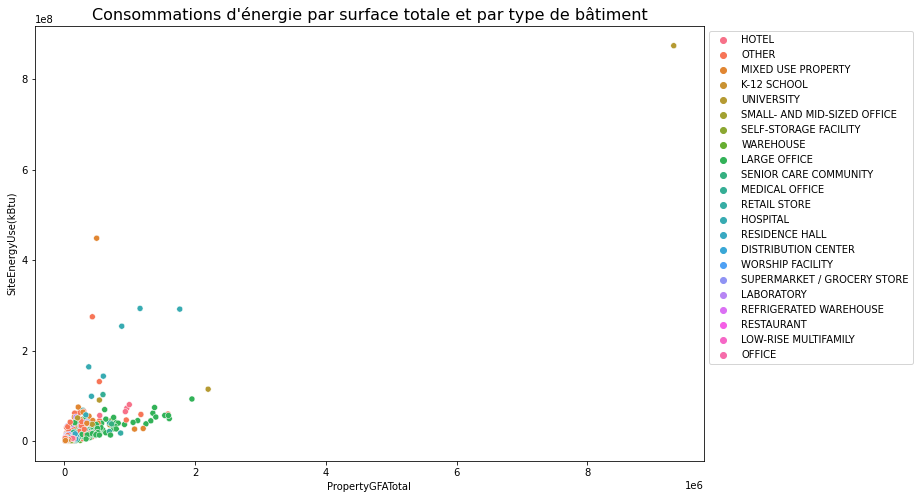

In [121]:
fig = plt.figure(figsize=(12,8))
sns.scatterplot(data = energie, x='PropertyGFATotal', y='SiteEnergyUse(kBtu)', hue='PrimaryPropertyType')
plt.title("Consommations d'énergie par surface totale et par type de bâtiment",fontsize=16)
plt.legend( loc = 2, bbox_to_anchor = (1,1))

plt.show()

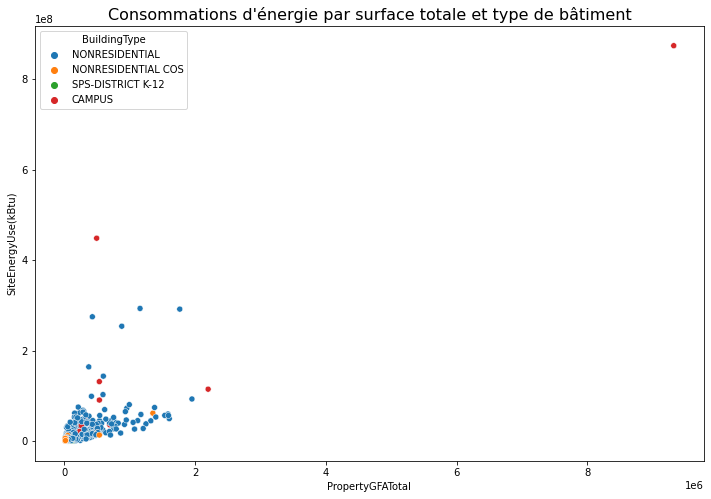

In [122]:
fig = plt.figure(figsize=(12,8))
sns.scatterplot(data = energie, x='PropertyGFATotal', y='SiteEnergyUse(kBtu)', hue='BuildingType')
plt.title("Consommations d'énergie par surface totale et type de bâtiment",fontsize=16)
plt.show()

- C'est un batiment de type campus 

In [54]:
energie.describe()

OSEBuildingID    Latitude   Longitude  NumberofBuildings  \
count    1641.000000 1641.000000 1641.000000        1641.000000   
mean    16301.307739   47.615963 -122.332968           1.200488   
std     13814.610460    0.048180    0.024615           2.944718   
min         1.000000   47.499170 -122.411820           1.000000   
25%       581.000000   47.585280 -122.343320           1.000000   
50%     21141.000000   47.612340 -122.332940           1.000000   
75%     24600.000000   47.649650 -122.321800           1.000000   
max     50226.000000   47.733870 -122.258640         111.000000   

       NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
count     1641.000000       1641.000000         1641.000000   
mean         4.145643     119042.940280        13068.500305   
std          6.610514     297979.030045        42583.492994   
min          0.000000      11285.000000            0.000000   
25%          1.000000      29498.000000            0.000000   
50%          2.000000      49299.000000            0.000000   
75%          4.000000     106041.000000            0.000000   
max         99.000000    9320156.000000       512608.000000   

       PropertyGFABuilding(s)  LargestPropertyUseTypeGFA  \
count             1641.000000                1641.000000   
mean            105974.439976               98637.214503   
std             284643.317178              277377.020403   
min               3636.000000                   0.000000   
25%              28492.000000               25547.000000   
50%              47415.000000               43813.000000   
75%              95426.000000               92006.000000   
max            9320156.000000             9320156.000000   

       SecondLargestPropertyUseTypeGFA  ThirdLargestPropertyUseTypeGFA  \
count                      1641.000000                     1641.000000   
mean                      18682.675988                     3188.659597   
std                       51061.504734                    18107.032166   
min                           0.000000                        0.000000   
25%                           0.000000                        0.000000   
50%                           0.000000                        0.000000   
75%                       12697.000000                        0.000000   
max                      639931.000000                   459748.000000   

       ENERGYSTARScore  SiteEUI(kBtu/sf)  SourceEUI(kBtu/sf)  \
count      1080.000000       1641.000000         1641.000000   
mean         65.158333         72.598538          177.119074   
std          28.357246         73.703676          184.411786   
min           1.000000          0.000000            0.000000   
25%          48.000000         34.200001           78.300003   
50%          73.000000         52.099998          131.699997   
75%          89.000000         81.900002          204.899994   
max         100.000000        834.400024         2620.000000   

       SiteEnergyUse(kBtu)   SteamUse(kBtu)  Electricity(kBtu)  \
count          1641.000000      1641.000000        1641.000000   
mean        8506577.512498    520381.409671     5887714.400419   
std        30444698.092624   5555445.797257    20920696.352667   
min               0.000000         0.000000           0.000000   
25%         1258619.125000         0.000000      739343.000000   
50%         2590622.000000         0.000000     1639135.000000   
75%         6960904.500000         0.000000     4897760.000000   
max       873923712.000000 134943456.000000   657074389.000000   

       NaturalGas(kBtu)  TotalGHGEmissions  GHGEmissionsIntensity  BuildingAge  
count       1641.000000        1641.000000            1641.000000  1641.000000  
mean     1999312.164557         187.396258               1.629025    53.906764  
std      9439024.222182         757.366220               2.347516    32.633896  
min            0.000000           0.400000               0.010000     1.000000  
25%            0.000000          20.780000        

In [34]:
energie[(energie["PropertyGFATotal"] >8000000) ]

OSEBuildingID BuildingType PrimaryPropertyType Neighborhood  Latitude  \
3274          49967       CAMPUS          UNIVERSITY    NORTHEAST 47.656440   

       Longitude  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
3274 -122.310410         111.000000               0           9320156   

      PropertyGFAParking ListOfAllPropertyUseTypes LargestPropertyUseType  \
3274                   0        College/University     COLLEGE/UNIVERSITY   

      LargestPropertyUseTypeGFA SecondLargestPropertyUseType  \
3274             9320156.000000                          NON   

      SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  \
3274                         0.000000                         NON   

      ThirdLargestPropertyUseTypeGFA  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
3274                        0.000000              NaN         93.800003   

      SiteEnergyUse(kBtu)  SteamUse(kBtu)  Electricity(kBtu)  \
3274     873923712.000000 84985240.000000   657074389.000000   

      NaturalGas(kBtu)  DefaultData ComplianceStatus  TotalGHGEmissions  \
3274          0.000000        False        COMPLIANT       11140.560000   

      GHGEmissionsIntensity  BuildingAge  
3274               1.200000          116

Le batiment NONRESIDENTIAL campus est très  supérieur aux autres données de sa catégorie, je le supprime

In [61]:
# Je supprime le batiment
#print(energie.shape[0],"Lignes avant suppression")
#indexNames = energie[(energie["PropertyGFATotal"] >1200000) & (energie["BuildingType"] =="NONRESIDENTIAL COS")].index
# Delete these row indexes from dataFrame
#energie.drop(indexNames , inplace=True)
#print(energie.shape[0],"Lignes après suppression")

In [35]:
# Je supprime le batiment
print(energie.shape[0],"Lignes avant suppression")
indexNames = energie[(energie["PropertyGFATotal"] >8000000) ].index
# Delete these row indexes from dataFrame
energie.drop(indexNames , inplace=True)
print(energie.shape[0],"Lignes après suppression")

1641 Lignes avant suppression
1640 Lignes après suppression


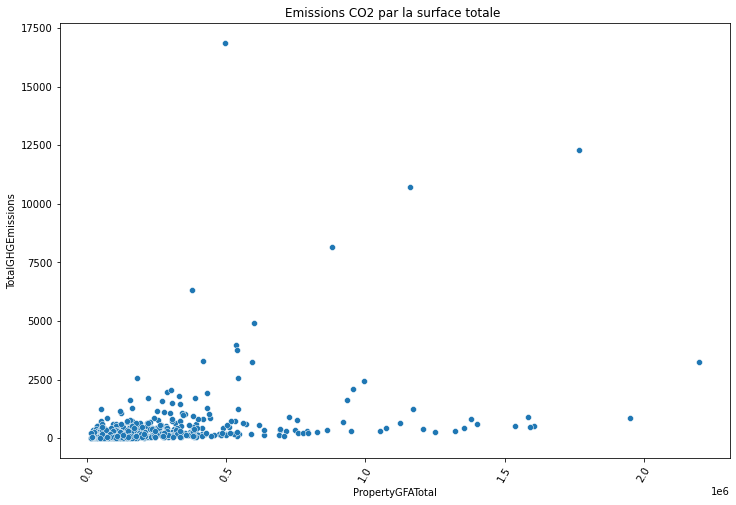

In [125]:
fig = plt.figure(1, figsize=(12,8))
sns.scatterplot(data=energie, x="PropertyGFATotal" , y="TotalGHGEmissions")
plt.title("Emissions CO2 par la surface totale ")

plt.xticks(rotation=60)
plt.show()

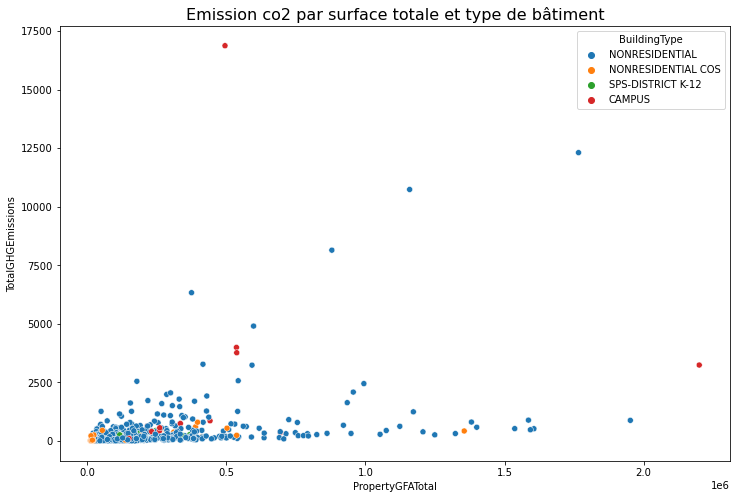

In [127]:
fig = plt.figure(figsize=(12,8))
sns.scatterplot(data = energie, x='PropertyGFATotal', y='TotalGHGEmissions', hue='BuildingType')
plt.title("Emission co2 par surface totale et type de bâtiment",fontsize=16)
plt.show()

In [128]:
energie[(energie["TotalGHGEmissions"] >15000) ]

OSEBuildingID BuildingType PrimaryPropertyType      Neighborhood  \
35             43       CAMPUS  MIXED USE PROPERTY  GREATER DUWAMISH   

    Latitude   Longitude  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
35 47.534930 -122.317880           1.000000               3            494835   

    PropertyGFAParking  \
35                   0   

                                                                               ListOfAllPropertyUseTypes  \
35  Energy/Power Station, Laboratory, Manufacturing/Industrial Plant, Non-Refrigerated Warehouse, Office   

   LargestPropertyUseType  LargestPropertyUseTypeGFA  \
35                 OFFICE              757027.000000   

   SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
35                   LABORATORY                    639931.000000   

   ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
35  NON-REFRIGERATED WAREHOUSE                   459748.000000   

    ENERGYSTARScore  SiteEUI(kBtu/sf)  SiteEnergyUse(kBtu)  SteamUse(kBtu)  \
35         8.000000        221.699997     448385312.000000        0.000000   

    Electricity(kBtu)  NaturalGas(kBtu)  DefaultData ComplianceStatus  \
35   150476283.000000  297909000.000000        False        COMPLIANT   

    TotalGHGEmissions  GHGEmissionsIntensity  BuildingAge  
35       16870.980000              34.090000           24

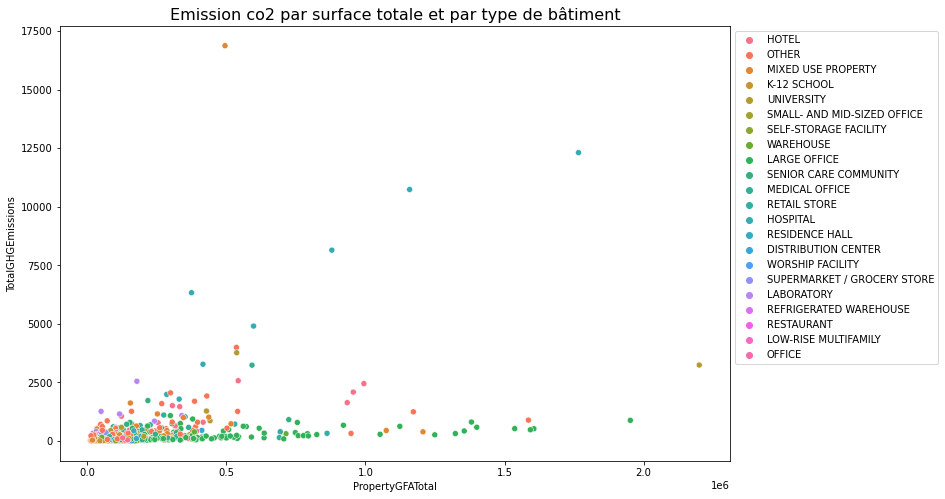

In [129]:
fig = plt.figure(figsize=(12,8))
sns.scatterplot(data = energie, x='PropertyGFATotal', y='TotalGHGEmissions', hue='PrimaryPropertyType')
plt.title("Emission co2 par surface totale et par type de bâtiment",fontsize=16)
plt.legend( loc = 2, bbox_to_anchor = (1,1))

plt.show()

In [36]:
# Je supprime le batiment
print(energie.shape[0],"Lignes avant suppression")
indexNames =energie[(energie["TotalGHGEmissions"] >15000) ].index
# Delete these row indexes from dataFrame
energie.drop(indexNames , inplace=True)
print(energie.shape[0],"Lignes après suppression")

1640 Lignes avant suppression
1639 Lignes après suppression


Boxplot de la colonne 'PrimaryPropertyType'

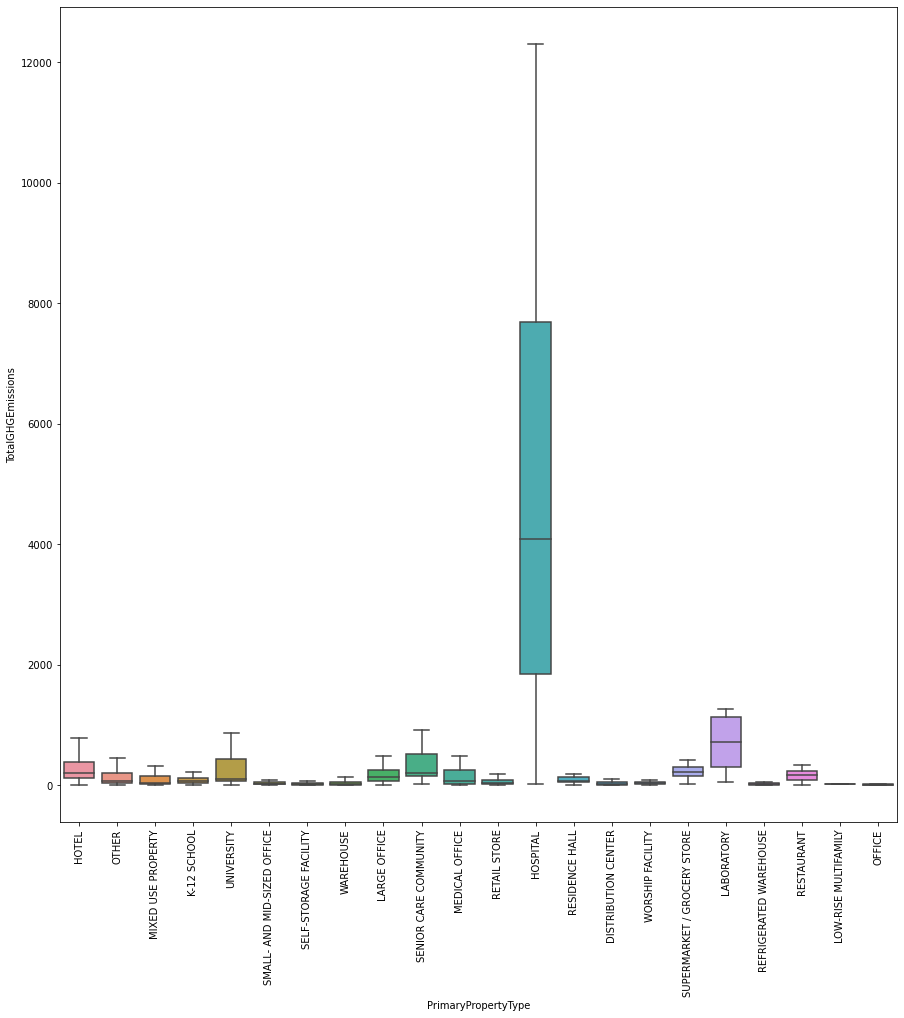

In [70]:
fig = plt.figure(1, figsize=(15,15))
sns.boxplot(data=energie, x="PrimaryPropertyType" , y="TotalGHGEmissions", showfliers=False)
plt.xticks(rotation=90)
plt.show()

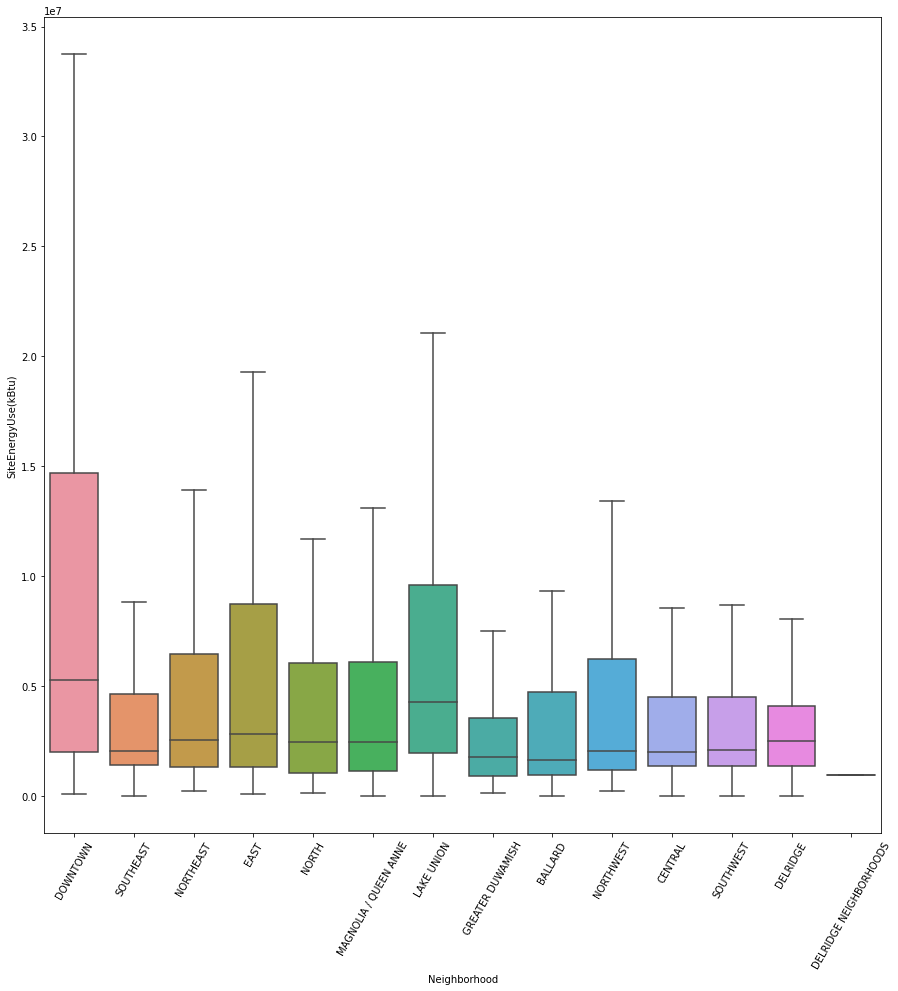

In [71]:
fig = plt.figure(1, figsize=(15,15))
sns.boxplot(data=energie, x="Neighborhood" , y="SiteEnergyUse(kBtu)", showfliers=False)
plt.xticks(rotation=60)
plt.show()

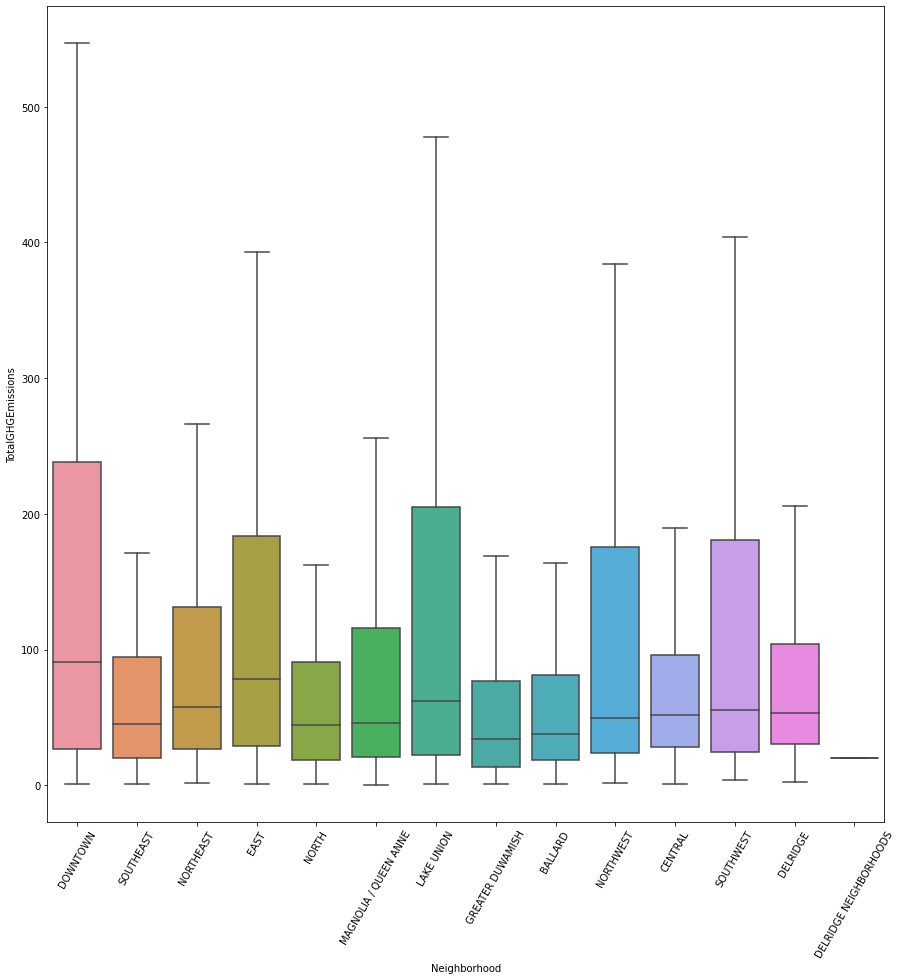

In [54]:
fig = plt.figure(1, figsize=(15,15))
sns.boxplot(data=energie, x="Neighborhood" , y="TotalGHGEmissions", showfliers=False)
plt.xticks(rotation=60)
plt.show()

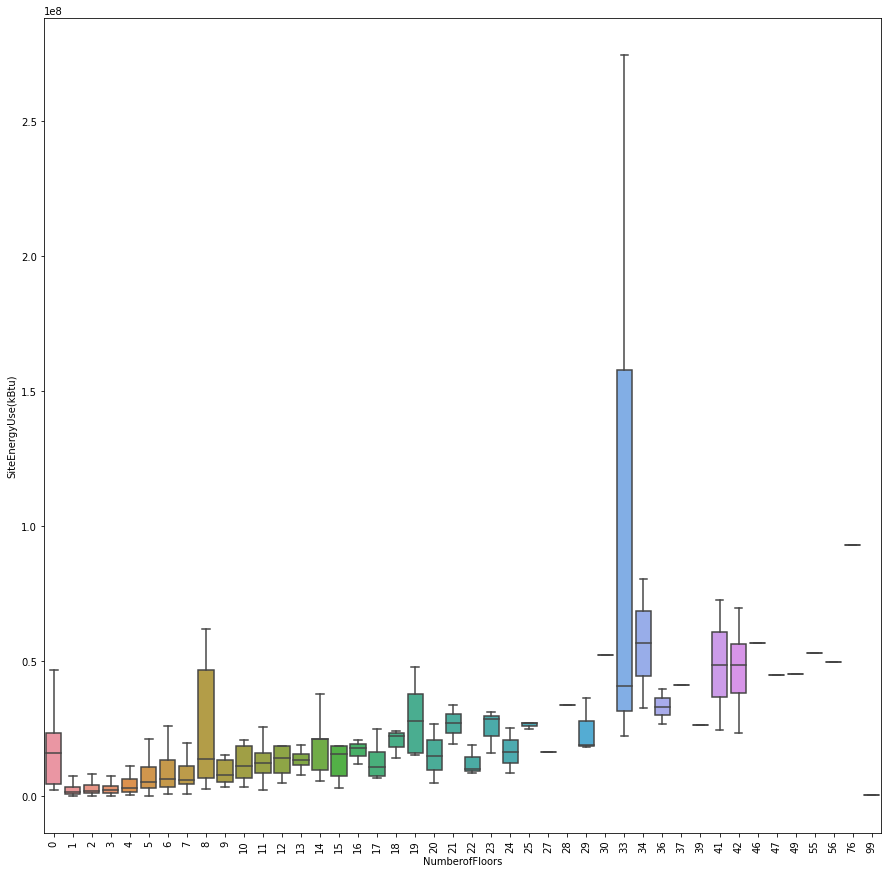

In [55]:
fig = plt.figure(1, figsize=(15,15))
sns.boxplot(data=energie, x="NumberofFloors" , y="SiteEnergyUse(kBtu)", showfliers=False)
plt.xticks(rotation=90)
plt.show()

Analyse bivariée

In [56]:
# Je selectionne les variables à vérifier
df_num_attribs = energie.loc[:, ['SiteEnergyUse(kBtu)','TotalGHGEmissions','BuildingAge','NumberofBuildings',
                                 'NumberofFloors','PropertyGFAParking','PropertyGFATotal',
                                 'LargestPropertyUseTypeGFA','SecondLargestPropertyUseTypeGFA','ThirdLargestPropertyUseTypeGFA',
                                 'ENERGYSTARScore','PrimaryPropertyType']]

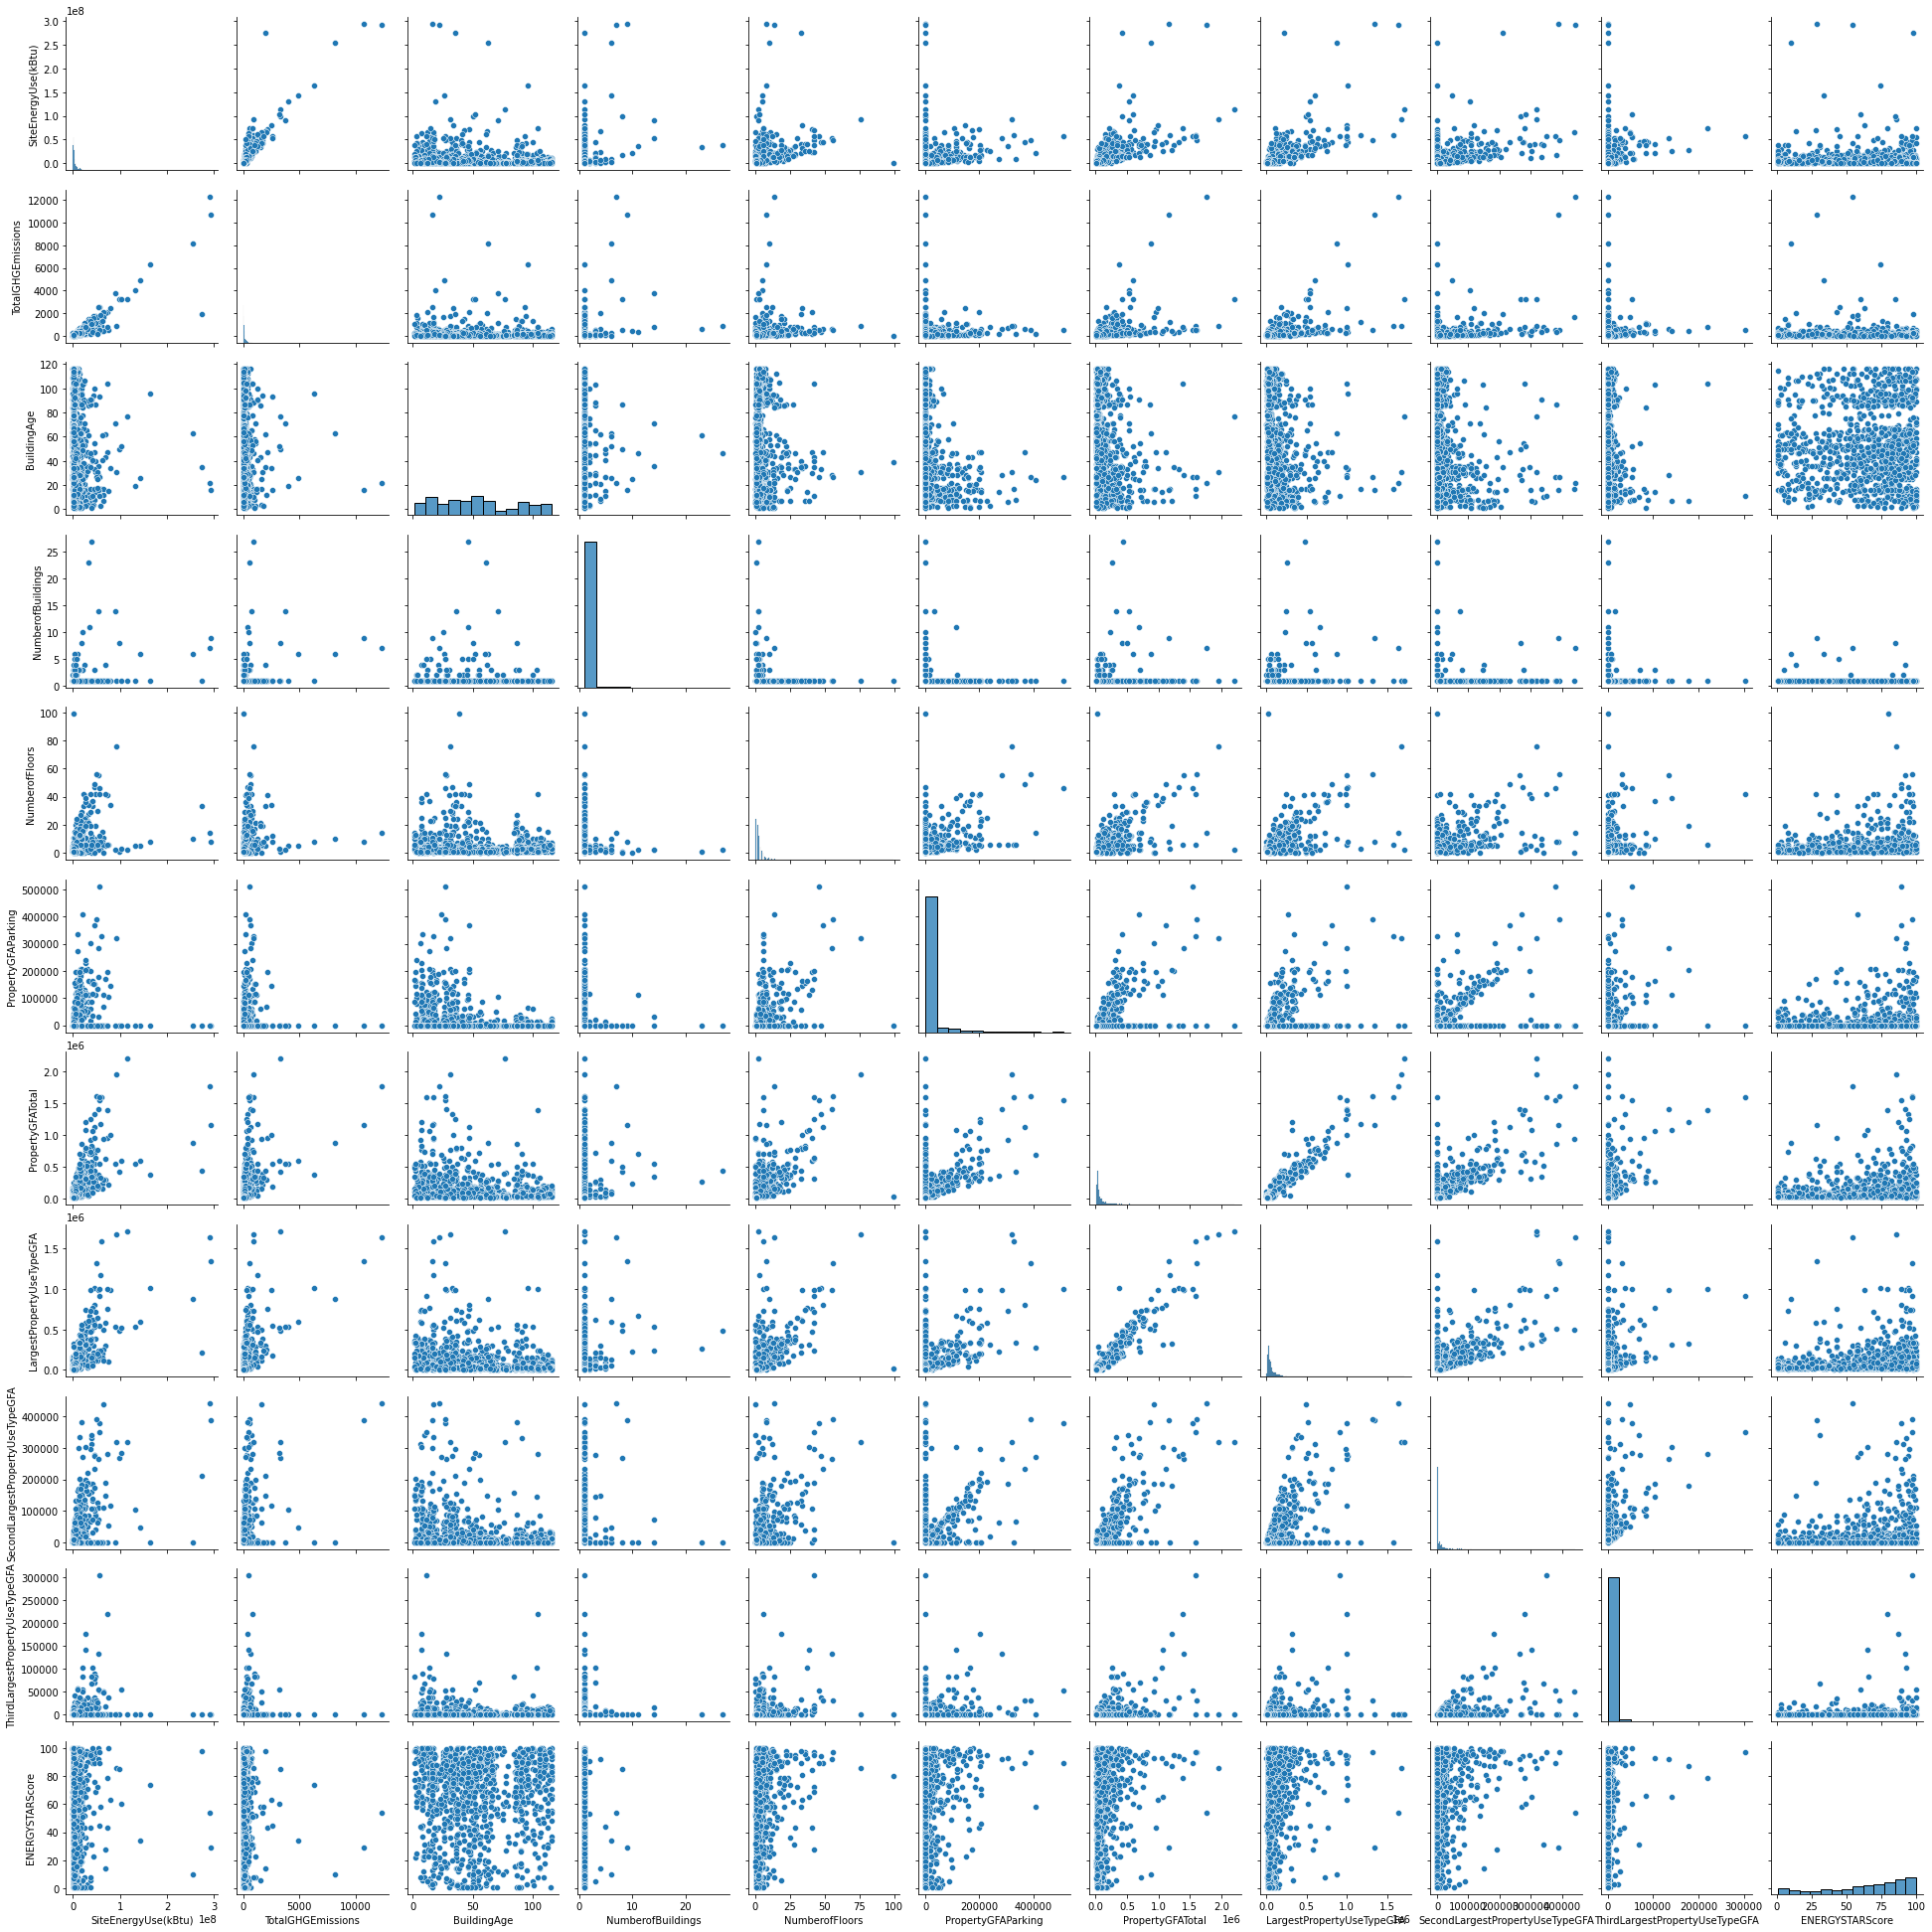

In [57]:
c = sns.pairplot(df_num_attribs,kind = 'scatter')
plt.show()

Je revérifie la matrice de corrélation sans les variales de sources d'energie

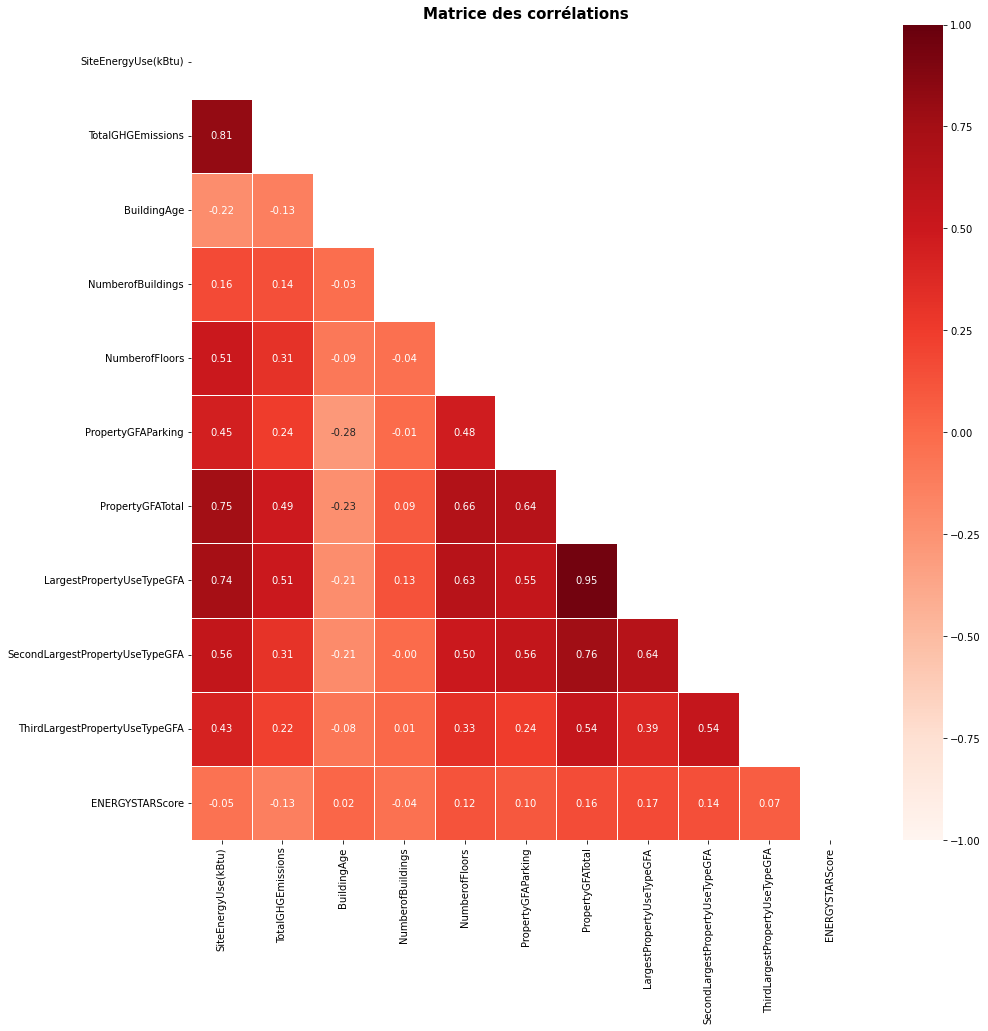

In [115]:
plt.figure(figsize=(15, 15))
correlation_matrix(df_num_attribs)

- PropertyGFATotal/PropertyGFABuilding : très corrélés : je supprime PropertyGFABuilding
- LargestPropertyUseTypeGFA/PropertyGFATotal : très corrélés 
- LargestPropertyUseType/PropertyGFABuilding : très corrélés
- SecondLargestPropertyUseTypeGFA/PropertyGFATotal : très corrélés 
- ThirdLargestPropertyUseTypeGFA / PropertyGFATotal :très corrélés
- PropertyGFATotal=PropertyGFAParking+PropertyGFABuilding

- Plus tard dans la modélisation ne garder qu'une des variables très corrélés : supprimer LargestPropertyUseTypeGFA, SecondLargestPropertyUseTypeGFA et ThirdLargestPropertyUseTypeGFA

- Définition des dataframes pour la modélisation
- Je rajoute une variable qui définie le type d'énergie utilisé

In [37]:
#Je transforme l'utilisation des différentes sortes d'energie par 0 ou 1
energie_col=energie.loc[:, ["SteamUse(kBtu)","Electricity(kBtu)","NaturalGas(kBtu)"]]
for col in energie_col.columns:
    energie_col[col] = [1 if x > 1 else 0 for x in energie_col[col]]

In [38]:
energie_col.rename(columns={"SteamUse(kBtu)":"SteamUse"},inplace=True)
energie_col.rename(columns={"Electricity(kBtu)":"Electricity"},inplace=True)
energie_col.rename(columns={"NaturalGas(kBtu)":"NaturalGas"},inplace=True)

In [39]:
df_energie=pd.concat([energie.reset_index(drop=True), energie_col.reset_index(drop=True)], axis=1)

In [41]:
df_energie.head()

OSEBuildingID    BuildingType PrimaryPropertyType Neighborhood  Latitude  \
0              1  NONRESIDENTIAL               HOTEL     DOWNTOWN 47.612200   
1              2  NONRESIDENTIAL               HOTEL     DOWNTOWN 47.613170   
2              3  NONRESIDENTIAL               HOTEL     DOWNTOWN 47.613930   
3              5  NONRESIDENTIAL               HOTEL     DOWNTOWN 47.614120   
4              8  NONRESIDENTIAL               HOTEL     DOWNTOWN 47.613750   

    Longitude  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
0 -122.337990           1.000000              12             88434   
1 -122.333930           1.000000              11            103566   
2 -122.338100           1.000000              41            956110   
3 -122.336640           1.000000              10             61320   
4 -122.340470           1.000000              18            175580   

   PropertyGFAParking      ListOfAllPropertyUseTypes LargestPropertyUseType  \
0                   0                          Hotel                  HOTEL   
1               15064     Hotel, Parking, Restaurant                  HOTEL   
2              196718                          Hotel                  HOTEL   
3                   0                          Hotel                  HOTEL   
4               62000  Hotel, Parking, Swimming Pool                  HOTEL   

   LargestPropertyUseTypeGFA SecondLargestPropertyUseType  \
0               88434.000000                          NON   
1               83880.000000                      PARKING   
2              756493.000000                          NON   
3               61320.000000                          NON   
4              123445.000000                      PARKING   

   SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  \
0                         0.000000                         NON   
1                     15064.000000                  RESTAURANT   
2                         0.000000                         NON   
3                         0.000000                         NON   
4                     68009.000000               SWIMMING POOL   

   ThirdLargestPropertyUseTypeGFA  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
0                        0.000000        60.000000         81.699997   
1                     4622.000000        61.000000         94.800003   
2                        0.000000        43.000000         96.000000   
3                        0.000000        56.000000        110.800003   
4                        0.000000        75.000000        114.800003   

   SiteEnergyUse(kBtu)  SteamUse(kBtu)  Electricity(kBtu)  NaturalGas(kBtu)  \
0       7226362.500000  2003882.000000     3946027.000000    1276453.000000   
1       8387933.000000        0.000000     3242851.000000    5145082.000000   
2      72587024.000000 21566554.000000    49526664.000000    1493800.000000   
3       6794584.000000  2214446.250000     2768924.000000    1811213.000000   
4      14172606.000000        0.000000     5368607.000000    8803998.000000   

   DefaultData ComplianceStatus  TotalGHGEmissions  GHGEmissionsIntensity  \
0        False        COMPLIANT         249.980000               2.830000   
1        False        COMPLIANT         295.860000               2.860000   
2        False        COMPLIANT        2089.280000               2.190000   
3        False        COMPLIANT         286.430000               4.670000   
4        False        COMPLIANT         505.010000               2.880000   

   BuildingAge  SteamUse  Electricity  NaturalGas  
0           89         1            1           1  
1           20         0            1           1  
2           47         1            1           1  
3           90         1            1           1  
4           36         0            1           1

- Je crée des dataframes différents pour la modélisation 

- Créer des datasets par thématique : 

- df_energie_1: Priorité au type et nombre de bâtiments, nombre d'etages, âge du bâtiment et localisation 
- df_energie_2 :Priorité à la surface : surface parking, surface des utilisations
- df_energie_3 :Priorité au type d'utilisation
- df_energie_4 : je réunie la surface,type d'utilisation,nbre de batiment et étage et type d'energie

In [42]:
# Je selectionne les variables à utiliser pour la modélisation
df_energie_1 = df_energie.loc[:, ['SiteEnergyUse(kBtu)','TotalGHGEmissions','Latitude','Longitude',
                                 'BuildingAge','NumberofBuildings','PrimaryPropertyType','NumberofFloors']]


df_energie_2 = df_energie.loc[:, ['SiteEnergyUse(kBtu)','TotalGHGEmissions','PropertyGFAParking',
                                 'LargestPropertyUseTypeGFA','SecondLargestPropertyUseTypeGFA',
                                 'ThirdLargestPropertyUseTypeGFA']]


df_energie_3 = df_energie.loc[:, ['SiteEnergyUse(kBtu)','TotalGHGEmissions','LargestPropertyUseType',
                                  'SecondLargestPropertyUseType','ThirdLargestPropertyUseType']]

df_energie_4 = df_energie.loc[:, ['SiteEnergyUse(kBtu)','NumberofBuildings','NumberofFloors','PropertyGFATotal',
                                  'PropertyGFAParking','LargestPropertyUseType','LargestPropertyUseTypeGFA','BuildingType','Neighborhood',
                                  'PrimaryPropertyType','BuildingAge','SteamUse','Electricity','NaturalGas']]

df_energie_5 = df_energie.loc[:, ['TotalGHGEmissions','NumberofBuildings','NumberofFloors','PropertyGFATotal',
                                  'PropertyGFAParking','LargestPropertyUseType','LargestPropertyUseTypeGFA','BuildingType','Neighborhood',
                                  'PrimaryPropertyType','BuildingAge','SteamUse','Electricity','NaturalGas',
                                  'ENERGYSTARScore']]

In [43]:
# Export des dataframes pour la modélisation dans un autre notebook
df_energie_4 = df_energie_4.to_csv(os.getcwd()+"/CSV/df_energie_4.csv",index=False)
df_energie_5 = df_energie_5.to_csv(os.getcwd()+"/CSV/df_energie_5.csv",index=False)


### Conclusion : <a class="anchor" id="Conclusion"></a>

- Après le nettoyage et l'analyse exploratoire, le fichier est à présent prêt à être utilisé pour:
- la modélisation, à savoir prédire la consommation d'énergie ainsi que l'émission CO2 en testant plusieurs modèles
    - Définir l'importance des features
    - Définir l'impact de l'ENERGYSTARSCORE dans la prédicition de l'émission CO2